# Define Utility Methods

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat  # Don't forget to import loadmat
import os

def mat_to_df(file_path, output=False):
    """
    Converts a MATLAB .mat file to a pandas DataFrame.

    Parameters:
        file_path (str): Path to the .mat file.
        output (bool): If True, displays the first few rows of the DataFrame.

    Returns:
        df (pandas.DataFrame): The converted DataFrame.
        freq (float): The frequency value extracted from the .mat file.
    """
    # Load the .mat file
    mat = loadmat(file_path)

    # Extract data, channels, and frequency from the .mat file
    data = mat['data']          # The EEG data
    channels = mat['channels']  # Channel names
    freq = mat['freq'][0]       # Sampling frequency

    # Convert the channels array to a list of strings
    channels_list = [channel[0] for channel in channels[0][0]]

    # Create a DataFrame using the data and channel names as index
    df = pd.DataFrame(data, index=channels_list).T

    # Remove columns where all values are the same (no variation)
    df = df.loc[:, (df != df.iloc[0]).any()]

    # Optionally display the first few rows of the DataFrame
    if output:
        display(df.head())

    return df, freq

# Define color formatting using ANSI escape codes
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'



def  getPatientUpennFiles(file_path, output=False):
    
    # Use the python os module instead of a shell command to get the file list
    UPENN_P1_DATA_DIR = os.listdir( file_path )
    upenn_P1_file_list = [file.strip() for file in UPENN_P1_DATA_DIR]
    upenn_ictal_list = []
    upenn_interictal_list = []
    for file in upenn_P1_file_list:
      if 'interictal' in file: # Use the 'in' operator to check if substring is present
        upenn_interictal_list.append(file)
      elif 'ictal' in file:
        upenn_ictal_list.append(file)
    
    upenn_seizure_file = upenn_ictal_list[1]
    upenn_baseline_file = upenn_interictal_list[1]
    
    # Define the file paths (replace with your actual paths or variables)
    upenn_seizure_file = file_path + upenn_seizure_file.split('/')[-1]  # Get only the filename
    upenn_baseline_file = file_path + upenn_baseline_file.split('/')[-1] # Get only the filename
    return upenn_baseline_file, upenn_seizure_file


def matToCsv(matPath, csvPath): 
    upenn_baseline_file, upenn_seizure_file = getPatientUpennFiles(matPath)
    
    
    # Display seizure data with formatting
    print(color.BOLD + color.UNDERLINE + 'Ictal' + color.END)
    upenn_seizure_df, upenn_seizure_freq = mat_to_df(upenn_seizure_file, output=True)
    
    print()
    
    # Display baseline data with formatting
    print(color.BOLD + color.UNDERLINE + 'Interictal' + color.END)
    upenn_baseline_df, upenn_baseline_freq = mat_to_df(upenn_baseline_file, output=True)
    
    # It looks like you intended to save one of the returned DataFrames
    # Change feature_df to either upenn_seizure_df or upenn_baseline_df
    upenn_seizure_df.to_csv(csvPath+'upenn_seizure.csv', index=False)
    upenn_baseline_df.to_csv(csvPath+'upenn_baseline.csv', index=False)
    return upenn_baseline_freq, upenn_seizure_freq

import mne # Import the mne library

from termcolor import colored


# set mne to only output warnings

def mne_object(data, freq):
  # create an mne info file with meta data about the EEG
  info = mne.create_info(ch_names=list(data.columns),
                         sfreq=freq,
                         ch_types=['eeg']*data.shape[-1])

  # data needs to be in volts rather than in microvolts
  data = data.apply(lambda x: x*1e-6)
  # transpose the data
  data_T = data.transpose()

  # create raw mne object
  raw = mne.io.RawArray(data_T, info)

  return raw

def plotDataFrame(upenn_baseline_df, upenn_seizure_df,upenn_baseline_freq, upenn_seizure_freq):
    mne.set_log_level('WARNING')

    plot_kwargs = {
        'scalings': dict(eeg=20e-5),   # zooms the plot out
        'highpass': 0.5,              # filters out low frequencies
        'lowpass': 70.,                # filters out high frequencies
        'show_scrollbars': False,
        'show': True
    }
    
    print(colored('Interictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
    upenn_baseline_mne = mne_object(upenn_baseline_df, upenn_baseline_freq)
    upenn_baseline_mne.plot(**plot_kwargs);
    print()
    print(colored('Ictal', 'white', 'on_grey', attrs=['bold', 'underline'])) # Use colored function from termcolor
    upenn_seizure_mne = mne_object(upenn_seizure_df, upenn_seizure_freq)
    upenn_seizure_mne.plot(**plot_kwargs)

# Load Patients

In [11]:
patient1_baseline_freq, patient1_seizure_freq = matToCsv("../dataset/clips/Patient_1/","../dataset/Patient_1_" )
patient2_baseline_freq, patient2_seizure_freq = matToCsv("../dataset/clips/Patient_2/","../dataset/Patient_2_" )
patient3_baseline_freq, patient3_seizure_freq = matToCsv("../dataset/clips/Patient_3/","../dataset/Patient_3_" )
patient4_baseline_freq, patient4_seizure_freq = matToCsv("../dataset/clips/Patient_4/","../dataset/Patient_4_" )

Ictal


LFG1    LFG10   LFG11   LFG12   LFG13    LFG14   LFG15   LFG16  LFG17  \
0 -201.118  -44.216  72.758  -2.262  16.618 -132.242  92.706  -9.802 -383.9   
1 -218.118  -64.216  38.758 -40.262  22.618 -153.242  61.706  -0.802 -403.9   
2 -248.118  -98.216   1.758 -87.262  16.618 -173.242  51.706   9.198 -423.9   
3 -254.118 -112.216 -34.242 -82.262  27.618 -141.242  37.706  14.198 -423.9   
4 -254.118 -110.216 -92.242 -45.262  19.618 -110.242   4.706  23.198 -396.9   

     LFG18  ...   LFG62    LFG63   LFG64    LFG7     LFG8    LFG9     LFS1  \
0 -179.072  ...  -88.73 -163.932  74.172 -29.542 -150.168 -166.05  225.986   
1 -207.072  ...  -81.73 -156.932  52.172   6.458  -84.168 -150.05  239.986   
2 -246.072  ...  -95.73 -145.932  34.172  24.458  -22.168 -154.05  231.986   
3 -267.072  ... -155.73 -166.932  20.172  21.458   29.832 -143.05  201.986   
4 -263.072  ... -220.73 -182.932  15.172  -2.542   27.832 -138.05  184.986   

     LFS2     LFS3    LFS4  
0  99.368  240.164  46.518  
1  71.368  203.164  34.518  
2  52.368  167.164  19.518  
3  43.368  141.164  11.518  
4  66.368  141.164  11.518  

[5 rows x 68 columns]


Interictal


LFG1    LFG10    LFG11   LFG12    LFG13    LFG14   LFG15   LFG16   LFG17  \
0  22.646 -169.784 -136.374 -91.652 -105.652  255.948 -95.406 -144.63 -333.92   
1  10.646 -168.784 -130.374 -93.652  -97.652  273.948 -98.406 -169.63 -363.92   
2   5.646 -159.784 -124.374 -54.652  -87.652  267.948 -61.406 -187.63 -357.92   
3   9.646 -156.784 -123.374 -62.652  -93.652  233.948 -17.406 -209.63 -337.92   
4  12.646 -157.784 -110.374 -72.652  -86.652  162.948  -0.406 -199.63 -318.92   

    LFG18  ...    LFG62   LFG63   LFG64    LFG7    LFG8    LFG9     LFS1  \
0 -415.57  ... -111.378 -19.196  54.732 -75.824  36.492  29.388 -257.864   
1 -427.57  ...  -99.378 -30.196  40.732 -57.824  41.492   1.388 -250.864   
2 -423.57  ...  -82.378 -34.196  11.732 -35.824  48.492 -10.612 -259.864   
3 -409.57  ...  -82.378 -31.196   9.732 -30.824  34.492 -19.612 -260.864   
4 -409.57  ... -107.378 -49.196  11.732 -24.824  44.492   0.388 -266.864   

      LFS2    LFS3    LFS4  
0 -159.456  -9.202 -76.226  
1 -133.456  -6.202 -63.226  
2 -100.456  -4.202 -57.226  
3  -82.456   0.798 -49.226  
4  -92.456 -18.202 -47.226  

[5 rows x 68 columns]

Ictal


LMacro_01  LMacro_02  LMacro_03  LMacro_04  LMacro_05  LMacro_06  \
0   195.3962    217.849   166.1528    75.2872    30.6974     21.297   
1   196.3962    216.849   163.1528    71.2872    30.6974     21.297   
2   197.3962    215.849   160.1528    67.2872    29.6974     21.297   
3   197.3962    214.849   156.1528    64.2872    27.6974     20.297   
4   197.3962    212.849   152.1528    61.2872    25.6974     19.297   

   LMacro_07  LMacro_08  RMacro_01  RMacro_02  RMacro_03  RMacro_04  \
0    17.7762    36.2004     -4.821   -27.6304    22.8224    23.2924   
1    15.7762    37.2004     -4.821   -27.6304    21.8224    23.2924   
2    15.7762    38.2004     -3.821   -26.6304    21.8224    23.2924   
3    15.7762    36.2004     -3.821   -26.6304    21.8224    22.2924   
4    15.7762    32.2004     -2.821   -27.6304    21.8224    22.2924   

   RMacro_05  RMacro_06  RMacro_07  RMacro_08  
0    -1.2804    14.3366    15.5566    23.9066  
1    -1.2804    14.3366    14.5566    23.9066  
2    -3.2804    14.3366    12.5566    22.9066  
3    -3.2804    14.3366    11.5566    22.9066  
4    -3.2804    14.3366    11.5566    21.9066


Interictal


LMacro_01  LMacro_02  LMacro_03  LMacro_04  LMacro_05  LMacro_06  \
0   -86.8208   -74.1204   -47.0054   -28.2956   -26.6442   -20.7406   
1   -87.8208   -75.1204   -48.0054   -29.2956   -27.6442   -21.7406   
2   -87.8208   -75.1204   -49.0054   -30.2956   -28.6442   -20.7406   
3   -86.8208   -75.1204   -49.0054   -30.2956   -28.6442   -18.7406   
4   -84.8208   -73.1204   -46.0054   -28.2956   -26.6442   -17.7406   

   LMacro_07  LMacro_08  RMacro_01  RMacro_02  RMacro_03  RMacro_04  \
0    -15.459    -1.4766   -68.0176      0.919    25.9564      3.901   
1    -16.459    -1.4766   -70.0176     -1.081    24.9564      2.901   
2    -16.459    -1.4766   -70.0176     -1.081    23.9564      1.901   
3    -15.459    -0.4766   -67.0176      1.919    24.9564      3.901   
4    -12.459     0.5234   -62.0176      6.919    26.9564      7.901   

   RMacro_05  RMacro_06  RMacro_07  RMacro_08  
0   -16.8932     4.3494    22.9692     7.6232  
1   -18.8932     3.3494    20.9692     6.6232  
2   -18.8932     2.3494    20.9692     6.6232  
3   -17.8932     4.3494    23.9692     8.6232  
4   -13.8932     8.3494    27.9692    11.6232

Ictal


ATD_1    ATD_2    ATD_3    ATD_4     ITS_1     ITS_2     ITS_3  \
0  117.9584  74.0664  75.4212  95.5082  213.5782  148.3732  158.6868   
1  118.9584  74.0664  76.4212  95.5082  214.5782  152.3732  159.6868   
2  118.9584  74.0664  76.4212  95.5082  215.5782  153.3732  159.6868   
3  117.9584  74.0664  76.4212  95.5082  215.5782  152.3732  157.6868   
4  115.9584  73.0664  75.4212  93.5082  214.5782  149.3732  156.6868   

      ITS_4     LFS_1     LFS_2  ...   LG_34     LG_35     LG_36    PTD_1  \
0  160.6112  405.3564  429.6576  ...  73.502  247.8286  205.8396  191.157   
1  161.6112  407.3564  431.6576  ...  74.502  249.8286  206.8396  193.157   
2  162.6112  409.3564  431.6576  ...  73.502  249.8286  208.8396  194.157   
3  161.6112  410.3564  430.6576  ...  73.502  249.8286  209.8396  194.157   
4  160.6112  409.3564  430.6576  ...  72.502  250.8286  208.8396  193.157   

     PTD_2     PTD_3     PTD_4     STS_1     STS_2     STS_3  
0  148.186  132.4678  118.6654  166.6004  134.4328  154.6236  
1  149.186  133.4678  119.6654  168.6004  135.4328  155.6236  
2  148.186  132.4678  120.6654  169.6004  135.4328  155.6236  
3  147.186  132.4678  119.6654  168.6004  133.4328  154.6236  
4  146.186  131.4678  118.6654  167.6004  132.4328  153.6236  

[5 rows x 55 columns]


Interictal


ATD_1     ATD_2     ATD_3    ATD_4    ITS_1    ITS_2    ITS_3   ITS_4  \
0  50.206  111.2014  133.4988  120.905  51.0984  41.9912 -12.7576 -2.6758   
1  50.206  111.2014  133.4988  119.905  51.0984  42.9912 -12.7576 -2.6758   
2  50.206  111.2014  132.4988  119.905  51.0984  44.9912 -12.7576 -2.6758   
3  49.206  111.2014  132.4988  118.905  51.0984  44.9912 -13.7576 -2.6758   
4  48.206  110.2014  131.4988  117.905  50.0984  42.9912 -14.7576 -4.6758   

     LFS_1    LFS_2  ...    LG_34    LG_35    LG_36   PTD_1   PTD_2    PTD_3  \
0 -42.7212  101.069  ...  19.2444  26.9566  60.3602  52.498  8.1336  30.1298   
1 -41.7212  100.069  ...  19.2444  24.9566  59.3602  49.498  8.1336  30.1298   
2 -39.7212   99.069  ...  20.2444  22.9566  58.3602  47.498  8.1336  31.1298   
3 -37.7212   98.069  ...  20.2444  20.9566  56.3602  47.498  8.1336  32.1298   
4 -38.7212   96.069  ...  19.2444  17.9566  54.3602  45.498  7.1336  31.1298   

     PTD_4    STS_1   STS_2  STS_3  
0  28.3718  13.6378 -12.392  2.344  
1  28.3718  13.6378 -12.392  1.344  
2  29.3718  13.6378 -11.392  2.344  
3  29.3718  13.6378 -11.392  2.344  
4  28.3718  13.6378 -12.392  2.344  

[5 rows x 55 columns]

Ictal


LAG_01    LAG_02   LAG_03   LAG_04   LAG_05    LAG_06    LAG_07   LAG_08  \
0  166.8544  128.1528  12.7954  10.2588  43.7252  242.8278  322.1226  200.247   
1  167.8544  128.1528  11.7954  10.2588  43.7252  239.8278  322.1226  199.247   
2  168.8544  128.1528  10.7954  10.2588  44.7252  237.8278  322.1226  197.247   
3  169.8544  128.1528   9.7954  10.2588  44.7252  237.8278  322.1226  195.247   
4  169.8544  128.1528   9.7954  11.2588  45.7252  237.8278  322.1226  193.247   

    LAG_09   LAG_10  ...  LAG_63  LAG_64  LPG_01  LPG_02   LPG_03   LPG_04  \
0 -98.2616 -13.3276  ...  162.47  75.635 -16.477  6.3744  26.4222  12.4592   
1 -96.2616 -13.3276  ...  160.47  74.635 -14.477  6.3744  26.4222  13.4592   
2 -94.2616 -14.3276  ...  158.47  74.635 -14.477  7.3744  26.4222  12.4592   
3 -94.2616 -14.3276  ...  158.47  76.635 -13.477  7.3744  25.4222  12.4592   
4 -93.2616 -14.3276  ...  157.47  78.635 -13.477  7.3744  24.4222  12.4592   

   LPG_05   LPG_06   LPG_11   LPG_12  
0   3.917  15.6348 -69.7192  69.5532  
1   4.917  16.6348 -68.7192  69.5532  
2   4.917  17.6348 -68.7192  69.5532  
3   4.917  17.6348 -68.7192  69.5532  
4   4.917  17.6348 -68.7192  69.5532  

[5 rows x 72 columns]


Interictal


LAG_01  LAG_02   LAG_03  LAG_04  LAG_05   LAG_06   LAG_07    LAG_08  \
0  -5.217  -6.918  30.2194  8.7204 -28.593  59.1752  20.4118 -122.1876   
1  -6.217  -8.918  28.2194  7.7204 -28.593  59.1752  17.4118 -122.1876   
2  -7.217  -9.918  26.2194  5.7204 -28.593  59.1752  15.4118 -121.1876   
3  -7.217  -9.918  25.2194  5.7204 -28.593  59.1752  14.4118 -121.1876   
4  -6.217  -7.918  24.2194  6.7204 -28.593  59.1752  13.4118 -120.1876   

   LAG_09   LAG_10  ...  LAG_63   LAG_64   LPG_01  LPG_02  LPG_03   LPG_04  \
0  3.8412  104.994  ... -7.7378  57.1728  22.2462 -4.2314  26.243  24.3876   
1  0.8412  102.994  ... -6.7378  59.1728  21.2462 -2.2314  24.243  25.3876   
2 -1.1588  100.994  ... -5.7378  59.1728  22.2462 -0.2314  21.243  26.3876   
3 -1.1588  100.994  ... -4.7378  59.1728  23.2462  2.7686  18.243  28.3876   
4 -1.1588  100.994  ... -3.7378  59.1728  24.2462  3.7686  14.243  29.3876   

   LPG_05   LPG_06   LPG_11   LPG_12  
0 -7.8746 -33.1904  80.7942  53.8972  
1 -6.8746 -33.1904  78.7942  50.8972  
2 -6.8746 -32.1904  77.7942  48.8972  
3 -5.8746 -33.1904  76.7942  46.8972  
4 -4.8746 -34.1904  73.7942  44.8972  

[5 rows x 72 columns]

In [12]:
os.listdir("../dataset")

['Patient_5_upenn_baseline.csv',
 'Patient_4_upenn_baseline.csv',
 'Patient_2_7_upenn_seizure.csv',
 'Patient_2_upenn_baseline.csv',
 'Patient_7_upenn_seizure.csv',
 'Patient_5_upenn_seizure.csv',
 'Patient_6_upenn_baseline.csv',
 'Patient_7_upenn_baseline.csv',
 'Patient_1_upenn_seizure.csv',
 'Patient_6_upenn_seizure.csv',
 'Patient_1_upenn_baseline.csv',
 'clips',
 'Patient_3_upenn_baseline.csv',
 'Patient_2_upenn_seizure.csv',
 'Patient_3_upenn_seizure.csv',
 'Patient_2_7_upenn_baseline.csv',
 'Patient_4_upenn_seizure.csv']

In [13]:
for i in range(1, 8):
    print(i, matToCsv(f"../dataset/clips/Patient_{i}/",f"../dataset/Patient_{i}_" ))
baseline_dfs = []
seizure_dfs = []

for patient_num in range(2, 8):
    baseline_file = f'../dataset/Patient_{patient_num}_upenn_baseline.csv'
    seizure_file = f'../dataset/Patient_{patient_num}_upenn_seizure.csv'
    
    baseline_df = pd.read_csv(baseline_file)
    seizure_df = pd.read_csv(seizure_file)
    
    baseline_dfs.append(baseline_df)
    seizure_dfs.append(seizure_df)

combined_baseline_df = pd.concat(baseline_dfs,  axis=1)
combined_seizure_df = pd.concat(seizure_dfs,  axis=1)


combined_baseline_df.to_csv('../dataset/Patient_2_7_upenn_baseline.csv', index=False)
combined_seizure_df.to_csv('../dataset/Patient_2_7_upenn_seizure.csv', index=True)


Ictal


LFG1    LFG10   LFG11   LFG12   LFG13    LFG14   LFG15   LFG16  LFG17  \
0 -201.118  -44.216  72.758  -2.262  16.618 -132.242  92.706  -9.802 -383.9   
1 -218.118  -64.216  38.758 -40.262  22.618 -153.242  61.706  -0.802 -403.9   
2 -248.118  -98.216   1.758 -87.262  16.618 -173.242  51.706   9.198 -423.9   
3 -254.118 -112.216 -34.242 -82.262  27.618 -141.242  37.706  14.198 -423.9   
4 -254.118 -110.216 -92.242 -45.262  19.618 -110.242   4.706  23.198 -396.9   

     LFG18  ...   LFG62    LFG63   LFG64    LFG7     LFG8    LFG9     LFS1  \
0 -179.072  ...  -88.73 -163.932  74.172 -29.542 -150.168 -166.05  225.986   
1 -207.072  ...  -81.73 -156.932  52.172   6.458  -84.168 -150.05  239.986   
2 -246.072  ...  -95.73 -145.932  34.172  24.458  -22.168 -154.05  231.986   
3 -267.072  ... -155.73 -166.932  20.172  21.458   29.832 -143.05  201.986   
4 -263.072  ... -220.73 -182.932  15.172  -2.542   27.832 -138.05  184.986   

     LFS2     LFS3    LFS4  
0  99.368  240.164  46.518  
1  71.368  203.164  34.518  
2  52.368  167.164  19.518  
3  43.368  141.164  11.518  
4  66.368  141.164  11.518  

[5 rows x 68 columns]


Interictal


LFG1    LFG10    LFG11   LFG12    LFG13    LFG14   LFG15   LFG16   LFG17  \
0  22.646 -169.784 -136.374 -91.652 -105.652  255.948 -95.406 -144.63 -333.92   
1  10.646 -168.784 -130.374 -93.652  -97.652  273.948 -98.406 -169.63 -363.92   
2   5.646 -159.784 -124.374 -54.652  -87.652  267.948 -61.406 -187.63 -357.92   
3   9.646 -156.784 -123.374 -62.652  -93.652  233.948 -17.406 -209.63 -337.92   
4  12.646 -157.784 -110.374 -72.652  -86.652  162.948  -0.406 -199.63 -318.92   

    LFG18  ...    LFG62   LFG63   LFG64    LFG7    LFG8    LFG9     LFS1  \
0 -415.57  ... -111.378 -19.196  54.732 -75.824  36.492  29.388 -257.864   
1 -427.57  ...  -99.378 -30.196  40.732 -57.824  41.492   1.388 -250.864   
2 -423.57  ...  -82.378 -34.196  11.732 -35.824  48.492 -10.612 -259.864   
3 -409.57  ...  -82.378 -31.196   9.732 -30.824  34.492 -19.612 -260.864   
4 -409.57  ... -107.378 -49.196  11.732 -24.824  44.492   0.388 -266.864   

      LFS2    LFS3    LFS4  
0 -159.456  -9.202 -76.226  
1 -133.456  -6.202 -63.226  
2 -100.456  -4.202 -57.226  
3  -82.456   0.798 -49.226  
4  -92.456 -18.202 -47.226  

[5 rows x 68 columns]

1 (499.906994, 499.906994)
Ictal


LMacro_01  LMacro_02  LMacro_03  LMacro_04  LMacro_05  LMacro_06  \
0   195.3962    217.849   166.1528    75.2872    30.6974     21.297   
1   196.3962    216.849   163.1528    71.2872    30.6974     21.297   
2   197.3962    215.849   160.1528    67.2872    29.6974     21.297   
3   197.3962    214.849   156.1528    64.2872    27.6974     20.297   
4   197.3962    212.849   152.1528    61.2872    25.6974     19.297   

   LMacro_07  LMacro_08  RMacro_01  RMacro_02  RMacro_03  RMacro_04  \
0    17.7762    36.2004     -4.821   -27.6304    22.8224    23.2924   
1    15.7762    37.2004     -4.821   -27.6304    21.8224    23.2924   
2    15.7762    38.2004     -3.821   -26.6304    21.8224    23.2924   
3    15.7762    36.2004     -3.821   -26.6304    21.8224    22.2924   
4    15.7762    32.2004     -2.821   -27.6304    21.8224    22.2924   

   RMacro_05  RMacro_06  RMacro_07  RMacro_08  
0    -1.2804    14.3366    15.5566    23.9066  
1    -1.2804    14.3366    14.5566    23.9066  
2    -3.2804    14.3366    12.5566    22.9066  
3    -3.2804    14.3366    11.5566    22.9066  
4    -3.2804    14.3366    11.5566    21.9066


Interictal


LMacro_01  LMacro_02  LMacro_03  LMacro_04  LMacro_05  LMacro_06  \
0   -86.8208   -74.1204   -47.0054   -28.2956   -26.6442   -20.7406   
1   -87.8208   -75.1204   -48.0054   -29.2956   -27.6442   -21.7406   
2   -87.8208   -75.1204   -49.0054   -30.2956   -28.6442   -20.7406   
3   -86.8208   -75.1204   -49.0054   -30.2956   -28.6442   -18.7406   
4   -84.8208   -73.1204   -46.0054   -28.2956   -26.6442   -17.7406   

   LMacro_07  LMacro_08  RMacro_01  RMacro_02  RMacro_03  RMacro_04  \
0    -15.459    -1.4766   -68.0176      0.919    25.9564      3.901   
1    -16.459    -1.4766   -70.0176     -1.081    24.9564      2.901   
2    -16.459    -1.4766   -70.0176     -1.081    23.9564      1.901   
3    -15.459    -0.4766   -67.0176      1.919    24.9564      3.901   
4    -12.459     0.5234   -62.0176      6.919    26.9564      7.901   

   RMacro_05  RMacro_06  RMacro_07  RMacro_08  
0   -16.8932     4.3494    22.9692     7.6232  
1   -18.8932     3.3494    20.9692     6.6232  
2   -18.8932     2.3494    20.9692     6.6232  
3   -17.8932     4.3494    23.9692     8.6232  
4   -13.8932     8.3494    27.9692    11.6232

2 (5000.0, 5000.0)
Ictal


ATD_1    ATD_2    ATD_3    ATD_4     ITS_1     ITS_2     ITS_3  \
0  117.9584  74.0664  75.4212  95.5082  213.5782  148.3732  158.6868   
1  118.9584  74.0664  76.4212  95.5082  214.5782  152.3732  159.6868   
2  118.9584  74.0664  76.4212  95.5082  215.5782  153.3732  159.6868   
3  117.9584  74.0664  76.4212  95.5082  215.5782  152.3732  157.6868   
4  115.9584  73.0664  75.4212  93.5082  214.5782  149.3732  156.6868   

      ITS_4     LFS_1     LFS_2  ...   LG_34     LG_35     LG_36    PTD_1  \
0  160.6112  405.3564  429.6576  ...  73.502  247.8286  205.8396  191.157   
1  161.6112  407.3564  431.6576  ...  74.502  249.8286  206.8396  193.157   
2  162.6112  409.3564  431.6576  ...  73.502  249.8286  208.8396  194.157   
3  161.6112  410.3564  430.6576  ...  73.502  249.8286  209.8396  194.157   
4  160.6112  409.3564  430.6576  ...  72.502  250.8286  208.8396  193.157   

     PTD_2     PTD_3     PTD_4     STS_1     STS_2     STS_3  
0  148.186  132.4678  118.6654  166.6004  134.4328  154.6236  
1  149.186  133.4678  119.6654  168.6004  135.4328  155.6236  
2  148.186  132.4678  120.6654  169.6004  135.4328  155.6236  
3  147.186  132.4678  119.6654  168.6004  133.4328  154.6236  
4  146.186  131.4678  118.6654  167.6004  132.4328  153.6236  

[5 rows x 55 columns]


Interictal


ATD_1     ATD_2     ATD_3    ATD_4    ITS_1    ITS_2    ITS_3   ITS_4  \
0  50.206  111.2014  133.4988  120.905  51.0984  41.9912 -12.7576 -2.6758   
1  50.206  111.2014  133.4988  119.905  51.0984  42.9912 -12.7576 -2.6758   
2  50.206  111.2014  132.4988  119.905  51.0984  44.9912 -12.7576 -2.6758   
3  49.206  111.2014  132.4988  118.905  51.0984  44.9912 -13.7576 -2.6758   
4  48.206  110.2014  131.4988  117.905  50.0984  42.9912 -14.7576 -4.6758   

     LFS_1    LFS_2  ...    LG_34    LG_35    LG_36   PTD_1   PTD_2    PTD_3  \
0 -42.7212  101.069  ...  19.2444  26.9566  60.3602  52.498  8.1336  30.1298   
1 -41.7212  100.069  ...  19.2444  24.9566  59.3602  49.498  8.1336  30.1298   
2 -39.7212   99.069  ...  20.2444  22.9566  58.3602  47.498  8.1336  31.1298   
3 -37.7212   98.069  ...  20.2444  20.9566  56.3602  47.498  8.1336  32.1298   
4 -38.7212   96.069  ...  19.2444  17.9566  54.3602  45.498  7.1336  31.1298   

     PTD_4    STS_1   STS_2  STS_3  
0  28.3718  13.6378 -12.392  2.344  
1  28.3718  13.6378 -12.392  1.344  
2  29.3718  13.6378 -11.392  2.344  
3  29.3718  13.6378 -11.392  2.344  
4  28.3718  13.6378 -12.392  2.344  

[5 rows x 55 columns]

3 (5000.0, 5000.0)
Ictal


LAG_01    LAG_02   LAG_03   LAG_04   LAG_05    LAG_06    LAG_07   LAG_08  \
0  166.8544  128.1528  12.7954  10.2588  43.7252  242.8278  322.1226  200.247   
1  167.8544  128.1528  11.7954  10.2588  43.7252  239.8278  322.1226  199.247   
2  168.8544  128.1528  10.7954  10.2588  44.7252  237.8278  322.1226  197.247   
3  169.8544  128.1528   9.7954  10.2588  44.7252  237.8278  322.1226  195.247   
4  169.8544  128.1528   9.7954  11.2588  45.7252  237.8278  322.1226  193.247   

    LAG_09   LAG_10  ...  LAG_63  LAG_64  LPG_01  LPG_02   LPG_03   LPG_04  \
0 -98.2616 -13.3276  ...  162.47  75.635 -16.477  6.3744  26.4222  12.4592   
1 -96.2616 -13.3276  ...  160.47  74.635 -14.477  6.3744  26.4222  13.4592   
2 -94.2616 -14.3276  ...  158.47  74.635 -14.477  7.3744  26.4222  12.4592   
3 -94.2616 -14.3276  ...  158.47  76.635 -13.477  7.3744  25.4222  12.4592   
4 -93.2616 -14.3276  ...  157.47  78.635 -13.477  7.3744  24.4222  12.4592   

   LPG_05   LPG_06   LPG_11   LPG_12  
0   3.917  15.6348 -69.7192  69.5532  
1   4.917  16.6348 -68.7192  69.5532  
2   4.917  17.6348 -68.7192  69.5532  
3   4.917  17.6348 -68.7192  69.5532  
4   4.917  17.6348 -68.7192  69.5532  

[5 rows x 72 columns]


Interictal


LAG_01  LAG_02   LAG_03  LAG_04  LAG_05   LAG_06   LAG_07    LAG_08  \
0  -5.217  -6.918  30.2194  8.7204 -28.593  59.1752  20.4118 -122.1876   
1  -6.217  -8.918  28.2194  7.7204 -28.593  59.1752  17.4118 -122.1876   
2  -7.217  -9.918  26.2194  5.7204 -28.593  59.1752  15.4118 -121.1876   
3  -7.217  -9.918  25.2194  5.7204 -28.593  59.1752  14.4118 -121.1876   
4  -6.217  -7.918  24.2194  6.7204 -28.593  59.1752  13.4118 -120.1876   

   LAG_09   LAG_10  ...  LAG_63   LAG_64   LPG_01  LPG_02  LPG_03   LPG_04  \
0  3.8412  104.994  ... -7.7378  57.1728  22.2462 -4.2314  26.243  24.3876   
1  0.8412  102.994  ... -6.7378  59.1728  21.2462 -2.2314  24.243  25.3876   
2 -1.1588  100.994  ... -5.7378  59.1728  22.2462 -0.2314  21.243  26.3876   
3 -1.1588  100.994  ... -4.7378  59.1728  23.2462  2.7686  18.243  28.3876   
4 -1.1588  100.994  ... -3.7378  59.1728  24.2462  3.7686  14.243  29.3876   

   LPG_05   LPG_06   LPG_11   LPG_12  
0 -7.8746 -33.1904  80.7942  53.8972  
1 -6.8746 -33.1904  78.7942  50.8972  
2 -6.8746 -32.1904  77.7942  48.8972  
3 -5.8746 -33.1904  76.7942  46.8972  
4 -4.8746 -34.1904  73.7942  44.8972  

[5 rows x 72 columns]

4 (5000.0, 5000.0)
Ictal


LFG_01  LFG_02  LFG_03  LFG_04   LFG_05   LFG_06  LFG_07  LFG_08   LFG_09  \
0 -23.437  38.499    44.2  -7.828 -74.6406 -25.1594 -22.445  1.3218  62.7562   
1 -27.437  27.499    44.2  -7.828 -75.6406 -24.1594 -22.445  2.3218  61.7562   
2 -30.437   9.499    41.2 -10.828 -78.6406 -26.1594 -24.445  0.3218  58.7562   
3 -28.437  -2.501    37.2 -15.828 -82.6406 -29.1594 -27.445 -2.6782  52.7562   
4 -24.437   3.499    37.2 -17.828 -83.6406 -30.1594 -28.445 -3.6782  50.7562   

    LFG_10  ...    LFG_55    LFG_56  LFG_57   LFG_58   LFG_59  LFG_60  LFG_61  \
0  73.6542  ... -110.5578 -129.6072 -54.854  77.4866  20.9356 -69.181 -71.107   
1  71.6542  ... -108.5578 -128.6072 -53.854  75.4866  20.9356 -69.181 -70.107   
2  66.6542  ... -108.5578 -129.6072 -53.854  71.4866  19.9356 -71.181 -71.107   
3  62.6542  ... -109.5578 -130.6072 -55.854  67.4866  17.9356 -73.181 -73.107   
4  62.6542  ... -111.5578 -131.6072 -56.854  67.4866  17.9356 -74.181 -74.107   

    LFG_62  LFG_63    LFG_64  
0 -47.6128 -68.267 -131.8112  
1 -48.6128 -66.267 -131.8112  
2 -51.6128 -67.267 -133.8112  
3 -54.6128 -70.267 -136.8112  
4 -55.6128 -72.267 -138.8112  

[5 rows x 64 columns]


Interictal


LFG_01   LFG_02   LFG_03   LFG_04   LFG_05  LFG_06   LFG_07   LFG_08  \
0  31.1176  31.2974  89.1406  89.2114  31.8404  7.1898 -44.6876 -97.4262   
1  27.1176  30.2974  88.1406  89.2114  30.8404  5.1898 -44.6876 -99.4262   
2  27.1176  29.2974  88.1406  88.2114  30.8404  5.1898 -44.6876 -99.4262   
3  31.1176  30.2974  88.1406  88.2114  31.8404  6.1898 -44.6876 -98.4262   
4  36.1176  31.2974  89.1406  89.2114  32.8404  8.1898 -43.6876 -97.4262   

    LFG_09   LFG_10  ...  LFG_55   LFG_56   LFG_57   LFG_58   LFG_59   LFG_60  \
0  36.8918  28.3558  ... -24.885  14.0214 -41.8128 -22.4104 -29.9022  13.4072   
1  35.8918  28.3558  ... -26.885  14.0214 -44.8128 -23.4104 -31.9022  11.4072   
2  36.8918  28.3558  ... -29.885  15.0214 -45.8128 -23.4104 -33.9022   9.4072   
3  37.8918  29.3558  ... -28.885  17.0214 -44.8128 -22.4104 -33.9022  10.4072   
4  38.8918  30.3558  ... -24.885  22.0214 -40.8128 -21.4104 -28.9022  13.4072   

    LFG_61   LFG_62  LFG_63  LFG_64  
0  33.6128 -12.5552 -56.707 -5.4666  
1  32.6128 -15.5552 -57.707 -5.4666  
2  31.6128 -17.5552 -58.707 -5.4666  
3  32.6128 -17.5552 -57.707 -4.4666  
4  36.6128 -14.5552 -52.707 -0.4666  

[5 rows x 64 columns]

5 (5000.0, 5000.0)
Ictal


LAF_1     LAF_2     LAF_3     LAF_4     LAF_5    LAF_6   LTG_01  \
0 -198.6346 -292.2936 -165.9824 -168.5108 -115.2278 -72.5736 -14.0734   
1 -199.6346 -292.2936 -166.9824 -168.5108 -115.2278 -72.5736 -15.0734   
2 -200.6346 -292.2936 -167.9824 -169.5108 -114.2278 -72.5736 -14.0734   
3 -202.6346 -293.2936 -168.9824 -169.5108 -114.2278 -72.5736 -11.0734   
4 -203.6346 -294.2936 -168.9824 -169.5108 -114.2278 -72.5736  -9.0734   

    LTG_02   LTG_03    LTG_04  ...   LTG_15   LTG_16   LTG_17    LTG_18  \
0   95.295  41.5374 -166.0182  ...  20.4822 -10.7514 -42.8688 -205.3502   
1   95.295  37.5374 -166.0182  ...  19.4822 -12.7514 -42.8688 -205.3502   
2   96.295  36.5374 -165.0182  ...  19.4822 -12.7514 -41.8688 -205.3502   
3   99.295  34.5374 -162.0182  ...  20.4822 -11.7514 -39.8688 -202.3502   
4  101.295  33.5374 -160.0182  ...  20.4822 -11.7514 -39.8688 -201.3502   

     LTG_19   LTG_20   LTG_21   LTG_22   LTG_23  LTG_24  
0 -100.7658 -54.8538 -59.8536 -16.4086  -9.4432 -18.516  
1  -99.7658 -53.8538 -60.8536 -18.4086 -10.4432 -18.516  
2  -97.7658 -51.8538 -61.8536 -18.4086 -10.4432 -19.516  
3  -93.7658 -49.8538 -62.8536 -16.4086  -9.4432 -21.516  
4  -90.7658 -48.8538 -62.8536 -15.4086  -8.4432 -21.516  

[5 rows x 30 columns]


Interictal


LAF_1   LAF_2     LAF_3   LAF_4    LAF_5    LAF_6   LTG_01    LTG_02  \
0  71.3204  114.76  112.8008  1.9546 -23.1896 -27.0346 -166.921 -267.5096   
1  70.3204  113.76  113.8008  0.9546 -24.1896 -28.0346 -166.921 -266.5096   
2  69.3204  113.76  113.8008  0.9546 -25.1896 -29.0346 -165.921 -265.5096   
3  68.3204  113.76  114.8008  0.9546 -24.1896 -29.0346 -164.921 -265.5096   
4  67.3204  113.76  114.8008 -0.0454 -25.1896 -28.0346 -164.921 -266.5096   

     LTG_03  LTG_04  ...   LTG_15  LTG_16  LTG_17   LTG_18   LTG_19   LTG_20  \
0 -247.2142 -25.136  ...  14.7104   -1.04 -18.151 -11.2958 -38.1378  29.1938   
1 -247.2142 -26.136  ...  15.7104   -0.04 -18.151 -11.2958 -38.1378  28.1938   
2 -246.2142 -25.136  ...  17.7104    0.96 -18.151 -10.2958 -38.1378  28.1938   
3 -245.2142 -24.136  ...  17.7104    0.96 -19.151 -10.2958 -38.1378  29.1938   
4 -244.2142 -24.136  ...  17.7104    0.96 -19.151 -11.2958 -39.1378  29.1938   

    LTG_21   LTG_22  LTG_23   LTG_24  
0 -55.7126  14.4694 -4.9892 -11.7038  
1 -55.7126  14.4694 -3.9892 -10.7038  
2 -54.7126  14.4694 -2.9892  -9.7038  
3 -53.7126  15.4694 -2.9892  -9.7038  
4 -53.7126  16.4694 -2.9892 -10.7038  

[5 rows x 30 columns]

6 (5000.0, 5000.0)
Ictal


RIS_1    RIS_2    RIS_3    RIS_4    RIS_5    RIS_6    RIS_7     RIS_8  \
0 -20.2524  11.2688 -20.1702  15.2586 -64.7954  -9.3442  183.659  700.0124   
1 -23.2524   9.2688 -23.1702  12.2586 -67.7954 -12.3442  180.659  698.0124   
2 -27.2524   5.2688 -26.1702   9.2586 -73.7954 -16.3442  176.659  695.0124   
3 -29.2524   4.2688 -26.1702   8.2586 -77.7954 -16.3442  176.659  695.0124   
4 -25.2524   7.2688 -21.1702  11.2586 -75.7954 -12.3442  178.659  698.0124   

     RPD_1    RPD_2  ...    RTG_07   RTG_08   RTG_09   RTG_10   RTG_11  \
0  79.9902 -65.3172  ... -112.4028  22.3782 -31.0804 -30.0924  -97.407   
1  76.9902 -68.3172  ... -114.4028  19.3782 -34.0804 -33.0924 -100.407   
2  74.9902 -71.3172  ... -118.4028  16.3782 -39.0804 -36.0924 -103.407   
3  75.9902 -72.3172  ... -120.4028  15.3782 -40.0804 -39.0924 -105.407   
4  78.9902 -71.3172  ... -118.4028  16.3782 -38.0804 -37.0924 -104.407   

    RTG_12  RTG_13   RTG_14   RTG_15   RTG_16  
0 -57.2352 -23.841 -52.2722 -76.9196 -63.6042  
1 -60.2352 -24.841 -55.2722 -78.9196 -65.6042  
2 -63.2352 -27.841 -59.2722 -82.9196 -68.6042  
3 -64.2352 -31.841 -62.2722 -85.9196 -70.6042  
4 -62.2352 -31.841 -61.2722 -84.9196 -68.6042  

[5 rows x 36 columns]


Interictal


RIS_1    RIS_2    RIS_3    RIS_4    RIS_5    RIS_6    RIS_7     RIS_8  \
0  28.166 -52.7414 -89.0686  60.3332  22.9008  39.6358  72.0806 -216.2706   
1  26.166 -54.7414 -91.0686  58.3332  21.9008  38.6358  70.0806 -217.2706   
2  26.166 -55.7414 -93.0686  59.3332  20.9008  39.6358  71.0806 -216.2706   
3  27.166 -54.7414 -93.0686  61.3332  23.9008  41.6358  73.0806 -213.2706   
4  33.166 -48.7414 -89.0686  68.3332  29.9008  48.6358  80.0806 -205.2706   

     RPD_1    RPD_2  ...    RTG_07    RTG_08   RTG_09   RTG_10    RTG_11  \
0   8.1264 -49.7178  ...  204.1332  121.6076  70.8906  85.7968  165.9262   
1   7.1264 -49.7178  ...  203.1332  119.6076  68.8906  83.7968  164.9262   
2   7.1264 -48.7178  ...  204.1332  117.6076  68.8906  82.7968  165.9262   
3  10.1264 -46.7178  ...  206.1332  119.6076  71.8906  84.7968  167.9262   
4  17.1264 -39.7178  ...  213.1332  124.6076  77.8906  91.7968  173.9262   

   RTG_12  RTG_13   RTG_14   RTG_15    RTG_16  
0  171.39  14.184  40.6122  84.0208  105.5606  
1  169.39  13.184  38.6122  83.0208  103.5606  
2  169.39  13.184  39.6122  82.0208  103.5606  
3  172.39  15.184  42.6122  85.0208  106.5606  
4  179.39  21.184  48.6122  92.0208  113.5606  

[5 rows x 36 columns]

7 (5000.0, 5000.0)


# Plot Patients

Interictal


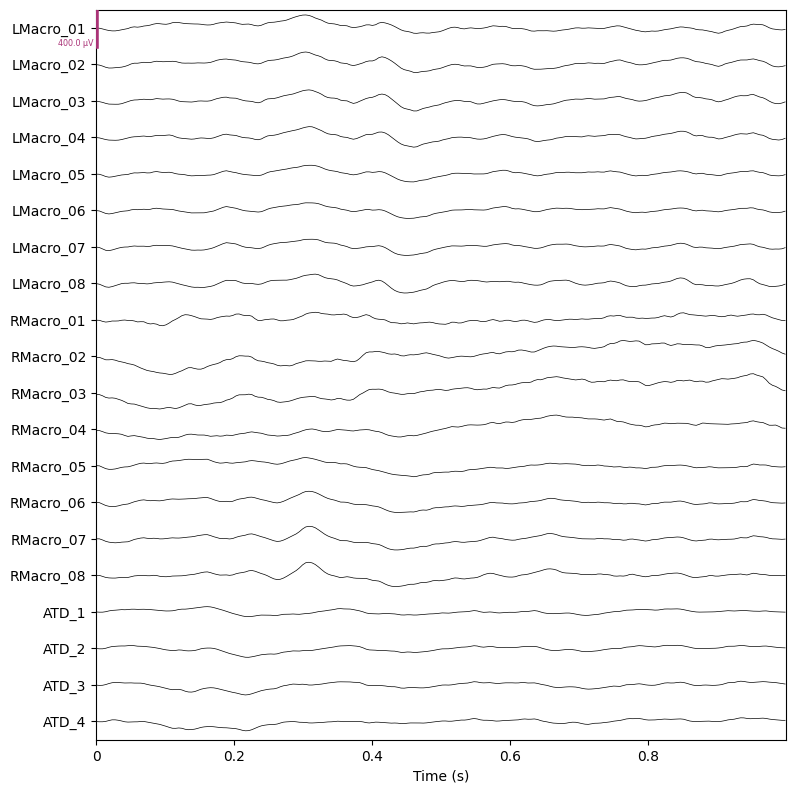


Ictal


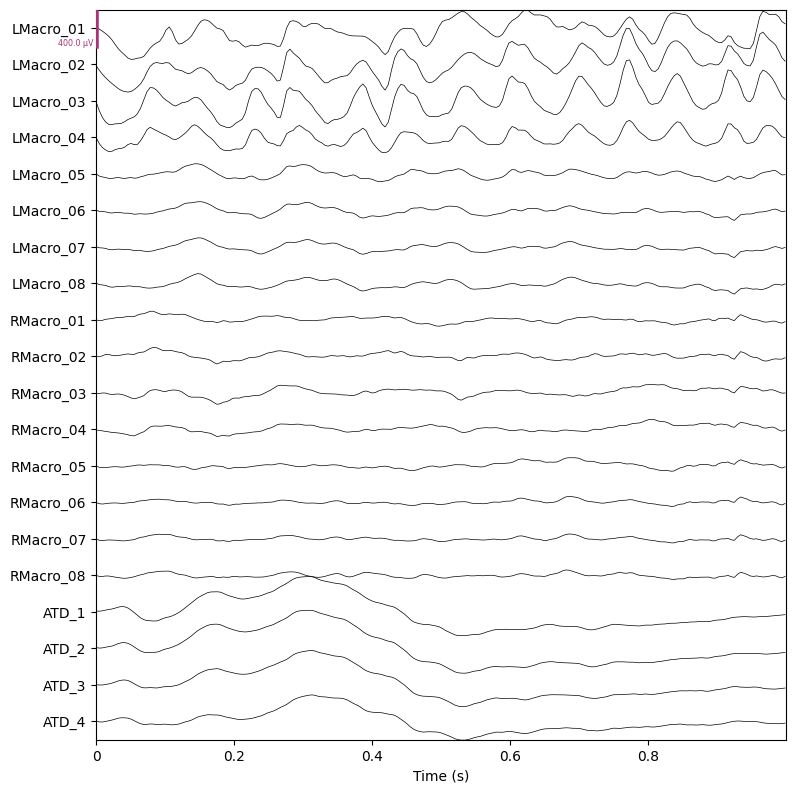

In [14]:

plotDataFrame(combined_baseline_df,combined_seizure_df,
              5000.0, 5000.0)

Interictal


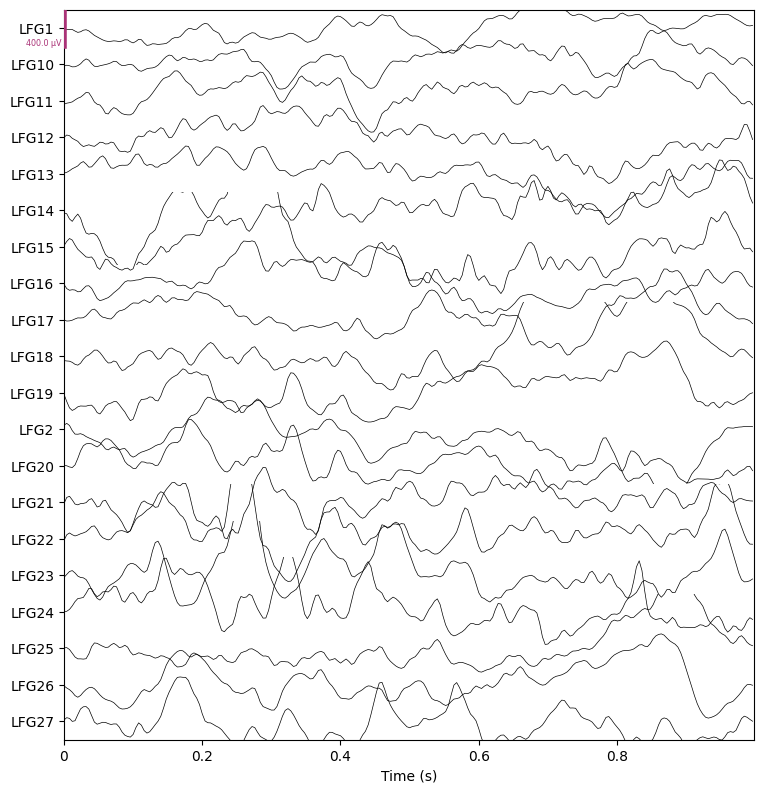


Ictal


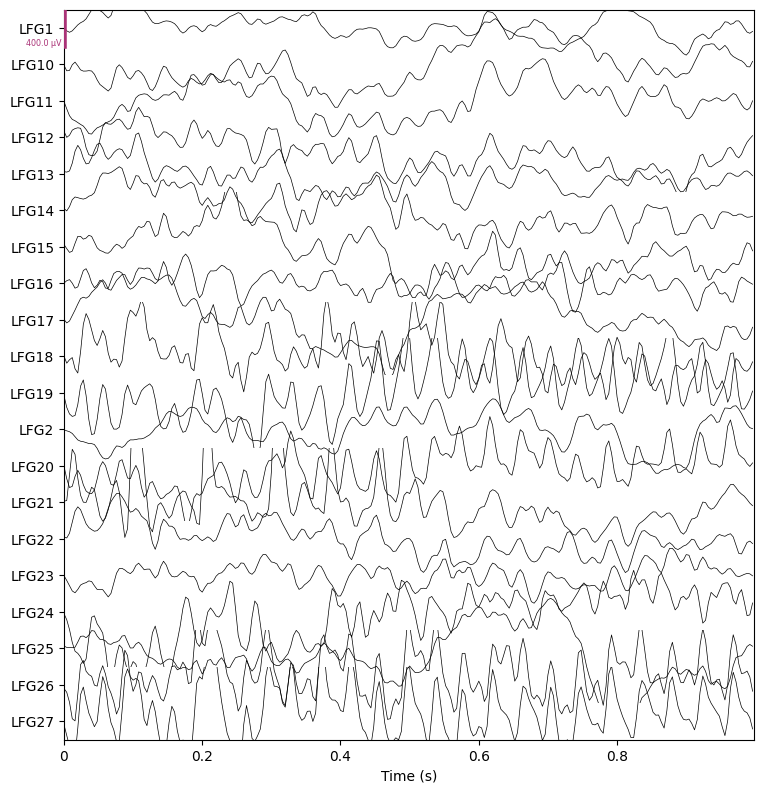

In [15]:

plotDataFrame(pd.read_csv('../dataset/Patient_1_upenn_baseline.csv'), pd.read_csv('../dataset/Patient_1_upenn_seizure.csv'),
              patient1_baseline_freq, patient1_seizure_freq)


Interictal


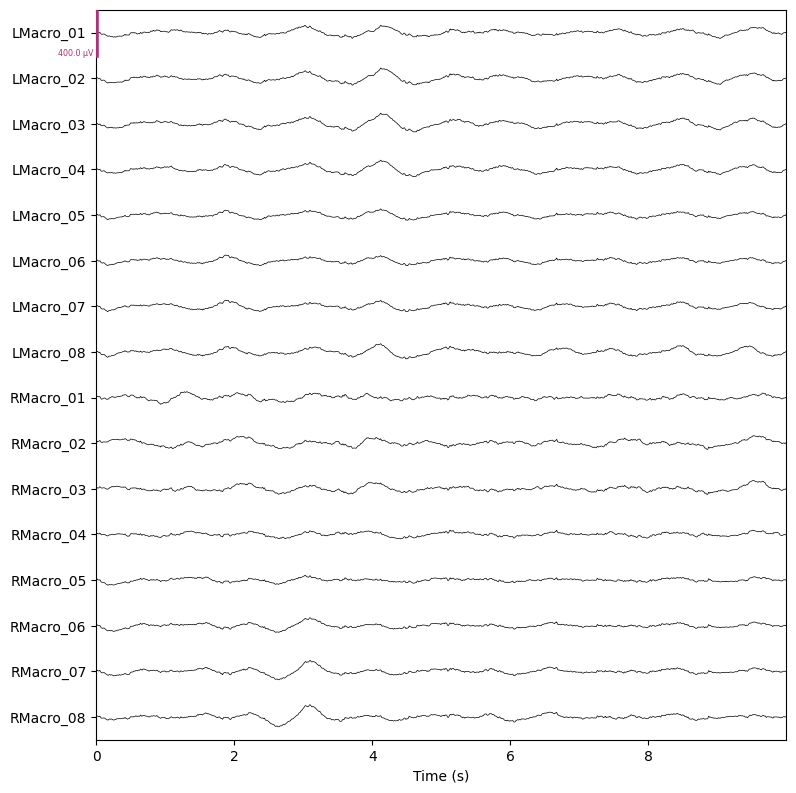


Ictal


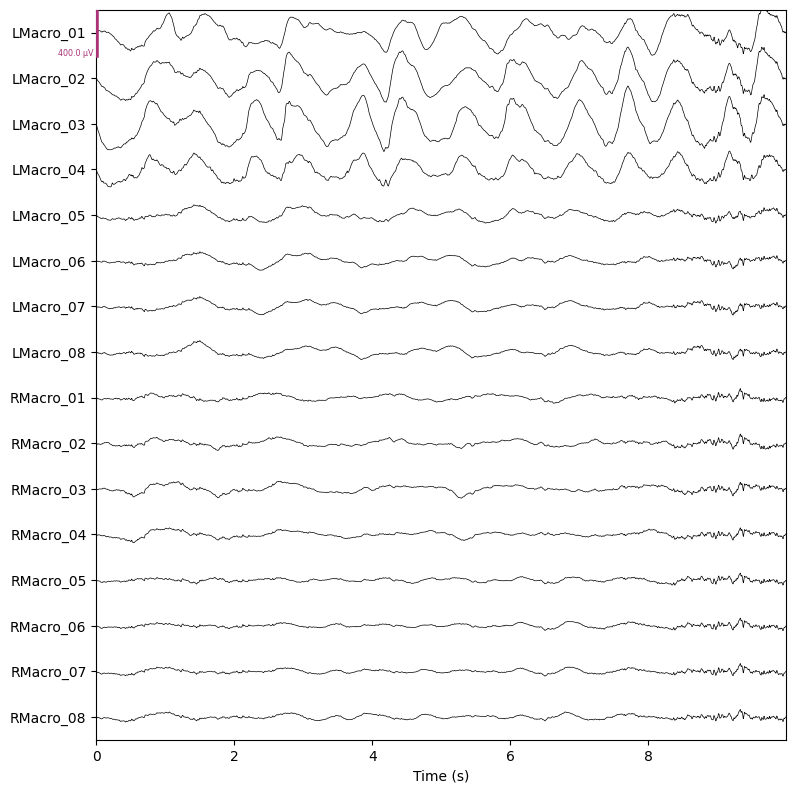

In [16]:

plotDataFrame(pd.read_csv('../dataset/Patient_2_upenn_baseline.csv'), pd.read_csv('../dataset/Patient_2_upenn_seizure.csv'),
              patient1_baseline_freq, patient1_seizure_freq)

Interictal


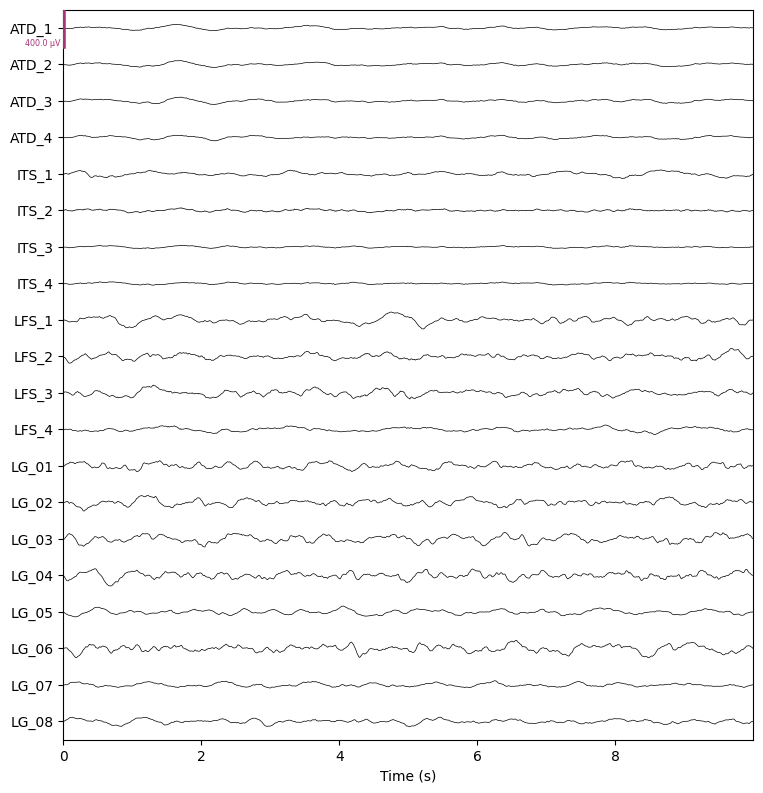


Ictal


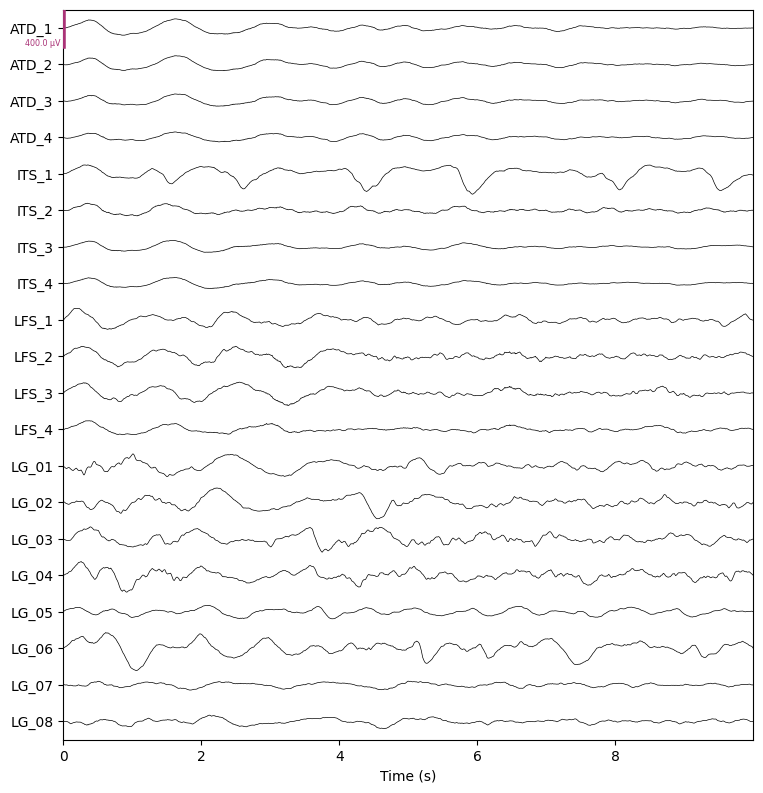

In [17]:

plotDataFrame(pd.read_csv('../dataset/Patient_3_upenn_baseline.csv'), pd.read_csv('../dataset/Patient_3_upenn_seizure.csv'),
              patient1_baseline_freq, patient1_seizure_freq)

Interictal


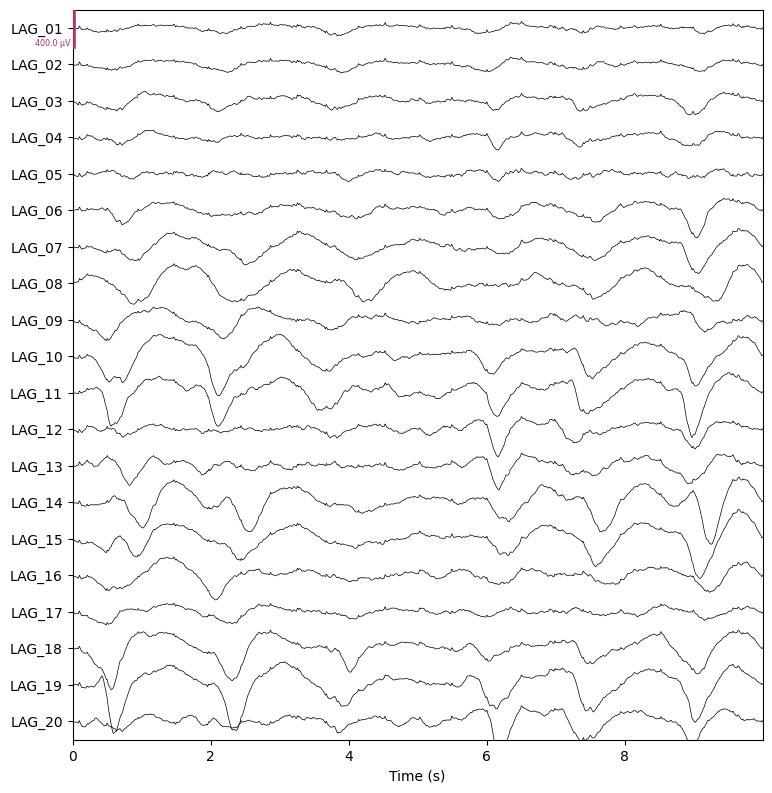


Ictal


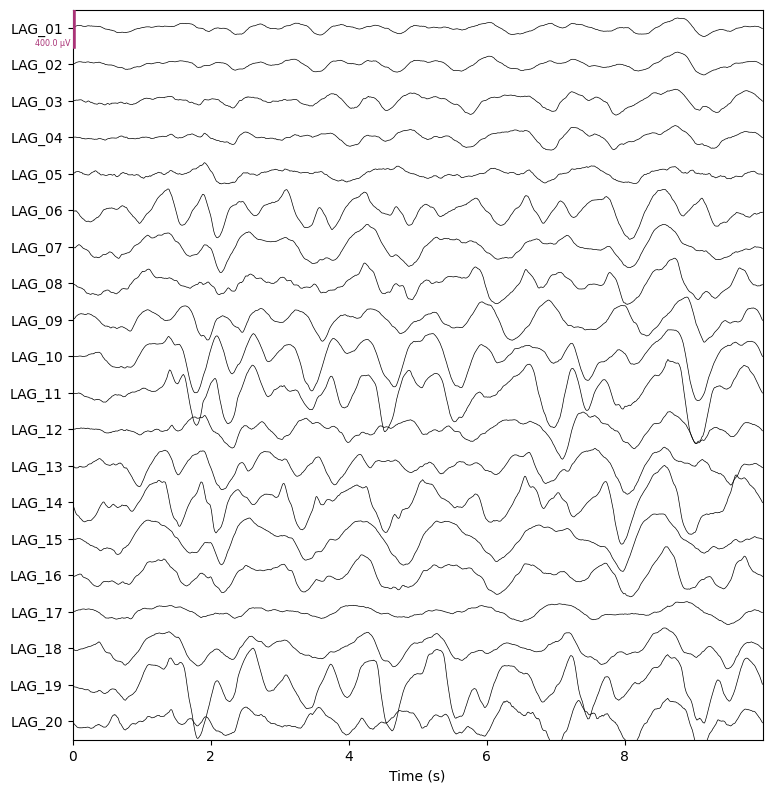

In [18]:

plotDataFrame(pd.read_csv('../dataset/Patient_4_upenn_baseline.csv'), pd.read_csv('../dataset/Patient_4_upenn_seizure.csv'),
              patient1_baseline_freq, patient1_seizure_freq)

### **Pre-Processing & Feature Engineering**

**Environment Set-up**

In [ ]:
!pip install matplotlib pandas numpy scipy seaborn mne
!pip install beautifulsoup4 requests wget
!pip install h5py tables kaggle
!pip install wfdb pyEDFlib PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 36.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=93419f6838a9350f6758d26b98a2ef76cd49cf6ff0b32964312e60b6e578c421
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 36.2 MB/s eta 0:00:00


Package install

In [ ]:
import glob            # for file locations
import pprint          # for pretty printing
import re

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)

    # sort alphabetically
    file_list.sort()

    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)

    return file_list

Filtering

FIR filter

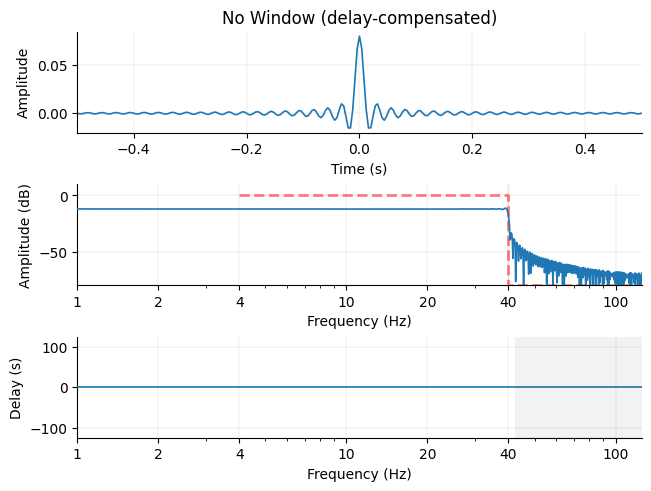

In [ ]:
import numpy as np
import pandas as pd
from mne.viz import plot_filter
import matplotlib.pyplot as plt

# Load your data
data_file_path = '/content/Patient1.csv'
df = pd.read_csv(data_file_path)

# Parameters for filter visualization
sfreq = 250  # Sampling frequency (this should be adapted based on your data)
f_p = 40.  # Pass-band frequency in Hz
nyq = sfreq / 2.  # Nyquist frequency
freq = [0, f_p, f_p, nyq]
gain = [1, 1, 0, 0]

# Filter configuration
n = int(round(1 * sfreq))  # Filter length
n -= n % 2 - 1  # Ensure it's an odd number
t = np.arange(-(n // 2), n // 2 + 1) / sfreq  # Create time array for sinc function
h = np.sinc(2 * f_p * t) / (4 * np.pi)  # Sinc filter

# Frequency limits for plot
flim = (1., sfreq / 2.)

# Plot the filter
fig = plot_filter(h, sfreq, freq, gain, 'No Window', flim=flim, compensate=True)

# Text box with filter details
textstr = '\n'.join((
    'Pass-band Frequency: '+str(f_p),
    'Filter Length: 1s'))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# Add text box to the plot
fig.text(0.7, 0.9, textstr, fontsize=14, bbox=props)

# Display the plot
plt.show()

# Save the figure
fig.savefig('ringing_40hz.png')

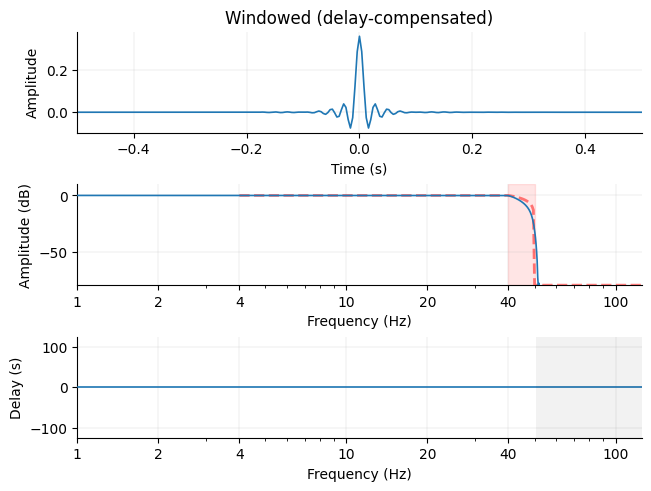

In [ ]:
from scipy import signal
trans_bandwidth = 10  # 10 Hz transition band
f_s = f_p + trans_bandwidth

freq = [0., f_p, f_s, nyq]
gain = [1., 1., 0., 0.]
h = signal.firwin2(n, freq, gain, nyq=nyq)
fig = plot_filter(h, sfreq, freq, gain, 'Windowed',
                  flim=flim, compensate=True)

textstr = '\n'.join((
    'Pass-band Frequency: '+str(f_p),
    'Filter Length: 1s',
    'Transition Bandwidth: '+str(trans_bandwidth)+' Hz'))

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in upper left in axes coords
fig.text(0.7, 0.88, textstr, fontsize=14, bbox=props)

plt.show()
fig.savefig('no_ringing_40hz.png')

### **Feature Engineering**

# **Fourier Transform**

In [ ]:

%%time
from scipy.signal import welch
import numpy as np

# Load your Patient1 dataset
data = pd.read_csv('/content/Patient1.csv')

# Check the data types and convert to numeric if needed
data = data.apply(pd.to_numeric, errors='coerce').dropna()

def bandpower(data, sf, band, output = False):
    band = np.asarray(band)
    low, high = band

    # Compute the periodogram (Welch)
    freqs, psd = welch(data,
                       sf,
                       nperseg=(2 / low)*sf,
                       scaling='density',
                       axis=0)

    # put into a df
    psd = pd.DataFrame(psd, index = freqs, columns = data.columns)

    if output:
        print(color.BOLD+'Welch Output'+color.END)
        psd.index.name = 'Hz'
        psd.columns = ['Power']
        display(psd)

    # Find closest indices of band in frequency vector
    idx_min = np.argmax(np.round(freqs) > low) - 1
    idx_max = np.argmax(np.round(freqs) > high)

    # select frequencies of interest
    psd = psd.iloc[idx_min:idx_max,:]

    # get the mean of each channel over all frequencies in the band
    psd = psd.mean()

    if output:
        print(color.BOLD+'\nMean Frequency Band'+color.END)
        display(psd)

    return psd

baseline_power = bandpower(upenn_baseline_df, sample_rate, [8,12], output=False)

CPU times: user 37.5 ms, sys: 890 µs, total: 38.4 ms
Wall time: 45.1 ms


In [ ]:
%%time
from scipy.signal import welch
import numpy as np

# Load the dataset
patient_data = pd.read_csv('Patient1.csv')

def bandpower(data, sf, band, output = False):
    band = np.asarray(band)
    low, high = band

    # Convert all columns to numeric, coercing errors to NaN
    data = data.apply(pd.to_numeric, errors='coerce')

    # Compute the periodogram (Welch)
    freqs, psd = welch(data.values,  # Pass data as numpy array
                       sf,
                       nperseg=(2 / low)*sf,
                       scaling='density',
                       axis=0)

    # put into a df
    psd = pd.DataFrame(psd, index = freqs, columns = data.columns)

    if output:
        print(color.BOLD+'Welch Output'+color.END)
        psd.index.name = 'Hz'
        psd.columns = ['Power']
        display(psd)

    # Find closest indices of band in frequency vector
    idx_min = np.argmax(np.round(freqs) > low) - 1
    idx_max = np.argmax(np.round(freqs) > high)

    # select frequencies of interest
    psd = psd.iloc[idx_min:idx_max,:]

    # get the mean of each channel over all frequencies in the band
    psd = psd.mean()

    if output:
        print(color.BOLD+'\nMean Frequency Band'+color.END)
        display(psd)

    return psd

baseline_power = bandpower(upenn_baseline_df, sample_rate, [8,12], output=False)

CPU times: user 110 ms, sys: 581 µs, total: 110 ms
Wall time: 129 ms


In [ ]:
import pandas as pd
from scipy.signal import welch
import numpy as np

# Load the Patient1 dataset
patient1_df = pd.read_csv('/content/Patient1.csv')

# Convert data to numeric and drop any rows with NaN values
patient1_df = patient1_df.apply(pd.to_numeric, errors='coerce').dropna()

sample_rate = 173.61  # in Hz

def bandpower(data, sf, band):
    band = np.asarray(band)
    low, high = band

    # Compute the periodogram (Welch)
    freqs, psd = welch(data,
                       sf,
                       nperseg=int(np.ceil((2 / low) * sf)),
                       scaling='density',
                       axis=0)

    # Select frequencies of interest
    idx_min = np.argmax(freqs >= low) - 1
    idx_max = np.argmax(freqs > high)

    # Select the PSD values in the specified band
    psd_band = psd[idx_min:idx_max, :]

    # Get the mean power for each channel in the specified band
    mean_power = psd_band.mean(axis=0)

    return mean_power

def power_measures(data):
    bandpasses = [[[0.1, 4], 'power_delta'],
                  [[4, 8], 'power_theta'],
                  [[8, 12], 'power_alpha'],
                  [[12, 30], 'power_beta'],
                  [[30, 70], 'power_gamma']]

    welch_df = pd.DataFrame()
    for bandpass, freq_name in bandpasses:
        bandpass_data = bandpower(data, sample_rate, bandpass)
        # Convert bandpass_data to a Series and then rename it
        bandpass_data = pd.Series(bandpass_data, index=data.columns).rename(freq_name)

        if welch_df.empty:
            welch_df = pd.DataFrame(bandpass_data).T  # Transpose to have features as rows
        else:
            welch_df = pd.concat([welch_df, pd.DataFrame(bandpass_data).T], axis=0) # Concatenate along rows

    return welch_df

# Assuming the first part of your data is baseline and the second part is seizure
# For example purposes, we'll split the DataFrame into baseline and seizure sections
baseline_data = patient1_df.iloc[:int(len(patient1_df)/2)]  # Adjust this slice as needed
seizure_data = patient1_df.iloc[int(len(patient1_df)/2):]  # Adjust this slice as needed

# Calculate mean power for baseline and seizure
baseline_power = power_measures(baseline_data)
seizure_power = power_measures(seizure_data)

# Display results
print(color.BOLD + color.UNDERLINE + 'Baseline Mean Power' + color.END)
print(baseline_power)
print()
print(color.BOLD + color.UNDERLINE + 'Seizure Mean Power' + color.END)
print(seizure_power)

combined_power.to_csv('combined_patient1_power_measures.csv')

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 3473 is greater than input length  = 250, using nperseg = 250
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 3473 is greater than input length  = 250, using nperseg = 250
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


ValueError: Length of values (340) does not match length of index (5)

In [ ]:
def power_measure_channels(data, sample_rate, output=False):
    welch_df = pd.DataFrame()

    for channel_name in data.columns:
        # Convert the channel data into a DataFrame with one column
        channel_df = power_measures(data[[channel_name]], sample_rate)  # Use double brackets to keep it a DataFrame
        channel_df['channel'] = channel_name
        channel_df.index.name = 'feature'
        channel_df = channel_df.set_index('channel', append=True)
        channel_df = channel_df.swaplevel()

        if welch_df.empty:
            welch_df = channel_df
        else:
            welch_df = pd.concat([welch_df, channel_df])

    welch_df = welch_df.T

    if output:
        display(welch_df.head())

    return welch_df

# Assuming 'upenn_seizure_df' is the DataFrame created from the Patient1 dataset and 'sample_rate' is defined
example_power_measure = power_measure_channels(upenn_seizure_df, sample_rate, output=True)

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 3472 is greater than input length  = 68, using nperseg = 68
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 86 is greater than input length  = 68, using nperseg = 68
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 3472 is greater than input length  = 68, using nperseg = 68
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 86 is greater than input length  = 68, using nperseg = 68
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: n

channel           0                                                 \
feature power_delta power_theta power_alpha power_beta power_gamma   
0        652.150975  803.385769  318.870163  1398.4884  1298.79518   
1               NaN         NaN         NaN        NaN         NaN   
2               NaN         NaN         NaN        NaN         NaN   
3               NaN         NaN         NaN        NaN         NaN   
4               NaN         NaN         NaN        NaN         NaN   

channel           1                                                    ...  \
feature power_delta power_theta power_alpha   power_beta  power_gamma  ...   
0               NaN         NaN         NaN          NaN          NaN  ...   
1        675.748024   748.73355  323.253824  1558.629415  1388.200596  ...   
2               NaN         NaN         NaN          NaN          NaN  ...   
3               NaN         NaN         NaN          NaN          NaN  ...   
4               NaN         NaN         NaN          NaN          NaN  ...   

channel    location                                                 \
feature power_delta power_theta power_alpha power_beta power_gamma   
0               NaN         NaN         NaN        NaN         NaN   
1               NaN         NaN         NaN        NaN         NaN   
2               NaN         NaN         NaN        NaN         NaN   
3               NaN         NaN         NaN        NaN         NaN   
4               NaN         NaN         NaN        NaN         NaN   

channel    class_id                                                 
feature power_delta power_theta power_alpha power_beta power_gamma  
0               NaN         NaN         NaN        NaN         NaN  
1               NaN         NaN         NaN        NaN         NaN  
2               NaN         NaN         NaN        NaN         NaN  
3               NaN         NaN         NaN        NaN         NaN  
4               NaN         NaN         NaN        NaN         NaN  

[5 rows x 2515 columns]

**Continuous Wavelet Transform**

In [ ]:
from pywt import families

families(short=False)

['Haar',
 'Daubechies',
 'Symlets',
 'Coiflets',
 'Biorthogonal',
 'Reverse biorthogonal',
 'Discrete Meyer (FIR Approximation)',
 'Gaussian',
 'Mexican hat wavelet',
 'Morlet wavelet',
 'Complex Gaussian wavelets',
 'Shannon wavelets',
 'Frequency B-Spline wavelets',
 'Complex Morlet wavelets']

In [ ]:
from pywt import Wavelet

wavelet = Wavelet('Haar')
print(wavelet)

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


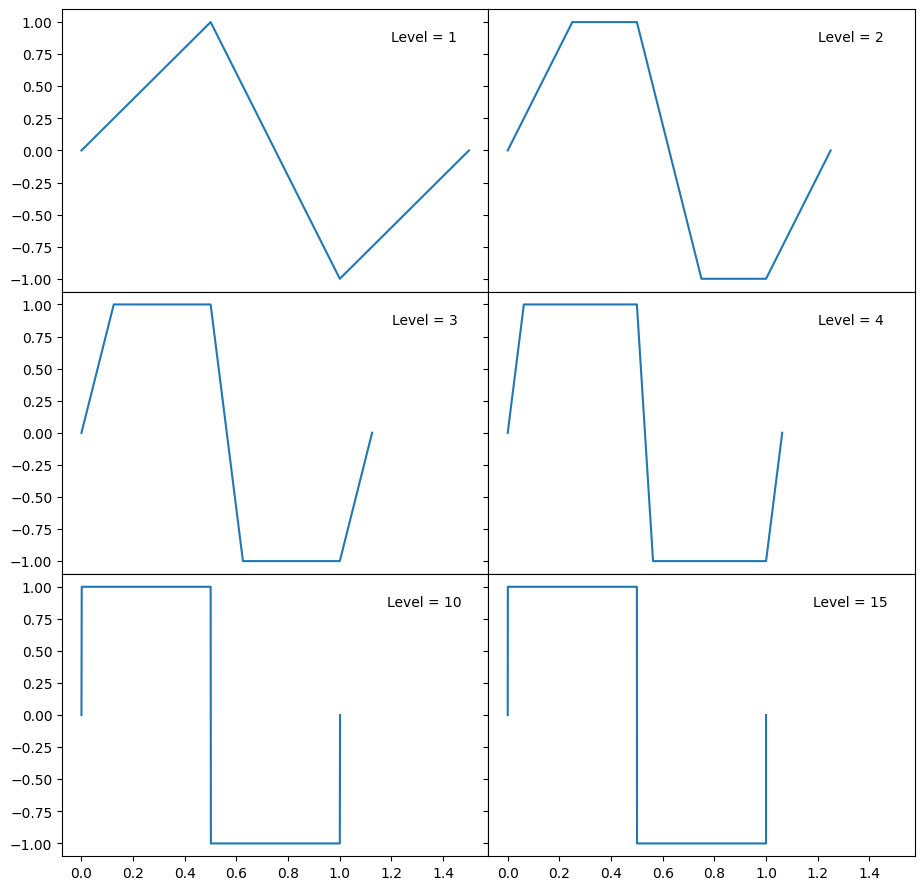

In [ ]:
import matplotlib.pyplot as plt

def plot_wavelet(wavelet):

    fig, axs = plt.subplots(3,2, figsize=(11,11), squeeze =True, sharex=True, sharey=True)
    axs = axs.flatten()
    for i, level in enumerate([1, 2, 3, 4, 10, 15]):
        try:
            [psi, x] = wavelet.wavefun(level=level)
        except:
            [phi, psi, x] = wavelet.wavefun(level=level)
        axs[i].plot(x, psi)
        axs[i].text(0.85, 0.9, "Level = "+str(level), ha='center', va='center', transform=axs[i].transAxes)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

plot_wavelet(wavelet)

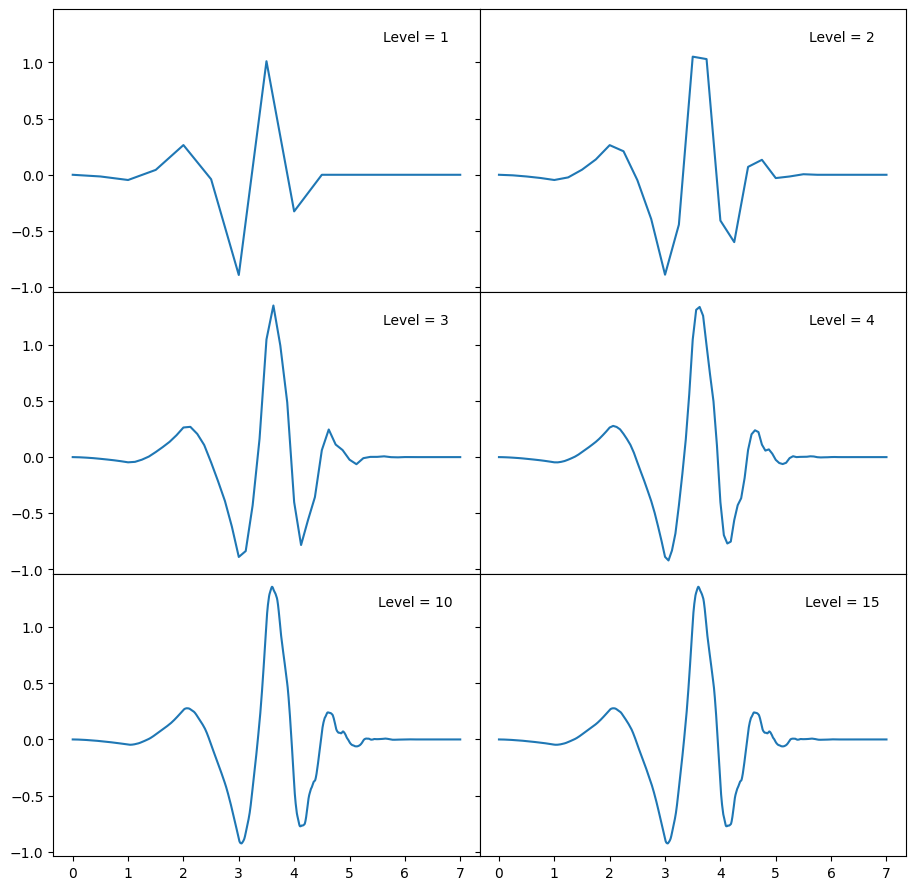

In [ ]:
plot_wavelet(Wavelet('db4'))

In [ ]:
import numpy as np
import pandas as pd
from pywt import wavedec

# Step 1: Inspect the DataFrame for non-numeric columns
print("Columns in the DataFrame:", baseline_df.columns)

# Step 2: Drop non-numeric columns (e.g., metadata or labels)
# This assumes that all non-numeric columns are irrelevant for wavelet transformation
numeric_df = baseline_df.select_dtypes(include=[np.number])

print("Shape after dropping non-numeric columns:", numeric_df.shape)

# Step 3: Transpose the data to get time-series format (time points should be columns)
data_t = numeric_df.transpose()

# Step 4: Perform wavelet decomposition on numeric data
level = 6  # Number of decomposition levels
coeffs_list = wavedec(data_t.values, wavelet='db4', level=level)

# Output the type of coeffs_list and the first array of coefficients
print(type(coeffs_list))

# Display the first array of coefficients
print("\nExample first array of wavelet coefficients:")
print(coeffs_list[0])

Columns in the DataFrame: Index(['LFG1', 'LFG10', 'LFG11', 'LFG12', 'LFG13', 'LFG14', 'LFG15', 'LFG16',
       'LFG17', 'LFG18', 'LFG19', 'LFG2', 'LFG20', 'LFG21', 'LFG22', 'LFG23',
       'LFG24', 'LFG25', 'LFG26', 'LFG27', 'LFG28', 'LFG29', 'LFG3', 'LFG30',
       'LFG31', 'LFG32', 'LFG33', 'LFG34', 'LFG35', 'LFG36', 'LFG37', 'LFG38',
       'LFG39', 'LFG4', 'LFG40', 'LFG41', 'LFG42', 'LFG43', 'LFG44', 'LFG45',
       'LFG46', 'LFG47', 'LFG48', 'LFG49', 'LFG5', 'LFG50', 'LFG51', 'LFG52',
       'LFG53', 'LFG54', 'LFG55', 'LFG56', 'LFG57', 'LFG58', 'LFG59', 'LFG6',
       'LFG60', 'LFG61', 'LFG62', 'LFG63', 'LFG64', 'LFG7', 'LFG8', 'LFG9',
       'LFS1', 'LFS2', 'LFS3', 'LFS4', 'Filter_Type'],
      dtype='object', name='channel')
Shape after dropping non-numeric columns: (250, 68)
<class 'list'>

Example first array of wavelet coefficients:
[[-1.95483092e+03 -1.94484888e+03 -1.95562267e+03 -1.93704836e+03
  -1.99387202e+03 -1.82442015e+03 -8.20506847e+02 -5.08089930e+01
  -5.04468478

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 6 is too high: all coefficients will experience boundary effects.
  warnings.warn(


In [ ]:
# make a list of the component names (later column rows)
nums = list(range(1,level+1))
names=[]
for num in nums:
    names.append('D' + str(num))
names.append('A' + str(nums[-1]))

# reverse the names so it counts down
names = names[::-1]

names

['A6', 'D6', 'D5', 'D4', 'D3', 'D2', 'D1']

In [ ]:
# make an empty dataframe
wavelets = pd.DataFrame()

# for each array in the list of arrays
for i, array in enumerate(coeffs_list):
    # turn into a dataframe and transpose
    level_df = pd.DataFrame(array).T
    # name the column the appropriate level name
    level_df.columns = [names[i]] * level_df.shape[1] #  create a list with the same name repeated for the number of columns
    # if the wavelets df is empty...
    if wavelets.empty:
        # ... make the first level df the wavelets df
        wavelets = level_df
    # ..otherwise...
    else:
        # ... add the next levels df to another column
        wavelets = pd.concat([wavelets,level_df], axis=1)

wavelets.head()

A6          A6          A6           A6          A6          A6  \
0 -1954.830920  -46.640515 -533.934968 -2433.704389 -512.279004 -156.488704   
1 -1944.848878  -56.077400 -533.601648 -2482.930948 -472.553142 -140.133777   
2 -1955.622667  -54.493059 -533.431842 -2476.536816 -491.576417 -127.451971   
3 -1937.048359  -22.201578 -505.876460 -2385.454109 -509.201409 -249.541690   
4 -1993.872019 -194.664534 -671.296591 -2852.100030 -418.533973  371.213325   

            A6          A6           A6          A6  ...         D1        D1  \
0  1915.722795 -492.867639 -2096.880781  110.413081  ...   8.946379  0.237003   
1  1932.582092 -496.955092 -2094.257813   96.409332  ...  18.928548  1.149522   
2  1931.213950 -477.781507 -2103.536456  100.023299  ... -18.409361 -3.437213   
3  1880.177004 -505.011242 -2045.116559  138.018321  ...   9.087417  3.522647   
4  2213.626446 -444.129563 -2416.860987  -83.161193  ...   3.319614  1.277540   

          D1         D1        D1         D1         D1         D1        D1  \
0   1.771968  -1.073629 -0.652218  -1.121850   2.238148   2.546133 -3.164340   
1   4.848288  -1.706016  0.154254  -5.778608  10.053427   5.819570 -1.342154   
2 -11.326469   5.266523  4.503024   9.652299  -5.664571  -9.293439  2.267972   
3   4.976997 -10.747149  3.803551  -4.825126  -6.522163   0.590022 -1.228422   
4   9.499863   4.654846 -4.450904  11.479063   9.261615  12.770747 -3.044495   

         D1  
0  3.313397  
1  7.183497  
2 -2.231407  
3 -4.597340  
4  7.445534  

[5 rows x 476 columns]

In [ ]:
# remove the AN levels
regex = re.compile('D')
bad_items = [x for x in list(wavelets.columns) if not regex.match(x)]
decom_wavelets = wavelets.drop(bad_items, axis=1)

decom_wavelets.head()

D6          D6          D6          D6          D6           D6  \
0    2.460292    0.978827   -3.072099    0.741118   -9.072023     0.016069   
1    8.014606   -3.572062  -15.407675  -12.994033  -14.330106    11.453093   
2  -11.770768 -113.665705  -61.964391 -339.185471  255.021323   247.593837   
3  142.771269  198.148577  353.677677  473.678462  517.570561 -1265.942717   
4   48.223288 -197.704969 -164.178549 -202.154082  348.261639    97.850255   

            D6         D6           D6          D6  ...         D1        D1  \
0    -9.797843   0.238389     1.718352    0.673773  ...   8.946379  0.237003   
1   -22.661576   0.302193     4.784484   -3.261894  ...  18.928548  1.149522   
2   168.788195  41.358617   -33.751392 -110.399399  ... -18.409361 -3.437213   
3  -294.626655 -58.124493   938.440396  357.876920  ...   9.087417  3.522647   
4  1823.898579  17.662614 -1100.546080 -207.980140  ...   3.319614  1.277540   

          D1         D1        D1         D1         D1         D1        D1  \
0   1.771968  -1.073629 -0.652218  -1.121850   2.238148   2.546133 -3.164340   
1   4.848288  -1.706016  0.154254  -5.778608  10.053427   5.819570 -1.342154   
2 -11.326469   5.266523  4.503024   9.652299  -5.664571  -9.293439  2.267972   
3   4.976997 -10.747149  3.803551  -4.825126  -6.522163   0.590022 -1.228422   
4   9.499863   4.654846 -4.450904  11.479063   9.261615  12.770747 -3.044495   

         D1  
0  3.313397  
1  7.183497  
2 -2.231407  
3 -4.597340  
4  7.445534  

[5 rows x 408 columns]

In [ ]:
from pywt import wavedec

def wavelet_decompose_channels(data, level, output=False):
  # take every x number of points using numpy's slicing (start:stop:step)
  data = data[0::2]

  data.columns.name='channel'

  # Select only numeric columns before transpose
  data = data.select_dtypes(include=[np.number]) # This line is added

  # transpose the data
  data_t = data.transpose()

  # get the wavelet coefficients at each level in a list
  coeffs_list = wavedec(data_t.values, wavelet='db4', level=level)

  # make a list of the component names (later column rows)
  nums = list(range(1,level+1))
  names=[]
  for num in nums:
    names.append('D' + str(num))
  names.append('A' + str(nums[-1]))

  # reverse the names so it counts down
  names = names[::-1]

  i = 0
  wavelets = pd.DataFrame()
  for i, array in enumerate(coeffs_list):
    # turn into a dataframe and transpose
    level_df = pd.DataFrame(array)
    level_df.index = data.columns
    level_df['level'] = names[i]
    level_df= level_df.set_index('level', append=True)
    level_df=level_df.T
    # add the next levels df to another column
    wavelets = pd.concat([wavelets,level_df], axis=1, sort=True)

  # sort values along the channels
  wavelets = wavelets.sort_values(['channel', 'level'], axis=1)

  # remove the AN levels
  regex = re.compile('D')
  bad_items = [x for x in list(wavelets.columns.levels[1]) if not regex.match(x)]
  decom_wavelets = wavelets.drop(bad_items, axis=1, level = 'level')

  decom_wavelets.index.name='sample'

  if output:
    display(decom_wavelets.head())

  return decom_wavelets

example_wavelets = wavelet_decompose_channels(seizure_df, level=5, output=True)

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


channel      LFG1                                                     LFG10  \
level          D1         D2          D3          D4          D5         D1   
sample                                                                        
0       -0.733129  -3.471072   63.234797   -3.694623   -4.705035   0.551121   
1       -3.332691  -3.599207  196.641597  -23.982283  -21.779966  10.419872   
2       -4.712985  10.544165 -118.928487 -139.409672 -140.380025  16.346298   
3       -5.256960 -46.739109  -83.710504  -22.089900   72.265135   1.564290   
4       -2.688564  34.102725  -29.928597 -223.043724  290.135355 -13.058522   

channel                                                ...       LFS3  \
level           D2         D3          D4          D5  ...         D1   
sample                                                 ...              
0         4.748464 -13.378183    1.494045    1.308317  ...  -5.466488   
1        12.113857 -43.344167    6.228743    6.619316  ...  -6.764282   
2       -27.591987   7.068251   33.282954   25.464033  ...  -1.323993   
3       -21.425311 -16.708981    1.559606  145.484840  ...  26.399663   
4       -14.073657  84.075764 -124.039395 -220.493278  ... -28.570493   

channel                                                      LFS4             \
level           D2          D3          D4          D5         D1         D2   
sample                                                                         
0         9.774207  -70.416482    5.914660    7.958971  -2.970797  -9.412080   
1        19.025026 -225.493900   24.456344   23.632383 -11.750218 -29.660046   
2       -82.729668   30.969538  -10.629993  -46.672076  -5.595816  14.282575   
3        98.867437  186.353860  -72.404684  -28.012103  17.259648   2.901950   
4       -24.483288  -76.820951 -139.045515  771.588830 -12.316970 -30.865770   

channel                                      
level            D3          D4          D5  
sample                                       
0         -3.125695    0.834308   -0.678178  
1         -7.909525    6.983078    6.325292  
2         26.099342  131.398366  148.257587  
3       -222.749043   79.053921  117.406708  
4        123.193122  153.273210  152.630253  

[5 rows x 340 columns]

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'Patient1up.csv'
df = pd.read_csv(file_path)

# Select only the desired columns: 'class', 'location', and 'class_id'
columns_to_keep = ['class', 'location', 'class_id']
df_selected = df[columns_to_keep]

# Save the resulting DataFrame to a new CSV file or overwrite the original file if needed
output_file = 'Patient1up_selected_columns.csv'  # You can overwrite 'Patient1up.csv' if you want
df_selected.to_csv(output_file, index=False)

# Display the first few rows to confirm
print(df_selected.head())

     class                         location class_id
0  seizure  intracranial epileptogenic zone     LFG1
1  seizure  intracranial epileptogenic zone    LFG10
2  seizure  intracranial epileptogenic zone    LFG11
3  seizure  intracranial epileptogenic zone    LFG12
4  seizure  intracranial epileptogenic zone    LFG13


## Log Sum

In [ ]:
import pandas as pd
from pywt import wavedec
import numpy as np

# Function to subtract the smallest value
def minus_small(x):
    '''Takes a pandas series and subtracts the smallest number (other than 0).'''
    no_zeros = x[x != 0]  # Remove zeros
    result = no_zeros - no_zeros.min()  # Subtract the minimum value
    return result

# Function to reformat the DataFrame
def reformat(data, feature_name):
    data.index = [feature_name + level for level in data.index]
    data.index.name = 'feature'
    data = pd.DataFrame(data.unstack()).T
    return data

# Function to calculate log of sum per channel
def log_sum_channels(data, output=False):
    # Calculate the absolute sum for each channel
    absolute_sums = data.sum()

    # Unstack the DataFrame to make channels the columns
    absolute_sums = absolute_sums.unstack('channel')

    # Apply minus_small to each channel
    absolute_sums_minus = absolute_sums.apply(minus_small)

    # Apply log transformation to each channel
    absolute_sums_log = absolute_sums_minus.apply(np.log)

    # Reformat the DataFrame
    absolute_sums_log = reformat(absolute_sums_log, 'LSWT_')

    if output:
        display(absolute_sums_log.head())  # Optionally display the result

    return absolute_sums_log

# Load the existing Patient1.csv file
patient1_df = pd.read_csv('/content/Patient1.csv')

# Assuming 'example_wavelets' is already defined from previous code
# Apply the log_sum_channels function to wavelet data
example_absolute_sums_log = log_sum_channels(example_wavelets, output=True)

# Ensure the indices align correctly before concatenating the DataFrames
example_absolute_sums_log.reset_index(drop=True, inplace=True)
patient1_df.reset_index(drop=True, inplace=True)

# Concatenate the log-sum result to the original DataFrame
updated_df = pd.concat([patient1_df, example_absolute_sums_log], axis=1)

# Save the updated DataFrame back to the Patient1.csv file
updated_df.to_csv('/content/Patient1.csv', index=False)

print("Patient1.csv has been updated successfully!")

channel      LFG1                                           LFG10          \
feature   LSWT_D1   LSWT_D2   LSWT_D3 LSWT_D4   LSWT_D5   LSWT_D1 LSWT_D2   
0        6.518268  6.613801  6.717371    -inf  6.808016  3.646746    -inf   

channel                              ...      LFS3                    \
feature  LSWT_D3   LSWT_D4  LSWT_D5  ...   LSWT_D1 LSWT_D2   LSWT_D3   
0        4.79623 -0.276068  5.38581  ...  4.013439    -inf  4.472558   

channel                          LFS4                                       
feature   LSWT_D4   LSWT_D5   LSWT_D1   LSWT_D2 LSWT_D3  LSWT_D4   LSWT_D5  
0        5.862914  6.368566  5.257954  5.392463    -inf  6.03841  6.505085  

[1 rows x 340 columns]

Patient1.csv has been updated successfully!


Average power of the wavelet coefficients in each sub-band

In [ ]:
from pywt import wavedec

def ave(data, output=False):
    # get the mean
    mean_data = data.mean()

    # Convert the MultiIndex to a simple Index before adding '_mean'
    mean_data.index = [str(level) + '_mean' for level in mean_data.index]

    if output:
        display(mean_data)

    return mean_data

# Assuming 'example_wavelets' is already defined from previous code,
# and you intend to use that as a substitute for baseline_wavelets
baseline_wavelets = example_wavelets

print(color.BOLD+color.UNDERLINE+'Baseline Mean Wavelets'+color.END)
baseline_mean = ave(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Mean Wavelets'+color.END)

# Call wavelet_decompose_channels to create seizure_wavelets
seizure_wavelets = wavelet_decompose_channels(seizure_df, level=5)

seizure_mean = ave(seizure_wavelets, output=True)

Baseline Mean Wavelets


('LFG1', 'D1')_mean    -1.519073
('LFG1', 'D2')_mean    -0.898680
('LFG1', 'D3')_mean     2.332298
('LFG1', 'D4')_mean   -55.547356
('LFG1', 'D5')_mean    12.741006
                         ...    
('LFS4', 'D1')_mean    -0.783545
('LFS4', 'D2')_mean    -0.668277
('LFS4', 'D3')_mean   -11.609616
('LFS4', 'D4')_mean    12.530278
('LFS4', 'D5')_mean    42.473059
Length: 340, dtype: float64


Seizure Mean Wavelets


/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


('LFG1', 'D1')_mean    -1.519073
('LFG1', 'D2')_mean    -0.898680
('LFG1', 'D3')_mean     2.332298
('LFG1', 'D4')_mean   -55.547356
('LFG1', 'D5')_mean    12.741006
                         ...    
('LFS4', 'D1')_mean    -0.783545
('LFS4', 'D2')_mean    -0.668277
('LFS4', 'D3')_mean   -11.609616
('LFS4', 'D4')_mean    12.530278
('LFS4', 'D5')_mean    42.473059
Length: 340, dtype: float64

In [ ]:
import pandas as pd

# Assuming minus_small and reformat functions are already defined

# Function to calculate mean across channels
def ave_channels(data, output=False):
    # Get the mean for each channel
    mean_data = data.mean()

    # Reshape data to have channels as columns
    mean_data = mean_data.unstack('channel')

    # Reformat the DataFrame for saving
    mean_data = reformat(mean_data, 'Mean_')

    # Display the result if output is True
    if output:
        display(mean_data.head())

    return mean_data

# Assuming example_wavelets is already defined and contains your wavelet data

# Call ave_channels to compute the mean wavelets across channels
example_wavelet_mean = ave_channels(example_wavelets, output=True)

# Load the existing Patient1.csv file
patient1_df = pd.read_csv('/content/Patient1.csv')

# Ensure indices are aligned before concatenation
example_wavelet_mean.reset_index(drop=True, inplace=True)
patient1_df.reset_index(drop=True, inplace=True)

# Concatenate the calculated mean data to the original DataFrame
updated_patient1_df = pd.concat([patient1_df, example_wavelet_mean], axis=1)

# Save the updated DataFrame to the same CSV file
updated_patient1_df.to_csv('/content/Patient1.csv', index=False)

print("The mean wavelet data has been successfully updated and saved in Patient1.csv!")

channel      LFG1                                              LFG10  \
feature   Mean_D1  Mean_D2   Mean_D3    Mean_D4    Mean_D5   Mean_D1   
0       -1.519073 -0.89868  2.332298 -55.547356  12.741006 -0.761159   

channel                                          ...      LFS3            \
feature   Mean_D2   Mean_D3   Mean_D4   Mean_D5  ...   Mean_D1   Mean_D2   
0       -2.460727  1.546048 -6.273386  12.97006  ... -1.058253 -3.477264   

channel                                      LFS4                       \
feature   Mean_D3    Mean_D4    Mean_D5   Mean_D1   Mean_D2    Mean_D3   
0       -1.790527  16.183301  45.803911 -0.783545 -0.668277 -11.609616   

channel                        
feature    Mean_D4    Mean_D5  
0        12.530278  42.473059  

[1 rows x 340 columns]

The mean wavelet data has been successfully updated and saved in Patient1.csv!


Mean of the absolute values of the coefficients in each sub-band

In [ ]:
from pywt import wavedec

def mean_abs(data, output=False):
    # get the mean of the absolute values
    mean_abs_data = data.abs().mean()

    # Convert the MultiIndex to a simple Index before adding '_mean_abs'
    mean_abs_data.index = [str(level) + '_mean_abs' for level in mean_abs_data.index]

    if output:
        display(mean_abs_data)

    return mean_abs_data

# Assuming 'example_wavelets' is already defined from previous code,
# and you intend to use that as a substitute for baseline_wavelets
baseline_wavelets = example_wavelets

print(color.BOLD+color.UNDERLINE+'Baseline Mean Absolute Wavelets'+color.END)
baseline_mean_abs = mean_abs(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Mean Absolute Wavelets'+color.END)
seizure_mean_abs = mean_abs(seizure_wavelets, output=True)

# Call wavelet_decompose_channels to create seizure_wavelets
seizure_wavelets = wavelet_decompose_channels(seizure_df, level=5) # Assuming seiz_df is defined somewhere

seizure_mean = ave(seizure_wavelets, output=True)

Baseline Mean Absolute Wavelets


('LFG1', 'D1')_mean_abs     12.643501
('LFG1', 'D2')_mean_abs     33.840222
('LFG1', 'D3')_mean_abs     69.071800
('LFG1', 'D4')_mean_abs    121.099062
('LFG1', 'D5')_mean_abs     76.383963
                              ...    
('LFS4', 'D1')_mean_abs     14.559539
('LFS4', 'D2')_mean_abs     30.008624
('LFS4', 'D3')_mean_abs     72.034761
('LFS4', 'D4')_mean_abs    110.883447
('LFS4', 'D5')_mean_abs    181.264143
Length: 340, dtype: float64


Seizure Mean Absolute Wavelets


('LFG1', 'D1')_mean_abs     12.643501
('LFG1', 'D2')_mean_abs     33.840222
('LFG1', 'D3')_mean_abs     69.071800
('LFG1', 'D4')_mean_abs    121.099062
('LFG1', 'D5')_mean_abs     76.383963
                              ...    
('LFS4', 'D1')_mean_abs     14.559539
('LFS4', 'D2')_mean_abs     30.008624
('LFS4', 'D3')_mean_abs     72.034761
('LFS4', 'D4')_mean_abs    110.883447
('LFS4', 'D5')_mean_abs    181.264143
Length: 340, dtype: float64

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


('LFG1', 'D1')_mean    -1.519073
('LFG1', 'D2')_mean    -0.898680
('LFG1', 'D3')_mean     2.332298
('LFG1', 'D4')_mean   -55.547356
('LFG1', 'D5')_mean    12.741006
                         ...    
('LFS4', 'D1')_mean    -0.783545
('LFS4', 'D2')_mean    -0.668277
('LFS4', 'D3')_mean   -11.609616
('LFS4', 'D4')_mean    12.530278
('LFS4', 'D5')_mean    42.473059
Length: 340, dtype: float64

In [ ]:
import pandas as pd

# Function to calculate mean of the absolute values across channels
def mean_abs_channels(data, output=False):
    # Get the mean of absolute values for each channel
    mean_abs_data = data.abs().mean()

    # Reshape data to have channels as columns
    mean_abs_data = mean_abs_data.unstack('channel')

    # Reformat the DataFrame for saving
    mean_abs_data = reformat(mean_abs_data, 'Mean_Abs_')

    # Display the result if output is True
    if output:
        display(mean_abs_data.head())

    return mean_abs_data

# Assuming example_wavelets is already defined and contains your wavelet data

# Call mean_abs_channels to compute the mean absolute wavelets across channels
example_mean_abs = mean_abs_channels(example_wavelets, output=True)

# Load the existing Patient1.csv file
patient1_df = pd.read_csv('/content/Patient1.csv')

# Ensure indices are aligned before concatenation
example_mean_abs.reset_index(drop=True, inplace=True)
patient1_df.reset_index(drop=True, inplace=True)

# Concatenate the calculated mean absolute wavelet data to the original DataFrame
updated_patient1_df = pd.concat([patient1_df, example_mean_abs], axis=1)

# Save the updated DataFrame to the same CSV file
updated_patient1_df.to_csv('/content/Patient1.csv', index=False)

print("The mean absolute wavelet data has been successfully updated and saved in Patient1.csv!")

channel        LFG1                                                  \
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5   
0         12.643501   33.840222     69.0718  121.099062   76.383963   

channel       LFG10                                                  ...  \
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5  ...   
0          9.645207   32.299184   85.819189   71.601255  142.317372  ...   

channel        LFS3                                                  \
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5   
0          15.68958   44.039449  120.577736  150.155508  256.187401   

channel        LFS4                                                  
feature Mean_Abs_D1 Mean_Abs_D2 Mean_Abs_D3 Mean_Abs_D4 Mean_Abs_D5  
0         14.559539   30.008624   72.034761  110.883447  181.264143  

[1 rows x 340 columns]

The mean absolute wavelet data has been successfully updated and saved in Patient1.csv!


Standard deviation of the coefficients in each sub-band

In [ ]:
from pywt import wavedec

def mean_abs(data, output=False):
    # get the mean of the absolute values
    mean_abs_data = data.abs().mean()

    # Convert the MultiIndex to a simple Index before adding '_mean_abs'
    mean_abs_data.index = [str(level) + '_std' for level in mean_abs_data.index]

    if output:
        display(mean_abs_data)

    return mean_abs_data

# Assuming 'example_wavelets' is already defined from previous code,
# and you intend to use that as a substitute for baseline_wavelets
baseline_wavelets = example_wavelets

print(color.BOLD+color.UNDERLINE+'Baseline Mean Absolute Wavelets'+color.END)
baseline_mean_abs = mean_abs(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Mean Absolute Wavelets'+color.END)
seizure_mean_abs = mean_abs(seizure_wavelets, output=True)

# Call wavelet_decompose_channels to create seizure_wavelets
seizure_wavelets = wavelet_decompose_channels(seizure_df, level=5) # Assuming seiz_df is defined somewhere

seizure_mean = ave(seizure_wavelets, output=True)

Baseline Mean Absolute Wavelets


('LFG1', 'D1')_std     12.643501
('LFG1', 'D2')_std     33.840222
('LFG1', 'D3')_std     69.071800
('LFG1', 'D4')_std    121.099062
('LFG1', 'D5')_std     76.383963
                         ...    
('LFS4', 'D1')_std     14.559539
('LFS4', 'D2')_std     30.008624
('LFS4', 'D3')_std     72.034761
('LFS4', 'D4')_std    110.883447
('LFS4', 'D5')_std    181.264143
Length: 340, dtype: float64


Seizure Mean Absolute Wavelets


('LFG1', 'D1')_std     12.643501
('LFG1', 'D2')_std     33.840222
('LFG1', 'D3')_std     69.071800
('LFG1', 'D4')_std    121.099062
('LFG1', 'D5')_std     76.383963
                         ...    
('LFS4', 'D1')_std     14.559539
('LFS4', 'D2')_std     30.008624
('LFS4', 'D3')_std     72.034761
('LFS4', 'D4')_std    110.883447
('LFS4', 'D5')_std    181.264143
Length: 340, dtype: float64

/usr/local/lib/python3.10/dist-packages/pywt/_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


('LFG1', 'D1')_mean    -1.519073
('LFG1', 'D2')_mean    -0.898680
('LFG1', 'D3')_mean     2.332298
('LFG1', 'D4')_mean   -55.547356
('LFG1', 'D5')_mean    12.741006
                         ...    
('LFS4', 'D1')_mean    -0.783545
('LFS4', 'D2')_mean    -0.668277
('LFS4', 'D3')_mean   -11.609616
('LFS4', 'D4')_mean    12.530278
('LFS4', 'D5')_mean    42.473059
Length: 340, dtype: float64

In [ ]:
import pandas as pd

# Function to calculate the standard deviation of wavelet coefficients across channels
def coeff_std_channels(data, output=False):
    # Get the standard deviation for each channel
    std_data = data.std()

    # Reshape data to have channels as columns
    std_data = std_data.unstack('channel')

    # Reformat the DataFrame for saving
    std_data = reformat(std_data, 'STD_')

    # Display the result if output is True
    if output:
        display(std_data.head())

    return std_data

# Assuming example_wavelets is already defined and contains your wavelet data

# Call coeff_std_channels to compute the standard deviation of wavelets across channels
example_std = coeff_std_channels(example_wavelets, output=True)

# Load the existing Patient1.csv file
patient1_df = pd.read_csv('/content/Patient1.csv')

# Ensure indices are aligned before concatenation
example_std.reset_index(drop=True, inplace=True)
patient1_df.reset_index(drop=True, inplace=True)

# Concatenate the calculated standard deviation data to the original DataFrame
updated_patient1_df = pd.concat([patient1_df, example_std], axis=1)

# Save the updated DataFrame to the same CSV file
updated_patient1_df.to_csv('/content/Patient1.csv', index=False)

print("The standard deviation of wavelet coefficients has been successfully updated and saved in Patient1.csv!")

channel       LFG1                                                    LFG10  \
feature     STD_D1     STD_D2     STD_D3      STD_D4      STD_D5     STD_D1   
0        16.157033  44.438378  87.204934  134.668955  121.433288  13.053335   

channel                                               ...       LFS3  \
feature    STD_D2      STD_D3     STD_D4      STD_D5  ...     STD_D1   
0        41.94498  111.938791  92.108877  221.860862  ...  19.927757   

channel                                                      LFS4             \
feature     STD_D2      STD_D3      STD_D4      STD_D5     STD_D1     STD_D2   
0        56.246087  149.757835  204.244708  375.908076  18.074243  38.208188   

channel                                     
feature     STD_D3      STD_D4      STD_D5  
0        97.852151  138.211446  248.213875  

[1 rows x 340 columns]

The standard deviation of wavelet coefficients has been successfully updated and saved in Patient1.csv!


Ratio of the absolute mean values of adjacent sub-bands

In [ ]:
def ratio(data, output=False):
    # get the mean of the absolute values
    data = data.abs().mean()
    # get a list of the index
    decimation_levels = list(data.index)

    ratio_data=pd.Series(index=data.index)
    for level_no in range(0, len(decimation_levels)):
        # for the first decimation
        if level_no == 0:
            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/data.loc[decimation_levels[level_no+1]]

        #for the last decimation
        elif level_no == len(decimation_levels)-1:
            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/data.loc[decimation_levels[level_no-1]]
        else:
            before = data.loc[decimation_levels[level_no-1]]
            after = data.loc[decimation_levels[level_no+1]]
            mean_data = (before+after)/2

            ratio_data.loc[decimation_levels[level_no]] = \
            data.loc[decimation_levels[level_no]]/mean_data

    ratio_data.index = [str(level) + '_Ratio' for level in ratio_data.index]

    if output:
        display(ratio_data)

    return ratio_data


print(color.BOLD+color.UNDERLINE+'Baseline Ratio Wavelets'+color.END)
baseline_ratio = ratio(baseline_wavelets, output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Ratio Wavelets'+color.END)
seizure_ratio = ratio(seizure_wavelets, output=True)


Baseline Ratio Wavelets


('LFG1', 'D1')_Ratio    0.373623
('LFG1', 'D2')_Ratio    0.828247
('LFG1', 'D3')_Ratio    0.891598
('LFG1', 'D4')_Ratio    1.665098
('LFG1', 'D5')_Ratio    1.168448
                          ...   
('LFS4', 'D1')_Ratio    0.101745
('LFS4', 'D2')_Ratio    0.693085
('LFS4', 'D3')_Ratio    1.022552
('LFS4', 'D4')_Ratio    0.875515
('LFS4', 'D5')_Ratio    1.634727
Length: 340, dtype: float64


Seizure Ratio Wavelets


('LFG1', 'D1')_Ratio    0.373623
('LFG1', 'D2')_Ratio    0.828247
('LFG1', 'D3')_Ratio    0.891598
('LFG1', 'D4')_Ratio    1.665098
('LFG1', 'D5')_Ratio    1.168448
                          ...   
('LFS4', 'D1')_Ratio    0.101745
('LFS4', 'D2')_Ratio    0.693085
('LFS4', 'D3')_Ratio    1.022552
('LFS4', 'D4')_Ratio    0.875515
('LFS4', 'D5')_Ratio    1.634727
Length: 340, dtype: float64

In [ ]:
import pandas as pd

def ratio_channels(epoch_data):
    # Get decimation levels (wavelet decomposition levels)
    decimation_levels = list(epoch_data.index)

    # Initialize an empty Series to store the ratio data
    ratio_data = pd.Series()

    # Iterate through each decimation level
    for level_no in range(0, len(decimation_levels)):
        # For the first decimation level, take the ratio with the next level
        if level_no == 0:
            ratio_data[decimation_levels[level_no]] = \
                epoch_data.loc[decimation_levels[level_no]] / epoch_data.loc[decimation_levels[level_no + 1]]
        # For the last decimation level, take the ratio with the previous level
        elif level_no == len(decimation_levels) - 1:
            ratio_data[decimation_levels[level_no]] = \
                epoch_data.loc[decimation_levels[level_no]] / epoch_data.loc[decimation_levels[level_no - 1]]
        # For all intermediate decimation levels, take the ratio with the average of previous and next levels
        else:
            before = epoch_data.loc[decimation_levels[level_no - 1]]
            after = epoch_data.loc[decimation_levels[level_no + 1]]
            mean_data = (before + after) / 2

            ratio_data[decimation_levels[level_no]] = \
                epoch_data.loc[decimation_levels[level_no]] / mean_data

    # Name the index column as 'features'
    ratio_data.index.name = 'features'

    return ratio_data

# Assuming `example_wavelets` contains the wavelet coefficient data

# Calculate the ratio of adjacent wavelet decimation levels for each channel
example_ratio_data = example_wavelets.mean().unstack('channel').apply(ratio_channels)

# Reformat the result to add 'Ratio_Mean_' prefix for easy identification of features
example_ratio_data = reformat(example_ratio_data, 'Ratio_Mean_')

# Display the head of the ratio data to check the result
display(example_ratio_data.head())

# Load the existing Patient1.csv file
patient1_df = pd.read_csv('/content/Patient1.csv')

# Ensure indices are aligned before concatenation
example_ratio_data.reset_index(drop=True, inplace=True)
patient1_df.reset_index(drop=True, inplace=True)

# Concatenate the calculated ratio data to the original DataFrame
updated_patient1_df = pd.concat([patient1_df, example_ratio_data], axis=1)

# Save the updated DataFrame to the same CSV file
updated_patient1_df.to_csv('/content/Patient1.csv', index=False)

print("The ratio of wavelet coefficients has been successfully updated and saved in Patient1.csv!")

channel          LFG1                                                          \
feature Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4 Ratio_Mean_D5   
0            1.690337     -2.210164     -0.082638     -7.370296     -0.229372   

channel         LFG10                                                          \
feature Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4 Ratio_Mean_D5   
0            0.309323     -6.270259     -0.354025     -0.864334     -2.067474   

channel  ...          LFS3                                            \
feature  ... Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4   
0        ...      0.304335      2.441231     -0.281839      0.735381   

channel                        LFS4                                            \
feature Ratio_Mean_D5 Ratio_Mean_D1 Ratio_Mean_D2 Ratio_Mean_D3 Ratio_Mean_D4   
0            2.830319      1.172485      0.107846     -1.957447      0.811982   

channel                
feature Ratio_Mean_D5  
0            3.389634  

[1 rows x 340 columns]

The ratio of wavelet coefficients has been successfully updated and saved in Patient1.csv!


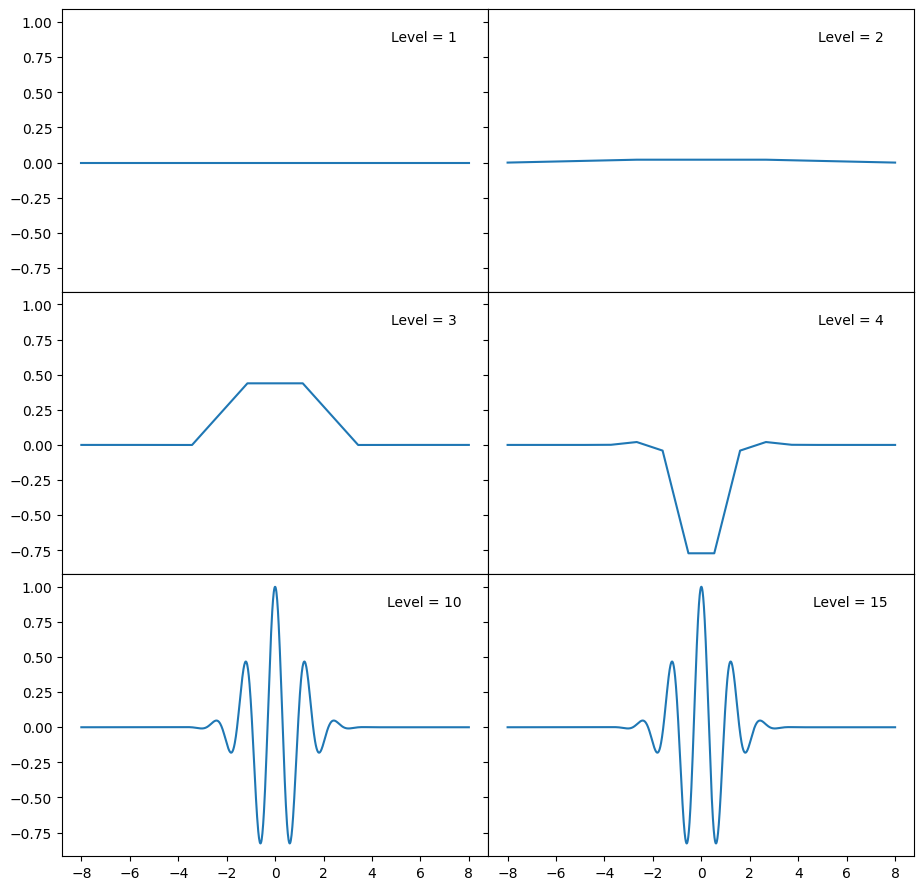

In [ ]:
from pywt import ContinuousWavelet

plot_wavelet(ContinuousWavelet('morl'))

In [ ]:
from pywt import scale2frequency, cwt

def cwt_wavelet_decompose(data, freq, waveletname, output=False):

    scales = np.arange(0.25, (freq/20)+0.25, 0.1)
    frequencies = scale2frequency(waveletname, scales) / (freq*0.0001)  # 100 Hz sampling is 0.01

    # transpose the data
    data_t = data.transpose()

    # get the wavelet coefficients at each level in a list
    coeffs_list = cwt(data_t.values, scales, waveletname)

    decom_wavelets = pd.DataFrame(coeffs_list[0][:,0,:], index =np.round(frequencies, 2)).T

    if output:
        display(decom_wavelets.head())

    return decom_wavelets

print(color.BOLD+color.UNDERLINE+'Baseline Wavelets'+color.END)
baseline_wavelets = cwt_wavelet_decompose(baseline_df, sample_rate, 'morl', output=True)
print()
print(color.BOLD+color.UNDERLINE+'Seizure Wavelets'+color.END)
seizure_wavelets = cwt_wavelet_decompose(seizure_df, sample_rate, 'morl',  output=True)

Baseline Wavelets


ValueError: could not convert string to float: 'Low-pass'

ConversionError: Failed to convert value(s) to axis units: array(['Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass',
       'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass', 'Low-pass'],
      dtype=object)

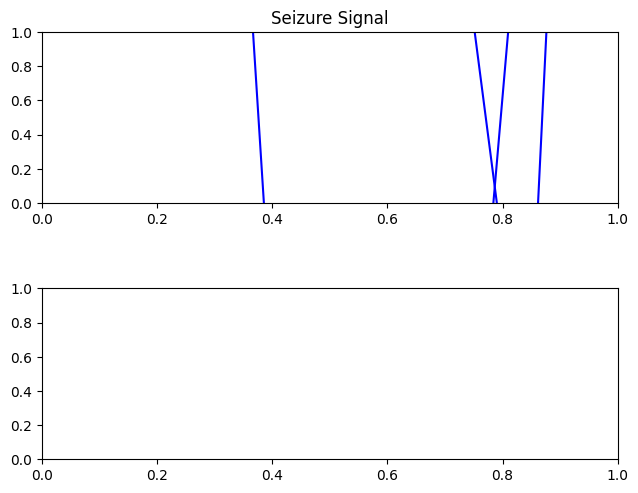

In [ ]:
!pip install seaborn
import seaborn as sns

def plot_cwt_scalogram(signal, wt_data, interpolation, class_name):

  cmap = plt.cm.cool
  x = range(len(signal))

  # Show signal and wavelet packet coefficients
  fig, (sig_ax, spec_ax) = plt.subplots(2)
  fig.subplots_adjust(hspace=0.5, bottom=.03, left=.07, right=.97, top=.92)

  # plot the signal
  sig_ax.set_title(class_name + " Signal")
  sig_ax.plot(x, signal, 'b')
  sig_ax.set_xlim(0, x[-1])

  # plot the spectrogram
  cbar_ax = fig.add_axes([1, 0.05, 0.05, 0.3])
  spec_ax.set_title("Wavelets")
  #The seaborn module was not imported causing the error.
  sns.heatmap(wt_data.T.abs(), ax=spec_ax, cmap="YlGnBu", cbar_ax=cbar_ax,
              cbar_kws={"ticks":[]}
              )

  plt.show()

plot_cwt_scalogram(seizure_df,
               seizure_wavelets,
               None, 'Seizure')

plot_cwt_scalogram(baseline_df,
               baseline_wavelets,
               None, 'Baseline')

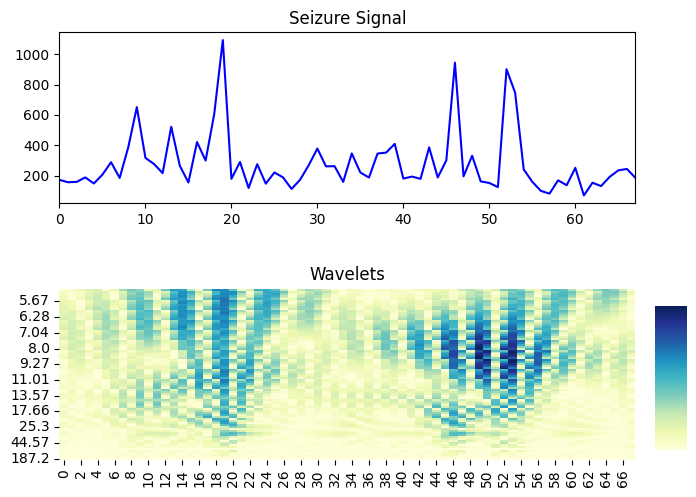

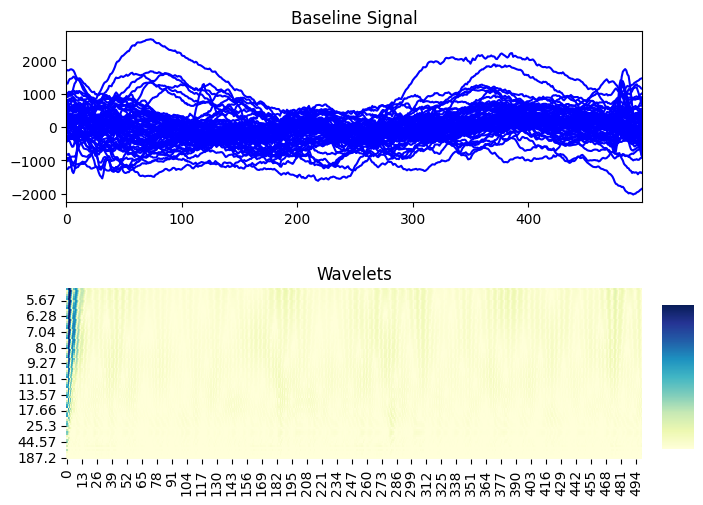

In [ ]:
def plot_cwt_scalogram(signal, wt_data, interpolation, class_name):

  cmap = plt.cm.cool
  x = range(len(signal))

  # Show signal and wavelet packet coefficients
  fig, (sig_ax, spec_ax) = plt.subplots(2)
  fig.subplots_adjust(hspace=0.5, bottom=.03, left=.07, right=.97, top=.92)

  # plot the signal
  sig_ax.set_title(class_name + " Signal")
  sig_ax.plot(x, signal, 'b')
  sig_ax.set_xlim(0, x[-1])

  # plot the spectrogram
  cbar_ax = fig.add_axes([1, 0.05, 0.05, 0.3])
  spec_ax.set_title("Wavelets")
  sns.heatmap(wt_data.T.abs(), ax=spec_ax, cmap="YlGnBu", cbar_ax=cbar_ax,
              cbar_kws={"ticks":[]}
              )

  spec_ax.invert_yaxis()
  plt.show()

plot_cwt_scalogram(seizure_df,
               seizure_wavelets,
               None, 'Seizure')

plot_cwt_scalogram(baseline_df,
               baseline_wavelets,
               None, 'Baseline')

In [ ]:
!git clone https://github.com/raphaelvallat/entropy.git entropy/

Cloning into 'entropy'...
remote: Enumerating objects: 1487, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 1487 (delta 0), reused 0 (delta 0), pack-reused 1477 (from 1)
Receiving objects: 100% (1487/1487), 3.38 MiB | 21.22 MiB/s, done.
Resolving deltas: 100% (953/953), done.


In [ ]:
from entropy.entropy import sample_entropy
baseline_sam = np.apply_along_axis(sample_entropy, 0, baseline_df)
seizure_sam = np.apply_along_axis(sample_entropy, 0, seizure_df)

print(color.BOLD+color.UNDERLINE+"Baseline"+color.END)
display(baseline_sam)
print(color.BOLD+color.UNDERLINE+"Seizure"+color.END)
display(seizure_sam)

ValueError: could not convert string to float: 'Low-pass'

In [ ]:
from entropy.entropy import spectral_entropy

baseline_spec = np.apply_along_axis(spectral_entropy, 0, baseline_df, sample_rate,
                                method='welch', nperseg = sample_rate)

seizure_spec = np.apply_along_axis(spectral_entropy, 0, seizure_df, sample_rate,
                                method='welch', nperseg = sample_rate)

print(color.BOLD+color.UNDERLINE+"Baseline"+color.END)
display(baseline_spec)
print(color.BOLD+color.UNDERLINE+"Seizure"+color.END)
display(seizure_spec)

Baseline


/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:600: UserWarning: nperseg = 173 is greater than input length  = 68, using nperseg = 68
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


array([1.24044082, 1.30676666, 1.26768032, 1.62291208, 1.84799221,
       2.99593539, 1.79473506, 1.80350953, 1.68655397, 1.71183288,
       1.30801784, 1.53391934, 1.43537223, 3.31925853, 2.18000068,
       1.66761459, 2.16274026, 1.37336417, 1.78377876, 1.46983398,
       2.33591515, 2.18139822, 1.50474275, 2.04134876, 2.0636739 ,
       1.62607838, 1.64638778, 1.76533533, 2.28302266, 1.70541239,
       2.04915427, 1.89244972, 2.53218109, 2.19944   , 3.18233247,
       1.98307226, 1.79188832, 1.55574924, 1.93398261, 1.99756254,
       2.10534198, 2.06453892, 2.43100331, 1.56821744, 2.20952237,
       1.46822532, 3.56281007, 2.26395428, 1.98105281, 2.0517657 ,
       2.76082833, 2.62380618, 1.82145078, 1.6856068 , 2.62176946,
       2.10441433, 1.94633383, 1.78301936, 2.18293651, 1.99616693,
       1.14221034, 2.19964308, 2.731997  , 1.6132498 , 2.25472479,
       1.93178354, 1.96661397, 1.67973267])

Seizure


array([4.59450813])

In [ ]:
def fft(time_data):
  return np.log10(np.absolute(np.fft.rfft(time_data, axis=1)[:,1:48]))

example_fft = pd.DataFrame(fft(seiz_df.T),
                           index = seiz_df.columns
                          )
example_fft.columns.name = 'freq'
example_fft.head()

freq            0         1         2         3         4
channel                                                  
0       -0.499657  0.091342 -0.763958 -0.141555  0.031799
1        0.148458  0.032292  0.082157  0.051698 -1.021584
2       -0.047180 -0.064152 -0.550463  0.298241 -0.606500
3        0.118169 -0.080295 -0.218697 -0.565506 -0.040828
4       -0.354642 -0.088774 -0.024767  0.127869 -1.636355

In [ ]:
from sklearn import preprocessing
example_scaled = pd.DataFrame(preprocessing.scale(example_fft, axis=0),
                              index = example_fft.index,
                              columns = example_fft.columns)
example_scaled.head()

freq            0         1         2         3         4
channel                                                  
0       -0.921605  0.957716 -2.212352 -0.148907  0.839670
1        1.169841  0.716950  0.942654  0.625886 -1.009604
2        0.538525  0.323712 -1.416269  1.614331 -0.280900
3        1.072100  0.257891 -0.179176 -1.848623  0.712169
4       -0.453647  0.223321  0.543954  0.931272 -2.088868

In [ ]:
example_corr_matrix = pd.DataFrame(np.corrcoef(example_scaled),
                                   index = example_scaled.index,
                                   columns = example_scaled.index)

example_corr_matrix.head()

channel        0         1         2         3         4         5         6   \
channel                                                                         
0        1.000000 -0.590921  0.460169  0.088892 -0.433726 -0.556353 -0.409048   
1       -0.590921  1.000000  0.114227 -0.155951  0.791209  0.601716  0.900195   
2        0.460169  0.114227  1.000000 -0.448365  0.241783  0.357942  0.478802   
3        0.088892 -0.155951 -0.448365  1.000000 -0.691156 -0.808212 -0.491633   
4       -0.433726  0.791209  0.241783 -0.691156  1.000000  0.835321  0.881385   

channel        7         8         9   ...        40        41        42  \
channel                                ...                                 
0        0.665233  0.573519 -0.088674  ...  0.237765  0.161206  0.389460   
1       -0.755081 -0.445413 -0.476682  ... -0.409597  0.184735 -0.006614   
2       -0.111112 -0.078435  0.128030  ...  0.556162  0.028947  0.791998   
3        0.699759  0.858905 -0.600044  ... -0.063882  0.839738  0.114162   
4       -0.943190 -0.819251 -0.065617  ... -0.435093 -0.403094 -0.230625   

channel        43        44        45        46        47        48        49  
channel                                                                        
0       -0.901197 -0.336588 -0.117252  0.643821  0.898415 -0.504578  0.289127  
1        0.639794  0.765745  0.157420 -0.321142 -0.533566  0.856810 -0.202401  
2       -0.626792 -0.287218 -0.008598  0.868304  0.388551  0.323383  0.073121  
3       -0.035012  0.248774 -0.813778 -0.158376 -0.254549 -0.642942 -0.706539  
4        0.526458  0.500593  0.701284 -0.260716 -0.139841  0.974053  0.400194  

[5 rows x 50 columns]

In [ ]:
import numpy as np
import pandas as pd

# Assuming example_corr_matrix is defined and is a valid correlation matrix
# example_corr_matrix = pd.DataFrame(...) # Your correlation matrix here

# Calculate the eigenvalues
eigenvalues = np.linalg.eig(example_corr_matrix)[0]

# Convert eigenvalues to absolute values
eigenvalues = np.absolute(eigenvalues)

# Create a DataFrame for eigenvalues with appropriate indexing
# Convert index to string before concatenation
example_eigenvalues = pd.DataFrame(eigenvalues, index=example_corr_matrix.index.astype(str) + '|freq_eigen')

# Sort the DataFrame by eigenvalues
example_eigenvalues = example_eigenvalues.sort_values(by=0)

# Display the first few rows of the sorted eigenvalues
print(example_eigenvalues.head())

                          0
channel                    
46|freq_eigen  8.375989e-17
45|freq_eigen  8.375989e-17
47|freq_eigen  1.214020e-16
48|freq_eigen  1.214020e-16
42|freq_eigen  1.466554e-16


In [ ]:
import numpy as np
import pandas as pd

# Assuming example_corr_matrix is defined
# example_corr_matrix = pd.DataFrame(...) # Your correlation matrix here

# Create an upper triangular matrix with NaN below the diagonal
example_corr_nan = example_corr_matrix.where(np.triu(np.ones(example_corr_matrix.shape), k=1).astype(bool))

# Display the resulting DataFrame
print(example_corr_nan.head())

channel  0         1         2         3         4         5         6   \
channel                                                                   
0       NaN -0.590921  0.460169  0.088892 -0.433726 -0.556353 -0.409048   
1       NaN       NaN  0.114227 -0.155951  0.791209  0.601716  0.900195   
2       NaN       NaN       NaN -0.448365  0.241783  0.357942  0.478802   
3       NaN       NaN       NaN       NaN -0.691156 -0.808212 -0.491633   
4       NaN       NaN       NaN       NaN       NaN  0.835321  0.881385   

channel        7         8         9   ...        40        41        42  \
channel                                ...                                 
0        0.665233  0.573519 -0.088674  ...  0.237765  0.161206  0.389460   
1       -0.755081 -0.445413 -0.476682  ... -0.409597  0.184735 -0.006614   
2       -0.111112 -0.078435  0.128030  ...  0.556162  0.028947  0.791998   
3        0.699759  0.858905 -0.600044  ... -0.063882  0.839738  0.114162   
4       -0.943190 

In [ ]:
example_corr_stacked = example_corr_nan.stack()
# combine the multi_index to 1 index name
example_corr_stacked.index = ['_'.join(map(str,i)) for i in example_corr_stacked.index.tolist()]
# add the corr to the name
example_corr_stacked.index = example_corr_stacked.index+'|freq_corr'
example_corr_stacked.head()

0_1|freq_corr   -0.590921
0_2|freq_corr    0.460169
0_3|freq_corr    0.088892
0_4|freq_corr   -0.433726
0_5|freq_corr   -0.556353
dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

mms = MinMaxScaler()
wav_mms = mms.fit_transform(seizure_wavelets)

sc = StandardScaler()
wav_scale = sc.fit_transform(seizure_wavelets)

print(color.BOLD+color.UNDERLINE+'Before Scaling'+color.END)
display(seizure_wavelets.head())
print(color.BOLD+color.UNDERLINE+'After MinMaxScaler'+color.END)
display(pd.DataFrame(wav_mms).head())
print(color.BOLD+color.UNDERLINE+'After StandardScaler'+color.END)
display(pd.DataFrame(wav_scale).head())

Before Scaling


187.20    133.72    104.00    85.09      72.00     62.40      55.06   \
0 -0.000162 -0.816401 -0.500283 -7.127967  27.240647  0.085112 -17.931662   
1  0.001894  0.042121  0.071845  0.364443   0.210370  0.963917  -1.592200   
2 -0.000484 -1.144240  2.484938  2.118296   0.977207 -0.051810  -3.818302   
3  0.000340  1.282663 -3.210895 -3.972894   3.530757  0.158079   1.526381   
4 -0.000897 -1.869876  4.601052  5.329537  -4.486560 -0.265389  -8.006242   

      49.26      44.57      40.70   ...      5.89        5.81        5.74    \
0   6.847319  34.656236  27.704129  ...  110.129885  100.416089  101.666782   
1   5.480691  -3.727104 -25.256504  ...   77.632230   77.937336   71.517580   
2  -3.181241  -1.542213   7.322884  ...  -14.997364   -6.438641    7.071184   
3   5.015657   5.902018   1.021468  ... -118.668687 -101.833062  -80.953120   
4 -13.310148 -16.234575 -14.017491  ... -185.563043 -166.117104 -167.427800   

       5.67        5.60        5.54        5.47        5.41        5.35    \
0   90.517151   69.564387   71.746685   67.744853   51.145271   52.219225   
1   75.444100   13.656818   18.184955   12.478819   21.070103   17.254867   
2   15.667600  -70.611643  -61.473439  -47.677534  -48.741342  -37.181853   
3  -76.586193 -133.905370 -123.940335 -120.116573 -108.689747  -95.696067   
4 -156.052195 -167.983797 -167.344039 -159.196212 -152.625597 -137.044470   

       5.29    
0   17.074125  
1  -37.250730  
2  -88.015147  
3 -123.425556  
4 -122.201637  

[5 rows x 87 columns]

After MinMaxScaler


0         1         2         3         4         5         6   \
0  0.394092  0.474079  0.530141  0.542625  0.635333  0.382574  0.479708   
1  0.462183  0.488381  0.534274  0.596375  0.529464  0.455056  0.554029   
2  0.383449  0.468617  0.551709  0.608956  0.532468  0.371281  0.543904   
3  0.410712  0.509048  0.510557  0.565259  0.542469  0.388592  0.568214   
4  0.369769  0.456528  0.566997  0.631993  0.511068  0.353665  0.524855   

         7         8         9   ...        77        78        79        80  \
0  0.444369  0.579509  0.634657  ...  0.609274  0.577142  0.601291  0.572758   
1  0.439789  0.473617  0.480156  ...  0.572938  0.552023  0.568895  0.556267   
2  0.410762  0.479645  0.575199  ...  0.469369  0.457737  0.499644  0.490866   
3  0.438231  0.500182  0.556816  ...  0.353453  0.351138  0.405058  0.389932   
4  0.376818  0.439112  0.512943  ...  0.278658  0.279303  0.312137  0.302989   

         81        82        83        84        85        86  
0  0.536270  0.557170  0.568690  0.538648  0.553246  0.491863  
1  0.472829  0.497567  0.506091  0.504308  0.512624  0.429157  
2  0.377205  0.408923  0.437953  0.424597  0.449378  0.370560  
3  0.305382  0.339410  0.355903  0.356147  0.381395  0.329686  
4  0.266711  0.291110  0.311638  0.305981  0.333356  0.331099  

[5 rows x 87 columns]

After StandardScaler


0         1         2         3         4         5         6   \
0 -0.050327 -0.101003 -0.015043 -0.311915  0.743277  0.020912 -0.476140   
1  0.362297 -0.003632  0.013508  0.029280 -0.006029  0.450751 -0.045380   
2 -0.114828 -0.138185  0.133928  0.109148  0.015229 -0.046058 -0.104067   
3  0.050385  0.137066 -0.150310 -0.168237  0.086016  0.056602  0.036836   
4 -0.197727 -0.220484  0.239528  0.255384 -0.136232 -0.150524 -0.214474   

         7         8         9   ...        77        78        79        80  \
0  0.140195  0.597863  0.461449  ...  0.495606  0.452025  0.459602  0.405877   
1  0.108724 -0.079650 -0.423873  ...  0.342443  0.345327  0.315444  0.333465   
2 -0.090744 -0.041084  0.120744  ... -0.094125 -0.055172  0.007292  0.046298   
3  0.098015  0.090316  0.015406  ... -0.582733 -0.507972 -0.413597 -0.396892   
4 -0.323994 -0.300423 -0.235995  ... -0.898010 -0.813104 -0.827077 -0.778649   

         81        82        83        84        85        86  
0  0.316128  0.324519  0.307663  0.225166  0.231611  0.058373  
1  0.043788  0.062777  0.034056  0.075621  0.056870 -0.213727  
2 -0.366703 -0.326492 -0.263761 -0.271508 -0.215189 -0.467994  
3 -0.675022 -0.631751 -0.622387 -0.569595 -0.507626 -0.645356  
4 -0.841027 -0.843853 -0.815859 -0.788061 -0.714274 -0.639226  

[5 rows x 87 columns]

In [ ]:
# get the shape of this data
orig_shape = seizure_wavelets.shape
# reshape to merge the levels and data
data_reshape = np.reshape(seizure_wavelets.values, (orig_shape[0], -1))
# scale across channels
SS = StandardScaler()
data_scaled = SS.fit_transform(data_reshape.T).T
# shape the data back to channels, levels, data
data_scaled = np.reshape(data_scaled, orig_shape)

pd.DataFrame(data_scaled, columns = seizure_wavelets.columns).head()

187.20    133.72    104.00    85.09     72.00     62.40     55.06   \
0 -1.202407 -1.222671 -1.214823 -1.379358 -0.526141 -1.200290 -1.647565   
1 -0.998374 -0.997686 -0.997178 -0.992174 -0.994809 -0.981921 -1.025638   
2 -0.490115 -0.508394 -0.450395 -0.456255 -0.474491 -0.490936 -0.551129   
3  0.179611  0.202804  0.121528  0.107746  0.243466  0.182464  0.207213   
4  0.830321  0.804620  0.893605  0.903622  0.768637  0.826684  0.720236   

     49.26     44.57     40.70   ...    5.89      5.81      5.74      5.67    \
0 -1.032415 -0.342046 -0.514635  ...  1.531623  1.290474  1.321523  1.044728   
1 -0.904669 -1.062152 -1.430374  ...  0.329355  0.334573  0.224775  0.291931   
2 -0.540948 -0.514754 -0.373079  ... -0.729784 -0.593005 -0.377101 -0.239720   
3  0.270324  0.286356  0.198080  ... -1.966790 -1.662279 -1.284617 -1.205632   
4  0.647300  0.607085  0.637573  ... -1.721424 -1.454014 -1.472038 -1.315607   

     5.60      5.54      5.47      5.41      5.35      5.29    
0  0.524566  0.578742  0.479395  0.067303  0.093964 -0.778530  
1 -0.764831 -0.687385 -0.784979 -0.638040 -0.703293 -1.635514  
2 -1.618568 -1.472529 -1.252053 -1.269054 -1.084319 -1.896698  
3 -2.242380 -2.062139 -1.992978 -1.786298 -1.551277 -2.052828  
4 -1.479684 -1.470886 -1.358842 -1.268487 -1.054224 -0.850114  

[5 rows x 87 columns]

In [ ]:
import os
print(os.listdir())  # Lists all files in the current directory

['.config', 'sample_clip.mat.gz', '.ipynb_checkpoints', 'sampleSubmission.csv', 'seizure-detection.zip', 'entropy', 'no_ringing_40hz.png', 'clips.tar.gz', 'Patient1.csv', 'ringing_40hz.png', 'kaggle.json', 'Volumes', 'sample_data']


## **Supervised Learning**

In [ ]:
import os                         # for file locations
import matplotlib.pyplot as plt   # for plotting
import numpy as np                # arrays
import pickle                     # saving python objects
import pandas as pd               # dataframes

RANDOM_STATE = 0

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# **Load Data**

In [ ]:
import pandas as pd

file_path = 'output.csv'
df = pd.read_csv(file_path)

## **Channel Selection**

In [ ]:
import pandas as pd

# Load the data from your previously saved output.csv
file_path = 'output.csv'  # Update the path if necessary
feature_df = pd.read_csv(file_path, dtype={'location': 'category'})

# Display the structure of the DataFrame
print(feature_df.info())

# Check unique locations to see available options
unique_locations = feature_df['location'].unique()
print("Unique Locations:", unique_locations)

# Select only intracranial EEG data (excluding 'surface' location)
feature_reduced = feature_df[feature_df['location'] != 'surface']

# Check the resulting unique locations after filtering
print("Filtered Unique Locations:", feature_reduced['location'].unique())

# Further filtering for specific locations if needed
# Example: Select channels that are in the 'intracranial epileptogenic zone' or 'intracranial hippocampus'
selected_locations = ['intracranial epileptogenic zone', 'intracranial hippocampus']
final_selected_channels = feature_reduced[feature_reduced['location'].isin(selected_locations)]

# Display the shape and head of the final selected DataFrame
print("Final Selected Channels Shape:", final_selected_channels.shape)
print(final_selected_channels.head())

# Optionally, save the selected channels to a new CSV
final_selected_channels.to_csv('selected_channels.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'output.csv'

In [ ]:
# select only intracranial EEG
feature_reduced = feature_df[feature_df.location != 'surface']
feature_reduced['location'].unique()

AttributeError: 'DataFrame' object has no attribute 'location'

Splitting Data

In [ ]:
import sklearn
sklearn.__version__

'1.3.2'

# **Datax**

In [ ]:
feature_df_drop = feature_df.drop(['class', 'file_id', 'location'], axis='columns')
data_x = feature_df_drop.values

data_x

array([[  77.42956361,   28.73427904,   13.10202554, ...,    5.80577268,
           4.74981903,    3.66501809],
       [1060.58507118,  480.01879575,  201.886582  , ...,    7.77002745,
           8.0621192 ,    8.02035555],
       [ 316.07659124,  186.37229784,  135.97094565, ...,    6.33693273,
           7.19739712,    7.17044911],
       ...,
       [  81.55428714,   49.70403992,   75.17451777, ...,    6.57245791,
           5.42744447,    6.1220055 ],
       [  89.63214378,   96.72602516,   93.09894163, ...,    0.        ,
           5.31796381,    4.56826703],
       [ 111.93187763,   61.40272274,   76.48485277, ...,    0.        ,
           5.6456761 ,    6.2556254 ]])

## Datay

In [ ]:
display(feature_df['class'].value_counts())

class
baseline    400
seizure     100
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

# create condition(group) array
class_series = feature_df['class']

# make a label encoder
le = LabelEncoder()
# change the string labels to ints
data_y = le.fit_transform(class_series)

# get the unique labels
labels = list(class_series.unique())
# print out the labels and their new codes
for i, code in enumerate(list(le.transform(labels))):
    print(labels[i] + ': ' + str(code))

data_y[:5]

baseline: 0
seizure: 1


array([0, 0, 0, 0, 0])

In [ ]:
feature_df['location'].value_counts()

location
intracranial epileptogenic zone    200
surface                            200
intracranial hippocampus           100
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# create condition(group) array
location_series = feature_df['location']

# make a label encoder
lb = LabelBinarizer()
# change the string labels to ints
data_y = lb.fit_transform(location_series)

# get the unique labels
labels = list(location_series.unique())
# print out the labels and their new codes
for i, code in enumerate(list(lb.transform(labels))):
    print(labels[i] + ': ' + str(code))

data_y[:5]

intracranial epileptogenic zone: [1 0 0]
intracranial hippocampus: [0 1 0]
surface: [0 0 1]


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

In [ ]:
one_hot_y = pd.get_dummies(location_series.unique())
dummy_y = pd.get_dummies(location_series.unique(), drop_first=True)

print(color.BOLD+color.UNDERLINE+'Onehot'+color.END)
display(one_hot_y.head())
print(color.BOLD+color.UNDERLINE+'Dummy'+color.END)
display(dummy_y.head())

Onehot


intracranial epileptogenic zone  intracranial hippocampus  surface
0                             True                     False    False
1                            False                      True    False
2                            False                     False     True

Dummy


intracranial hippocampus  surface
0                     False    False
1                      True    False
2                     False     True

### Training and Test Data

In [ ]:
# select only intracranial EEG
feature_reduced = feature_df[feature_df.location != 'surface']
# drop the columns which are not feature variables
feature_reduced_drop = feature_reduced.drop(['class', 'file_id', 'location'], axis='columns')
# change to an array
data_x = feature_reduced_drop.values
# change the string labels to ints
data_y = le.fit_transform(feature_reduced['class'])

print(color.BOLD+'Feature DataFrame'+color.END)
display(data_x.shape)
print(color.BOLD+'Target DataFrame'+color.END)
display(data_y.shape)

Feature DataFrame


(300, 36)

Target DataFrame


(300,)

In [ ]:
from sklearn.model_selection import train_test_split
TEST_SIZE = 0.1

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=TEST_SIZE,
                                                  random_state=RANDOM_STATE)

print(color.BOLD+color.UNDERLINE+'Feature DataFrame'+color.END)
print('Training size: ' + str(X_train.shape))
print('Validation size: ' + str(X_val.shape))
print('Test size: ' + str(X_test.shape))
print(color.BOLD+color.UNDERLINE+'\nTarget DataFrame'+color.END)
print('Training size: ' + str(y_train.shape))
print('Validation size: ' + str(y_val.shape))
print('Test size: ' + str(y_test.shape))

Feature DataFrame
Training size: (243, 36)
Validation size: (27, 36)
Test size: (30, 36)

Target DataFrame
Training size: (243,)
Validation size: (27,)
Test size: (30,)


In [ ]:
def get_proportions(data):

    counts = pd.DataFrame(np.unique(data, return_counts=True), index = ['Class_ID', 'Counts']).T
    counts['Percent'] = (counts['Counts']/counts['Counts'].sum()).round(2)*100
    counts = counts.set_index('Class_ID')
    return counts


print(color.BOLD+color.UNDERLINE+'Training DataFrame'+color.END)
display(get_proportions(y_train))
print(color.BOLD+color.UNDERLINE+'\nTest DataFrame'+color.END)
display(get_proportions(y_test))

Training DataFrame


Counts  Percent
Class_ID                 
0            169     70.0
1             74     30.0


Test DataFrame


Counts  Percent
Class_ID                 
0             17     57.0
1             13     43.0

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)

## Balancing the Classes

In [ ]:
feature_list = list(feature_reduced_drop.columns)
feature_list

In [ ]:
x_axis_label = 'CZ|D1_ratio'
y_axis_label = 'CZ|D2_ratio'

reduced_array = X_train_scale[:,[feature_list.index(x_axis_label),feature_list.index(y_axis_label)]]
reduced_df = pd.DataFrame(reduced_array, columns=[x_axis_label, y_axis_label])

reduced_df.head()

CZ|D1_ratio  CZ|D2_ratio
0     0.614533     0.007356
1    -1.367899    -0.728042
2     1.384150     0.588297
3     0.754261     0.142999
4     0.308568     0.976768

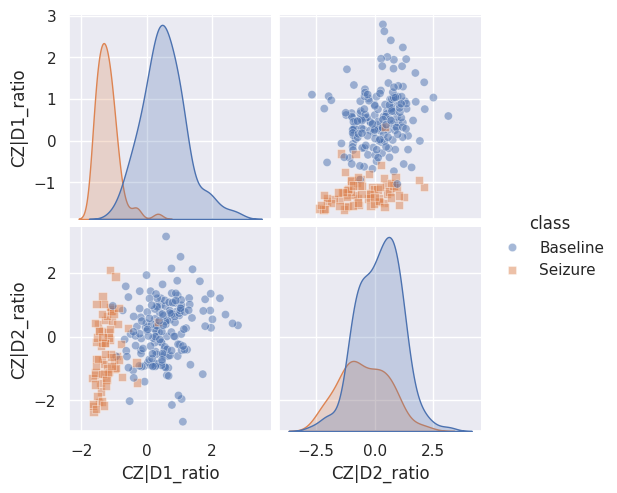

In [ ]:
import seaborn as sns; sns.set(color_codes=True)

def plot_pairplot(data_x, data_y):

    data_plot = data_x.copy()
    data_plot['class'] = np.vectorize({0:'Baseline', 1:'Seizure'}.get)(data_y)
    sns.pairplot(data_plot,
                 hue = 'class',
                 hue_order = ['Baseline','Seizure'],
                 markers=["o", "s"],
                 plot_kws=dict(alpha = 0.5))
    plt.show()

plot_pairplot(reduced_df, y_train)

## Under-Sampling

Resample

Before Resample
Counter({0: 169, 1: 74})


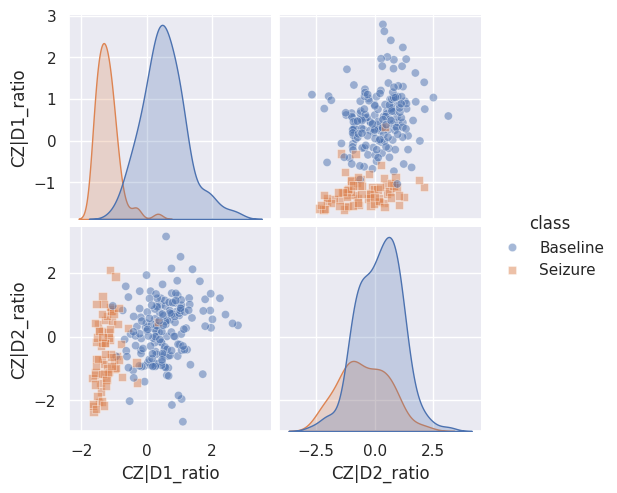

After Resample
Counter({1: 74, 0: 74})


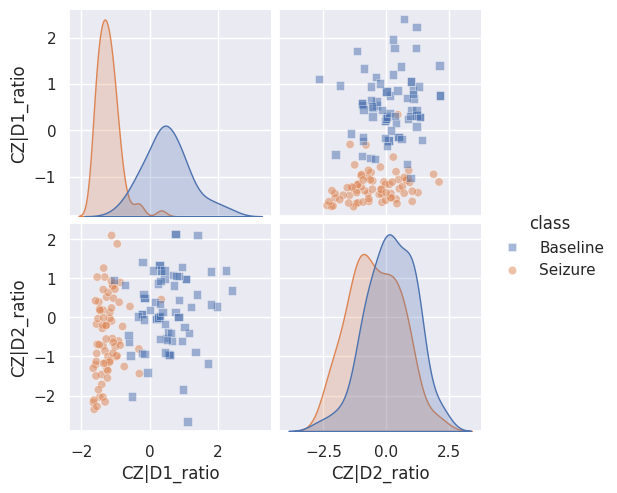

In [ ]:
from sklearn.utils import resample
from collections import Counter

print(color.UNDERLINE + 'Before Resample' + color.END)
print(Counter(y_train))
plot_pairplot(reduced_df, y_train)

print(color.UNDERLINE + 'After Resample' + color.END)
data_x_downsampled, data_y_downsampled = resample(reduced_df[y_train == 0],
                                                  y_train[y_train == 0],
                                                  replace=True,
                                                  n_samples=reduced_df[y_train == 1].shape[0],
                                                  random_state=123)

data_x_bal = np.vstack((reduced_df[y_train == 1], data_x_downsampled))
data_y_bal = np.hstack((y_train[y_train == 1], data_y_downsampled))
print(Counter(data_y_bal))

plot_pairplot(pd.DataFrame(data_x_bal, columns = reduced_df.columns),
              pd.DataFrame(data_y_bal))

RandomUnderSampler

Before Resample
Counter({0: 169, 1: 74})


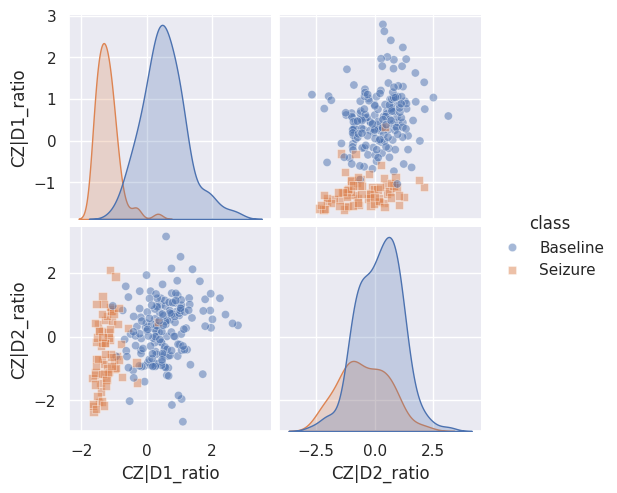

After Resample
Counter({0: 74, 1: 74})


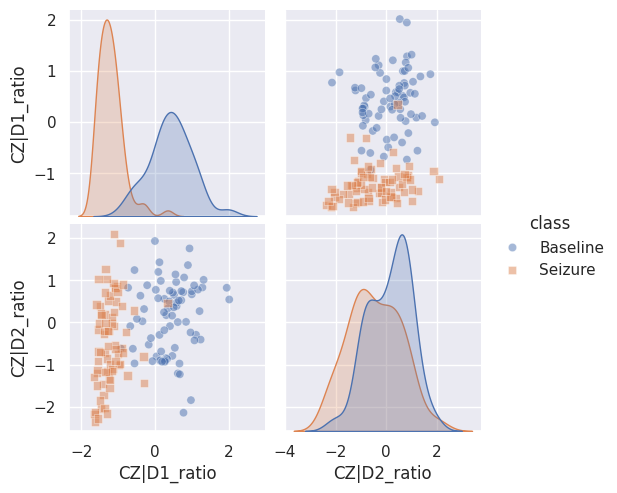

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def imblearn_sample(sampler, data_x, data_y):

    print(color.UNDERLINE + 'Before Resample' + color.END)
    print(Counter(data_y))
    plot_pairplot(data_x, data_y)

    print(color.UNDERLINE + 'After Resample' + color.END)
    data_x_downsampled, data_y_downsampled = sampler.fit_resample(data_x,
                                                                data_y)
    print(Counter(data_y_downsampled))

    plot_pairplot(pd.DataFrame(data_x_downsampled, columns = data_x.columns),
                  pd.DataFrame(data_y_downsampled))

imblearn_sample(RandomUnderSampler(random_state=123), reduced_df, y_train)

## **Over-Sampling**

RandomOverSampler

Before Resample
Counter({0: 169, 1: 74})


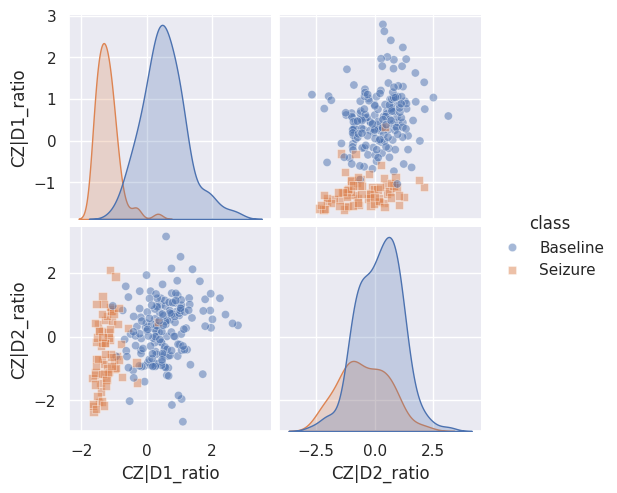

After Resample
Counter({0: 169, 1: 169})


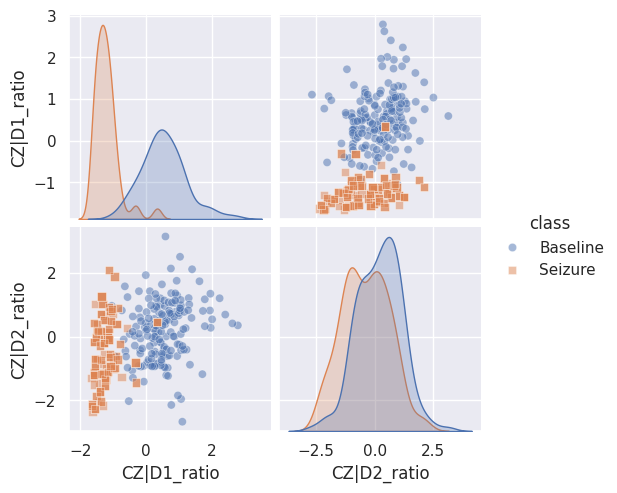

In [ ]:
from imblearn.over_sampling import RandomOverSampler

imblearn_sample(RandomOverSampler(random_state=123), reduced_df, y_train)

ADASYN and SMOTE

SMOTE
Before Resample
Counter({0: 169, 1: 74})


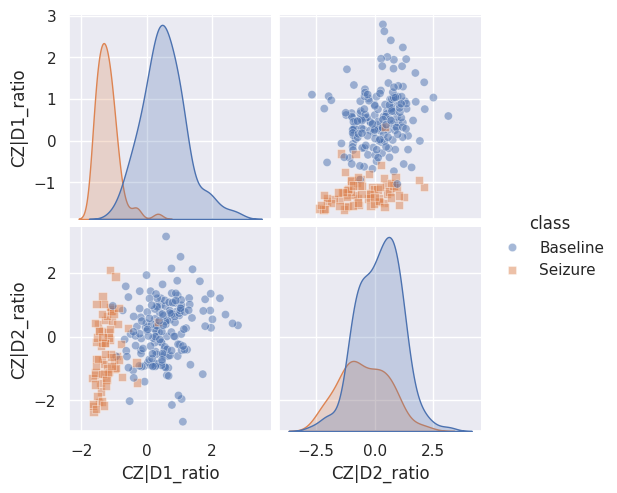

After Resample
Counter({0: 169, 1: 169})


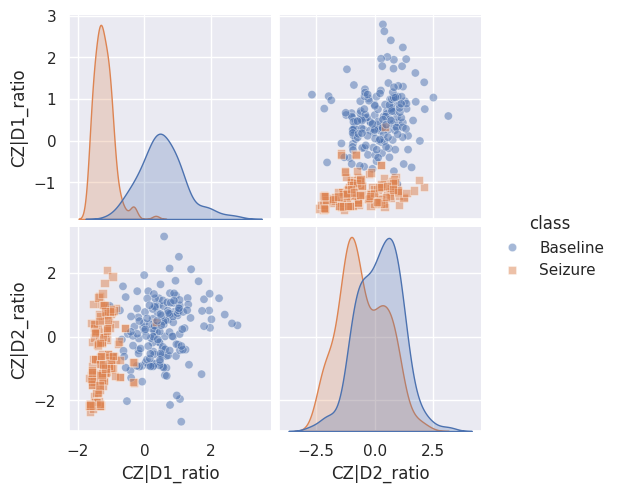

ADASYN
Before Resample
Counter({0: 169, 1: 74})


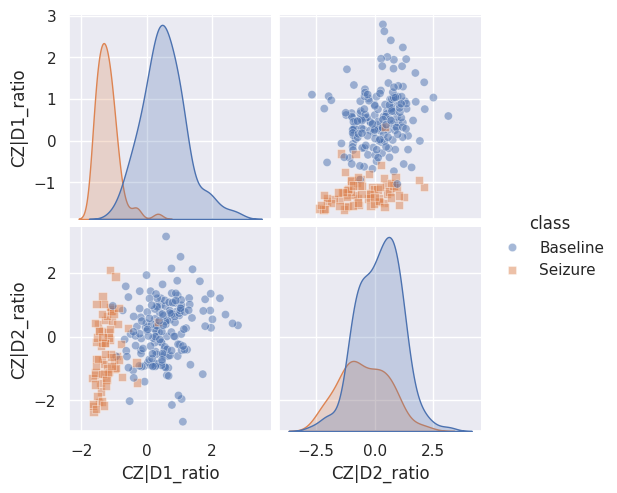

After Resample
Counter({0: 169, 1: 167})


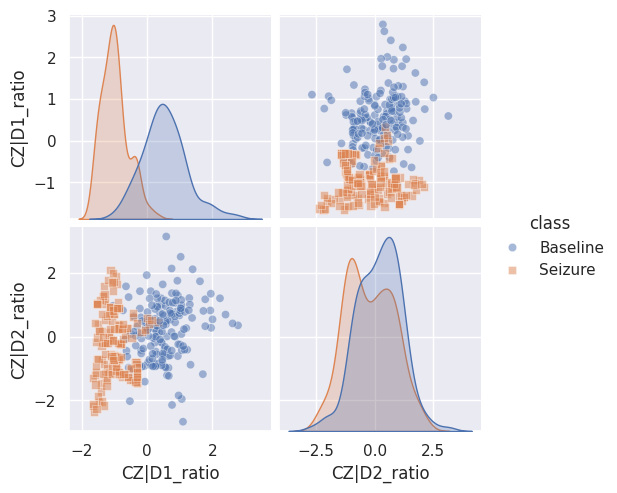

SMOTE with Edited Nearest Neighbor
Before Resample
Counter({0: 169, 1: 74})


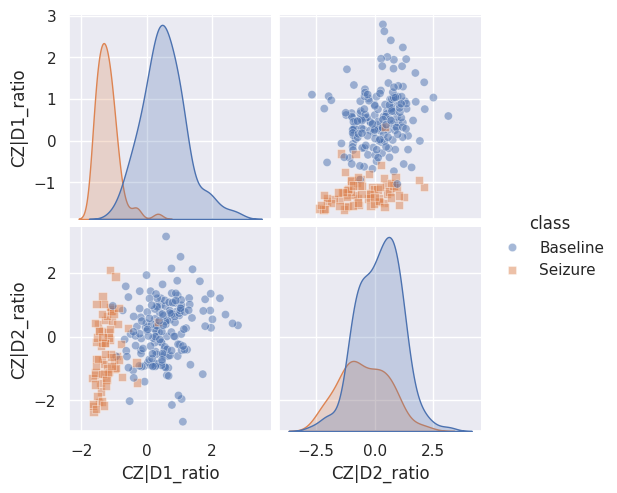

After Resample
Counter({0: 151, 1: 148})


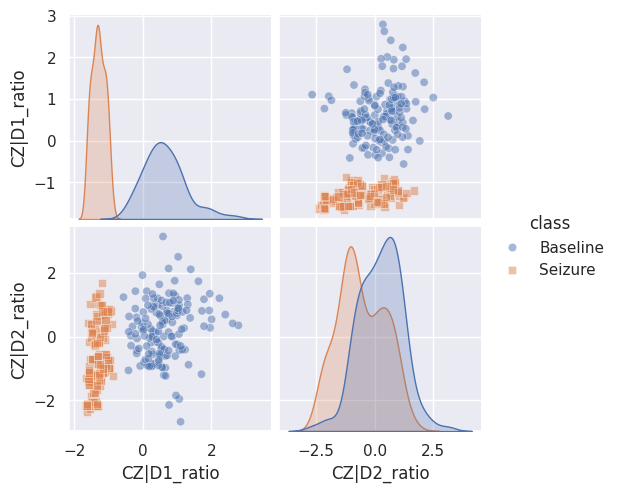

SMOTE with Tomek links
Before Resample
Counter({0: 169, 1: 74})


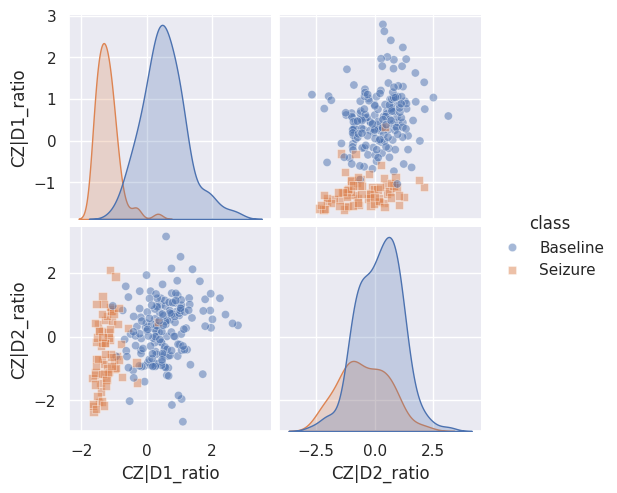

After Resample
Counter({0: 166, 1: 166})


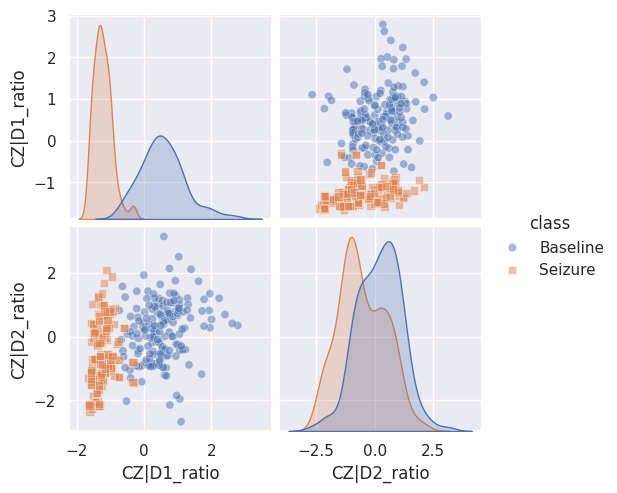

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

print(color.BOLD+color.UNDERLINE+'SMOTE'+color.END)
imblearn_sample(SMOTE(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'ADASYN'+color.END)
imblearn_sample(ADASYN(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'SMOTE with Edited Nearest Neighbor'+color.END)
imblearn_sample(SMOTEENN(random_state=123), reduced_df, y_train)
print(color.BOLD+color.UNDERLINE+'SMOTE with Tomek links'+color.END)
imblearn_sample(SMOTETomek(random_state=123), reduced_df, y_train)

### **Binary Classification**

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(C=100.,
                         solver='liblinear',
                         random_state=RANDOM_STATE)

reg.fit(X_train_scale, y_train)

LogisticRegression(C=100.0, random_state=0, solver='liblinear')

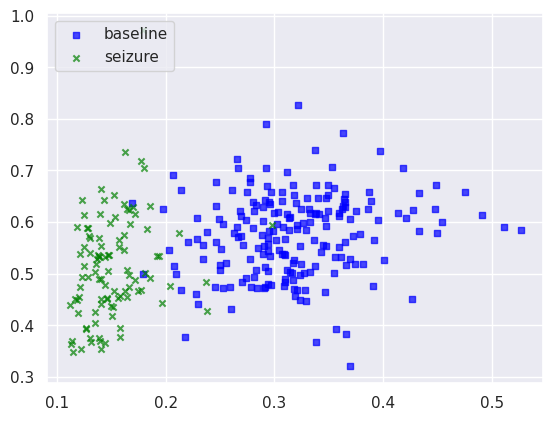

In [ ]:
from mlxtend.plotting import category_scatter

x_axis_label = 'CZ|D1_ratio'
y_axis_label = 'CZ|D2_ratio'

fig = category_scatter(x=x_axis_label, y=y_axis_label, label_col='class',
                       data=feature_reduced, legend_loc='upper left')

feature_list = list(feature_reduced_drop.columns)
vis_data = X_train_scale[:,[feature_list.index(x_axis_label),
                          feature_list.index(y_axis_label)]]

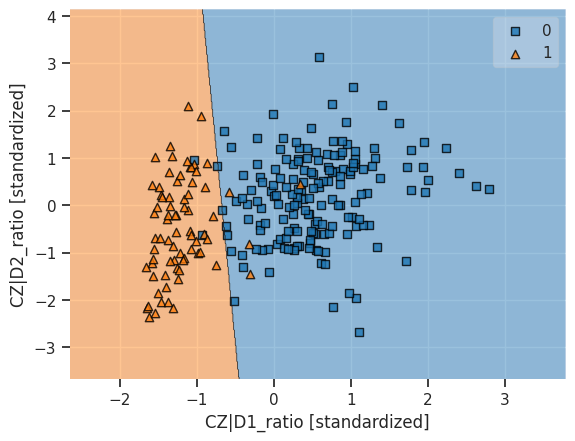

In [ ]:
from mlxtend.plotting import plot_decision_regions

reg.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = reg)

plt.xlabel(x_axis_label + ' [standardized]')
plt.ylabel(y_axis_label + ' [standardized]')
plt.show()

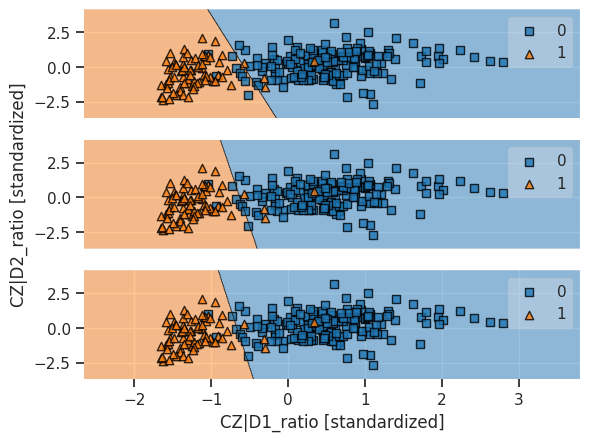

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True)

for i, c in enumerate([0.1, 1, 10]):
    reg = LogisticRegression(C=c, solver='liblinear',random_state=RANDOM_STATE)

    reg.fit(vis_data, y_train)

    plot_decision_regions(vis_data,
                          y_train,
                          clf = reg,
                          ax = axes[i])
    axes[i].get_xaxis().set_visible(False)

axes[2].get_xaxis().set_visible(True)
plt.xlabel(x_axis_label + ' [standardized]')
axes[1].set_ylabel(y_axis_label + ' [standardized]')
plt.savefig('log_change_reg.png')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline

pipe_reg = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(C=100,
                                                solver='liblinear',
                                                class_weight='balanced',
                                                random_state=RANDOM_STATE))])

pipe_reg

Pipeline(steps=[('scl', StandardScaler()),
                ('clf',
                 LogisticRegression(C=100, class_weight='balanced',
                                    random_state=0, solver='liblinear'))])

In [ ]:
pipe_reg.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_reg.score(X_val, y_val))

Validation Accuracy: 1.000


In [ ]:
log_predicted = pipe_reg.predict(X_val)
log_predicted

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0])

In [ ]:
y_val

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0])

## **Support Vector Machine (SVM)**

In [ ]:
from sklearn.svm import SVC

pipe_svc_linear = Pipeline([('scl', StandardScaler()),
                            ('clf', SVC(C=100,
                                        kernel='linear',
                                        class_weight = 'balanced',
                                        random_state=RANDOM_STATE))])

pipe_svc_linear

Pipeline(steps=[('scl', StandardScaler()),
                ('clf',
                 SVC(C=100, class_weight='balanced', kernel='linear',
                     random_state=0))])

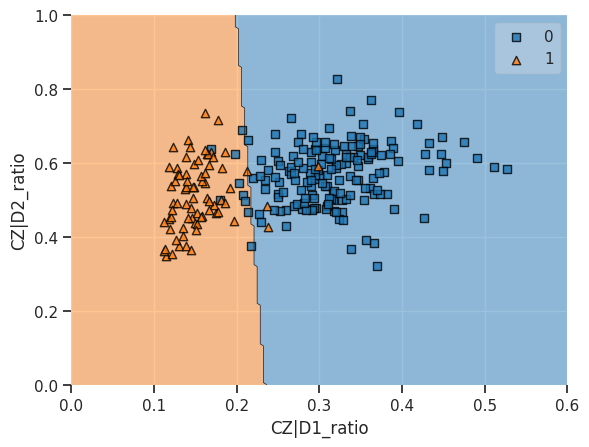

In [ ]:
from mlxtend.plotting import plot_decision_regions

vis_data = X_train[:,[feature_list.index(x_axis_label),
                      feature_list.index(y_axis_label)]]

pipe_svc_linear.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_svc_linear)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)

plt.savefig('svm_linear_boundary.png')
plt.show()

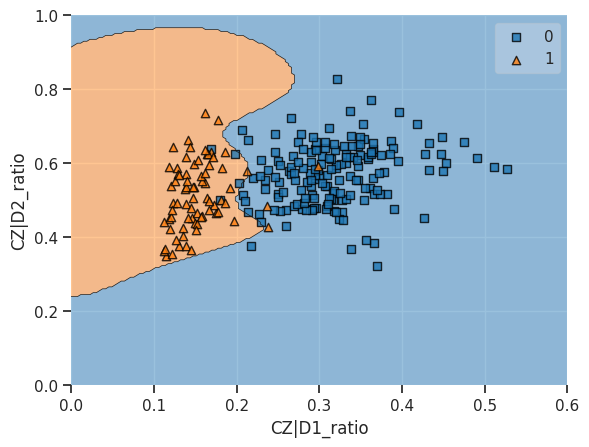

In [ ]:
pipe_svc_rbf = Pipeline([('scl', StandardScaler()),
                         ('clf', SVC(C=100,
                                     kernel='rbf',
                                     class_weight = 'balanced',
                                     random_state=RANDOM_STATE))])

pipe_svc_rbf.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_svc_rbf)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)

plt.savefig('svm_rbf_boundary.png')
plt.show()

In [ ]:
pipe_svc_rbf.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_svc_rbf.score(X_val, y_val))

Validation Accuracy: 1.000


## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = 1,
                            random_state=RANDOM_STATE)

DT

DecisionTreeClassifier(max_depth=1, random_state=0)

In [ ]:
!pip install graphviz

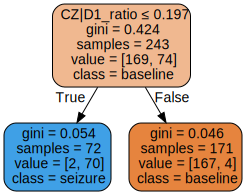

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
import graphviz

DT.fit(vis_data, y_train)
dot_data = export_graphviz(DT, out_file=None,
                     feature_names=[x_axis_label, y_axis_label],
                     class_names=feature_reduced['class'].unique(),
                     filled=True, rounded=True,
                     special_characters=True)

# Save it
graph = graph_from_dot_data(dot_data)
graph.write_png('binary_split.png')

# Show it
graphviz.Source(dot_data)

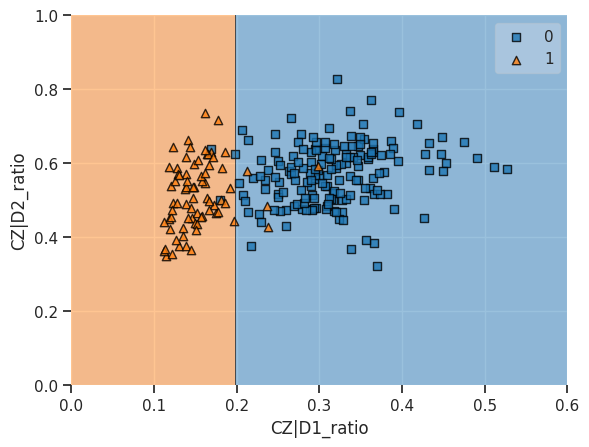

In [ ]:
plot_decision_regions(vis_data,
                      y_train,
                      clf = DT)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

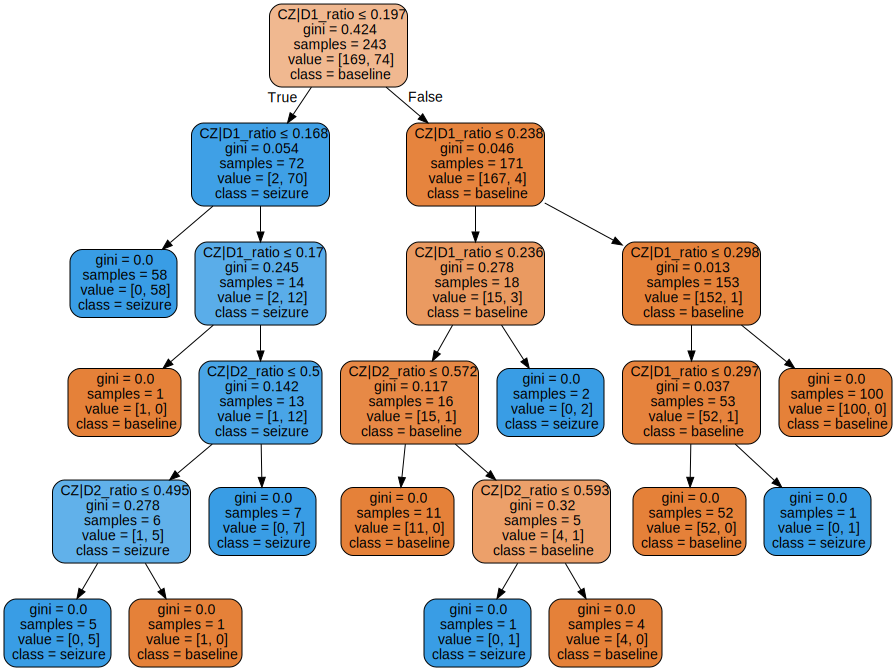

In [ ]:
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
DT.fit(vis_data, y_train)

dot_data = export_graphviz(DT, out_file=None,
                     feature_names=[x_axis_label, y_axis_label],
                     class_names=feature_reduced['class'].unique(),
                     filled=True, rounded=True,
                     special_characters=True)

# Save it
graph = graph_from_dot_data(dot_data)
graph.write_png('multi_split.png')

# Show it
graphviz.Source(dot_data)

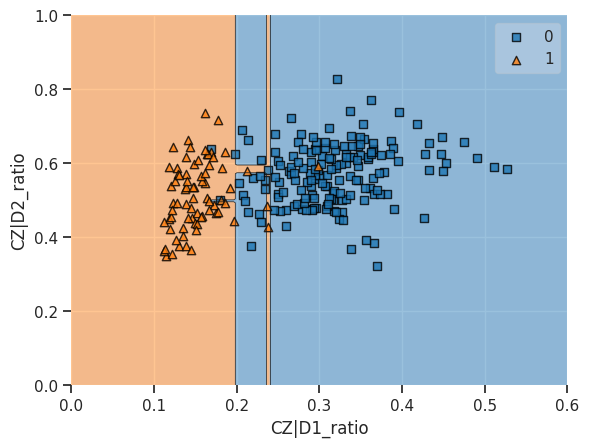

In [ ]:
plot_decision_regions(vis_data,
                      y_train,
                      clf = DT)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

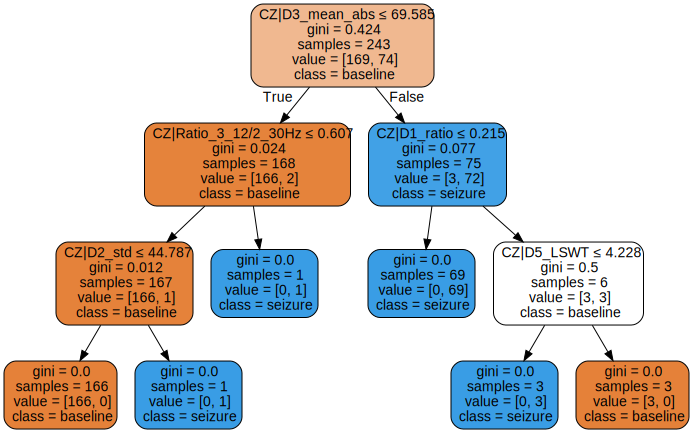

In [ ]:
DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
DT.fit(X_train, y_train)

dot_data = export_graphviz(DT, out_file=None,
                     feature_names=feature_reduced_drop.columns,
                     class_names=feature_reduced['class'].unique(),
                     filled=True, rounded=True,
                     special_characters=True)

graphviz.Source(dot_data)

In [ ]:
print('Validation Accuracy: %.3f' % DT.score(X_val, y_val))

Validation Accuracy: 1.000


## K-Nearest Neighbors

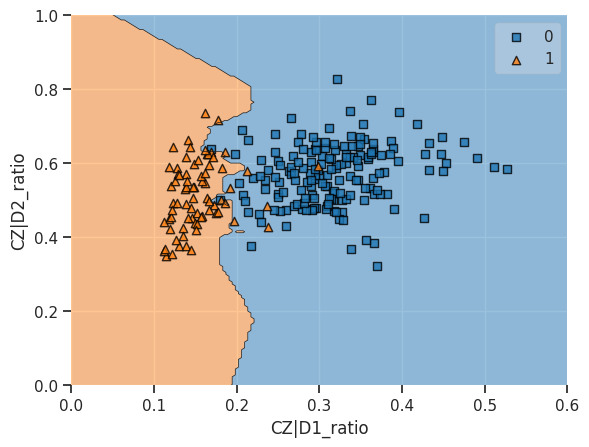

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('clf', KNeighborsClassifier(n_neighbors=2))])

pipe_knn.fit(vis_data, y_train)

plot_decision_regions(vis_data,
                      y_train,
                      clf = pipe_knn)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

In [ ]:
pipe_knn.fit(X_train, y_train)
print('Validation Accuracy: %.3f' % pipe_knn.score(X_val, y_val))

Validation Accuracy: 1.000


### **Multiclass Classification**

In [ ]:
multi_data_x = feature_df.drop(['class','file_id', 'location'],
                         axis='columns').values

# make a label encoder
le = LabelEncoder()
# change the string labels to ints
multi_data_y = le.fit_transform(feature_df['location'])

multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(multi_data_x,
                                                    multi_data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

multi_X_train, multi_X_val, multi_y_train, multi_y_val = train_test_split(multi_X_train,
                                                  multi_y_train,
                                                  test_size=TEST_SIZE,
                                                  random_state=RANDOM_STATE)

In [ ]:
multi_DT = DecisionTreeClassifier(criterion='gini',
                            max_depth = None,
                            random_state=RANDOM_STATE)
multi_DT.fit(multi_X_train, multi_y_train)

multi_DT.predict_proba(multi_X_val[:5,:])

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

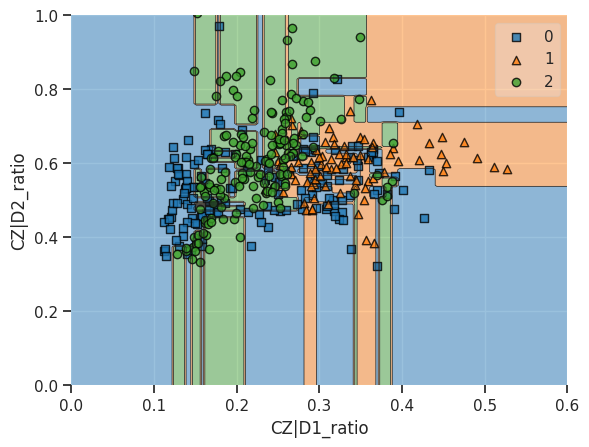

In [ ]:
multi_vis_data = multi_X_train[:,[feature_list.index(x_axis_label),
                      feature_list.index(y_axis_label)]]

multi_DT.fit(multi_vis_data, multi_y_train)

plot_decision_regions(multi_vis_data,
                      multi_y_train,
                      clf = multi_DT)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

In [ ]:
from sklearn.multiclass import OneVsRestClassifier

multi_pipe_svc_rbf = Pipeline([
    ('scl', StandardScaler()),
    ('clf', OneVsRestClassifier(SVC(C=100,
                                    kernel='rbf',
                                    gamma = 'auto',
                                    class_weight = 'balanced',
                                    random_state=RANDOM_STATE)))])

multi_pipe_svc_rbf.fit(multi_X_train, multi_y_train)
print('Validation Accuracy: %.3f' % multi_pipe_svc_rbf.score(multi_X_val, multi_y_val))

Validation Accuracy: 0.844


In [ ]:
from sklearn.multiclass import OneVsOneClassifier

multi_pipe_svc_rbf = Pipeline([
    ('scl', StandardScaler()),
    ('clf', OneVsOneClassifier(SVC(C=100,
                                   kernel='rbf',
                                   gamma = 'auto',
                                   class_weight = 'balanced',
                                   random_state=RANDOM_STATE)))])

multi_pipe_svc_rbf.fit(multi_X_train, multi_y_train)
print('Validation Accuracy: %.3f' % multi_pipe_svc_rbf.score(multi_X_val, multi_y_val))

Validation Accuracy: 0.889


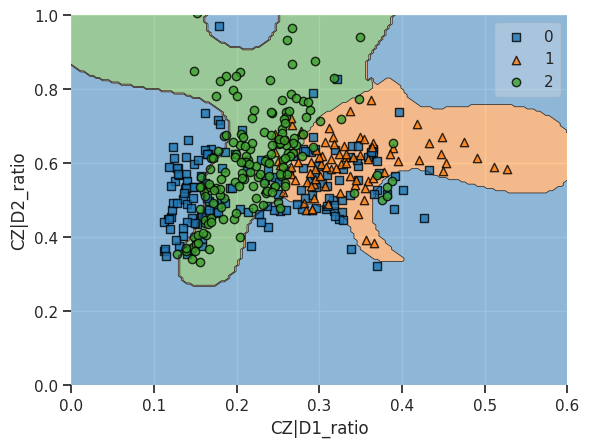

In [ ]:
multi_pipe_svc_rbf.fit(multi_vis_data, multi_y_train)

plot_decision_regions(multi_vis_data,
                      multi_y_train,
                      clf = multi_pipe_svc_rbf)

plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.xlim(0,.6)
plt.ylim(0,1.)
plt.show()

### **Model Evaluation and Hyperparameter Tuning**

# **Environment Set-up**

In [ ]:
import os
import gdown
FILE_PATH = 'Epil_features.json.gzip'

if not os.path.exists(FILE_PATH):
    gdown.download('https://drive.google.com/uc?id=143dJfY1_U-p8elbvSzwe0TTHGcDo3PYv',
                './'+FILE_PATH, quiet=False)

In [ ]:
import matplotlib.pyplot as plt   # for plotting
import numpy as np                # arrays
import pickle                     # saving python objects
import pandas as pd               # dataframes

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# load features dataframe
feature_df = pd.read_json(FILE_PATH, orient='index', compression = 'gzip')

# display examples of the data
display(feature_df.info())
display(feature_df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 500 non-null    object 
 1   location              500 non-null    object 
 2   file_id               500 non-null    object 
 3   CZ|2_4Hz              500 non-null    float64
 4   CZ|4_8Hz              500 non-null    float64
 5   CZ|8_12Hz             500 non-null    float64
 6   CZ|12_30Hz            500 non-null    float64
 7   CZ|30_70Hz            500 non-null    float64
 8   CZ|Ratio_3_12/2_30Hz  500 non-null    float64
 9   CZ|D6_mean            500 non-null    float64
 10  CZ|D5_mean            500 non-null    float64
 11  CZ|D4_mean            500 non-null    float64
 12  CZ|D3_mean            500 non-null    float64
 13  CZ|D2_mean            500 non-null    float64
 14  CZ|D1_mean            500 non-null    float64
 15  CZ|D6_std             500 no

None

class                         location file_id     CZ|2_4Hz    CZ|4_8Hz  \
0  baseline  intracranial epileptogenic zone    F001    77.429564   28.734279   
1  baseline  intracranial epileptogenic zone    F002  1060.585071  480.018796   
2  baseline  intracranial epileptogenic zone    F003   316.076591  186.372298   
3  baseline  intracranial epileptogenic zone    F004   213.966621   91.338657   
4  baseline  intracranial epileptogenic zone    F005   973.296659  385.347164   

    CZ|8_12Hz  CZ|12_30Hz  CZ|30_70Hz  CZ|Ratio_3_12/2_30Hz  CZ|D6_mean  ...  \
0   13.102026    2.467909    0.462172              0.138219   -1.758529  ...   
1  201.886582   29.713494    4.070126              0.140057  -43.528777  ...   
2  135.970946   20.841888    2.781560              0.148809    7.140095  ...   
3   34.191639    3.157286    0.573759              0.064002  -15.857898  ...   
4  218.880920   47.891201    7.560384              0.183348  -21.433089  ...   

   CZ|D4_mean_abs  CZ|D3_mean_abs  CZ|D2_mean_abs  CZ|D1_mean_abs  CZ|D6_LSWT  \
0       28.409123       14.772764        5.266416        1.910710    0.000000   
1       81.999218       31.116812        8.462824        1.761159    0.000000   
2       87.018413       39.403208       10.376156        2.179047    7.534104   
3       45.580184       17.377872        4.953816        1.812019    0.000000   
4      113.995056       52.705751       17.566081        3.478807    8.055723   

   CZ|D5_LSWT  CZ|D4_LSWT  CZ|D3_LSWT  CZ|D2_LSWT  CZ|D1_LSWT  
0    6.427250    5.613190    5.805773    4.749819    3.665018  
1    8.241056    7.388935    7.770027    8.062119    8.020356  
2    0.000000    7.412203    6.336933    7.197397    7.170449  
3    6.422032    7.582963    6.947882    7.086014    6.950912  
4    0.000000    8.726303    8.031105    8.460379    8.480473  

[5 rows x 39 columns]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.2
RANDOM_STATE = 0

feature_reduced = feature_df[feature_df.location != 'surface']
feature_reduced_drop = feature_reduced.drop(['class', 'file_id', 'location'],
                                            axis='columns')
data_x = feature_reduced_drop.values

# make a label encoder
le = LabelEncoder()
# change the string labels to ints
data_y = le.fit_transform(feature_reduced['class'])

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size=TEST_SIZE,
                                                  random_state=RANDOM_STATE)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(192, 36) (48, 36) (60, 36)
(192,) (48,) (60,)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Logistic Regression
pipe_reg = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression(class_weight='balanced',
                                                solver = 'liblinear',
                                                random_state=RANDOM_STATE))])

# Support Vector Machine
pipe_svc = Pipeline([('scl', StandardScaler()),
                    ('clf', SVC(kernel='rbf',
                                class_weight = 'balanced',
                                probability=True,
                                random_state=RANDOM_STATE))])

# Decision Tree
DT = DecisionTreeClassifier(random_state=RANDOM_STATE)

# K-Nearest Neighbours
pipe_kkn = Pipeline([('scl', StandardScaler()),
                    ('clf', KNeighborsClassifier())])

# list of classifier names
classifier_names = ['Logistic Regression', 'Support Vector Machine',
                    'Decision Tree', 'K-Nearest Neighbors']

# list of classifiers
classifiers = [pipe_reg, pipe_svc, DT, pipe_kkn]

# fit all the classifiers to the training data
for classifier in classifiers:
  classifier.fit(X_train, y_train)

## Performance Evaluation

## Metrics

<ipython-input-136-cbd1f1d81ec6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['Baseline', 'Seizure'])
<ipython-input-136-cbd1f1d81ec6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['Baseline', 'Seizure'])


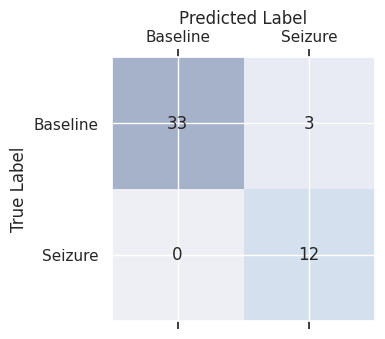

In [ ]:
from sklearn.metrics import confusion_matrix

def pretty_confusion_matrix(confmat):

    # this creates the matplotlib graph to make the confmat look nicer
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    # change the labels
    ax.set_xticklabels(['']+['Baseline', 'Seizure'])
    ax.set_yticklabels(['']+['Baseline', 'Seizure'])

    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    ax.xaxis.set_label_position('top')

    plt.tight_layout()

    plt.show()


# use the first classifier to predict the validation set
predictions = classifiers[1].predict(X_val)

# get the confusion matrix as a numpy array
confmat = confusion_matrix(y_true=y_val, y_pred=predictions)

# use the pretty function to make it nicer
pretty_confusion_matrix(confmat)

In [ ]:
FP = confmat[0,1]
TN = confmat[0,0]
TP = confmat[1,1]
FN = confmat[1,0]

ERR = (FP+FN)/(FP+FN+TP+TN)
ACC = 1-ERR
TPR = TP/(FN+TP)
FPR = FP/(FP+TN)
PRE = TP/(TP+FP)
REC = TP/(FN+TP)
F1 = 2*((PRE*REC)/(PRE+REC))

print('True positive rate (TPR): %.3f' % TPR)
print('False positive rate (FPR): %.3f' % FPR)
print('Error (ERR): %.3f' % ERR)
print()
print('Accuracy (ACC): %.3f' % ACC)
print('Precision (PRE): %.3f' % PRE)
print('Recall (REC): %.3f' % REC)
print('F1-score (F1): %.3f' % F1)

True positive rate (TPR): 1.000
False positive rate (FPR): 0.083
Error (ERR): 0.062

Accuracy (ACC): 0.938
Precision (PRE): 0.800
Recall (REC): 1.000
F1-score (F1): 0.889


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score

print('Accuracy (ACC): %.3f' % accuracy_score(y_true=y_val, y_pred=predictions))
print('Precision (PRE): %.3f' % precision_score(y_true=y_val, y_pred=predictions))
print('Recall (REC): %.3f' % recall_score(y_true=y_val, y_pred=predictions))
print('F1-score (F1): %.3f' % f1_score(y_true=y_val, y_pred=predictions))

Accuracy (ACC): 0.938
Precision (PRE): 0.800
Recall (REC): 1.000
F1-score (F1): 0.889


In [ ]:
from sklearn.metrics import classification_report

pd.DataFrame(classification_report(y_val,
                                   predictions,
                                   labels=None,
                                   target_names=['Baseline', 'Seizure'],
                                   sample_weight=None,
                                   digits=2,
                                   output_dict=True))

Baseline    Seizure  accuracy  macro avg  weighted avg
precision   1.000000   0.800000    0.9375   0.900000      0.950000
recall      0.916667   1.000000    0.9375   0.958333      0.937500
f1-score    0.956522   0.888889    0.9375   0.922705      0.939614
support    36.000000  12.000000    0.9375  48.000000     48.000000

Logistic Regression


<ipython-input-136-cbd1f1d81ec6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['Baseline', 'Seizure'])
<ipython-input-136-cbd1f1d81ec6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['Baseline', 'Seizure'])


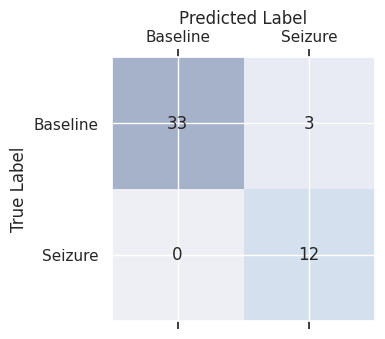

Support Vector Machine


<ipython-input-136-cbd1f1d81ec6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['Baseline', 'Seizure'])
<ipython-input-136-cbd1f1d81ec6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['Baseline', 'Seizure'])


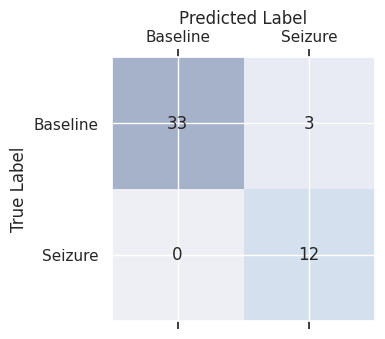

Decision Tree


<ipython-input-136-cbd1f1d81ec6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['Baseline', 'Seizure'])
<ipython-input-136-cbd1f1d81ec6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['Baseline', 'Seizure'])


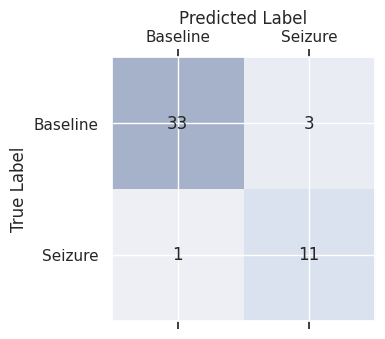

K-Nearest Neighbors


<ipython-input-136-cbd1f1d81ec6>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+['Baseline', 'Seizure'])
<ipython-input-136-cbd1f1d81ec6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+['Baseline', 'Seizure'])


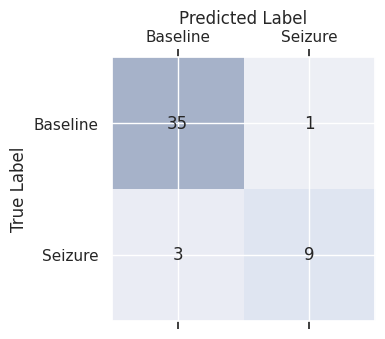

In [ ]:
for i, classifier in enumerate(classifiers):
  print(color.BOLD+color.UNDERLINE+classifier_names[i]+color.END)

  predictions = classifier.predict(X_val)

  confmat = confusion_matrix(y_true=y_val, y_pred=predictions)

  pretty_confusion_matrix(confmat)

In [ ]:
for i, classifier in enumerate(classifiers):
  predictions = classifier.predict(X_val)

  classifier_score_df = pd.DataFrame(
      classification_report(y_val,
                            predictions,
                            target_names=['Baseline', 'Seizure'],
                            digits=2,
                            output_dict=True))

  classifier_score_df.index.name = 'Metric'
  classifier_score_df['Classifier'] = classifier_names[i]
  classifier_score_df = classifier_score_df.set_index('Classifier', append=True)

  if i == 0:
    all_scores = classifier_score_df

  else:
    all_scores = pd.concat([all_scores, classifier_score_df])

all_scores.sort_index()

Baseline    Seizure  accuracy  macro avg  \
Metric    Classifier                                                          
f1-score  Decision Tree            0.942857   0.846154  0.916667   0.894505   
          K-Nearest Neighbors      0.945946   0.818182  0.916667   0.882064   
          Logistic Regression      0.956522   0.888889  0.937500   0.922705   
          Support Vector Machine   0.956522   0.888889  0.937500   0.922705   
precision Decision Tree            0.970588   0.785714  0.916667   0.878151   
          K-Nearest Neighbors      0.921053   0.900000  0.916667   0.910526   
          Logistic Regression      1.000000   0.800000  0.937500   0.900000   
          Support Vector Machine   1.000000   0.800000  0.937500   0.900000   
recall    Decision Tree            0.916667   0.916667  0.916667   0.916667   
          K-Nearest Neighbors      0.972222   0.750000  0.916667   0.861111   
          Logistic Regression      0.916667   1.000000  0.937500   0.958333   
          Support Vector Machine   0.916667   1.000000  0.937500   0.958333   
support   Decision Tree           36.000000  12.000000  0.916667  48.000000   
          K-Nearest Neighbors     36.000000  12.000000  0.916667  48.000000   
          Logistic Regression     36.000000  12.000000  0.937500  48.000000   
          Support Vector Machine  36.000000  12.000000  0.937500  48.000000   

                                  weighted avg  
Metric    Classifier                            
f1-score  Decision Tree               0.918681  
          K-Nearest Neighbors         0.914005  
          Logistic Regression         0.939614  
          Support Vector Machine      0.939614  
precision Decision Tree               0.924370  
          K-Nearest Neighbors         0.915789  
          Logistic Regression         0.950000  
          Support Vector Machine      0.950000  
recall    Decision Tree               0.916667  
          K-Nearest Neighbors         0.916667  
          Logistic Regression         0.937500  
          Support Vector Machine      0.937500  
support   Decision Tree              48.000000  
          K-Nearest Neighbors        48.000000  
          Logistic Regression        48.000000  
          Support Vector Machine     48.000000

## Receiver Operating Characteristic (ROC) Curve

We can also use plots to visualise each models performance.

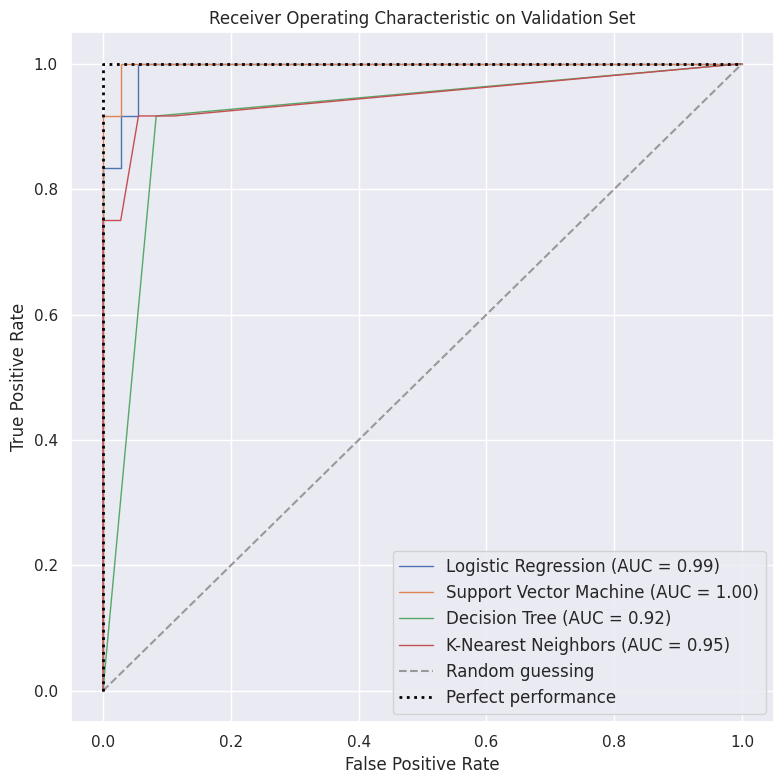

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def ROC(classifiers, classifier_names, X_train, X_val, y_train, y_val, image_file_path):
    """
    Plot the ROC curve for multiple classifiers and save the image to a specified file path.

    Parameters:
    - classifiers: List of classifier models to evaluate.
    - classifier_names: List of names corresponding to the classifiers.
    - X_train, X_val: Training and validation feature sets.
    - y_train, y_val: Training and validation labels.
    - image_file_path: Path to save the ROC curve plot.
    """
    # Set up the plot
    fig, ax = plt.subplots(figsize=(8, 8))

    # Iterate over each classifier
    for i, classifier in enumerate(classifiers):
        # Fit the classifier and predict probabilities for validation set
        probas = classifier.fit(X_train, y_train).predict_proba(X_val)

        # Get the ROC curve metrics
        fpr, tpr, thresholds = roc_curve(y_val, probas[:, 1], pos_label=1)
        roc_auc = auc(fpr, tpr)

        # Plot the ROC curve for each classifier
        ax.plot(fpr, tpr, lw=1, label='{} (AUC = {:.2f})'.format(classifier_names[i], roc_auc))

    # Plot random guessing line
    ax.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='Random guessing')

    # Plot perfect performance line
    ax.plot([0, 0, 1], [0, 1, 1], lw=2, linestyle=':', color='black', label='Perfect performance')

    # Set plot limits and labels
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic on Validation Set')
    ax.legend(loc="lower right", fontsize='medium')

    # Save and display the plot
    plt.tight_layout()
    plt.savefig(image_file_path, dpi=300)
    plt.show()

ROC(classifiers, classifier_names, X_train, X_val, y_train,
    y_val, 'Classifiers_ROC.png')


## **Ensemble Learning**

Environment Set-up

In [ ]:
!pip install h5py tables kaggle mne
!pip install --upgrade imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 45.5 MB/s eta 0:00:00


In [ ]:
import os                         # for file locations
import matplotlib.pyplot as plt   # for plotting
import numpy as np                # arrays
import pickle                     # saving python objects
import pandas as pd               # dataframes
import tables

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
import gdown
FILE_PATH = 'UPennMayo_features.hdf5'

if not os.path.exists(FILE_PATH):
    gdown.download('https://drive.google.com/uc?id=1-0Y0eKW9hIeOdKlYbi9UAojERKbQzi5d',
                './'+FILE_PATH, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1-0Y0eKW9hIeOdKlYbi9UAojERKbQzi5d
To: /content/UPennMayo_features.hdf5
100%|██████████| 47.9M/47.9M [00:00<00:00, 49.8MB/s]


Load Data

In [ ]:
# load features dataframe
h5file = tables.open_file(FILE_PATH, mode="r+")
h5file

File(filename=UPennMayo_features.hdf5, title='Upenn Features', mode='r+', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) 'Upenn Features'
/Patient_2 (Group) 'Participant Data'
/Patient_2/Data_x (EArray(7035, 848)) 'Feature Array'
  atom := Float64Atom(shape=(), dflt=0.0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (9, 848)
/Patient_2/Data_x_Feat_Names (Array(848,)) 'Names of Each Feature'
  atom := StringAtom(itemsize=29, shape=(), dflt=b'')
  maindim := 0
  flavor := 'numpy'
  byteorder := 'irrelevant'
  chunkshape := None
/Patient_2/Data_y (EArray(7035, 1)) 'Events Array'
  atom := Int64Atom(shape=(), dflt=0)
  maindim := 0
  flavor := 'numpy'
  byteorder := 'little'
  chunkshape := (8192, 1)

In [ ]:
data_x = h5file.get_node('/Patient_2/Data_x')
data_y = h5file.get_node('/Patient_2/Data_y')
data_x_labels = h5file.get_node('/Patient_2/Data_x_Feat_Names')

part_feature_df = pd.DataFrame(data_x[:], columns = data_x_labels[:].astype(str))
part_feature_df['class'] = data_y[:]
part_feature_df = part_feature_df.set_index('class')
part_feature_df.head()

LMacro_01|2_4Hz  LMacro_01|4_8Hz  LMacro_01|8_12Hz  LMacro_01|12_30Hz  \
class                                                                          
1           227.771604       121.729376        104.748192          12.558394   
1           162.957202        77.334727         39.298664         159.289935   
1             7.328949        42.812358         74.461760          98.214038   
1           213.279844        85.966538         48.585487         241.390643   
1            44.163924        27.442250         42.136054         177.165579   

       LMacro_01|30_70Hz  LMacro_01|Ratio_3_12/2_30Hz  LMacro_01|D6_mean  \
class                                                                      
1               0.647189                     0.236310          -1.464481   
1              17.511810                     0.521757          -0.524147   
1               8.702826                     0.631694           4.117210   
1              19.657826                     1.773919           1.079959   
1              15.002302                     1.353723          -1.712907   

       LMacro_01|D5_mean  LMacro_01|D4_mean  LMacro_01|D3_mean  ...  \
class                                                           ...   
1              -0.824742           0.013091           0.079837  ...   
1              -2.195927           0.170249           0.077665  ...   
1              -0.597011          -0.399529           0.090689  ...   
1               0.292291           0.022378           0.049902  ...   
1               1.431398          -0.246839          -0.003639  ...   

       RMacro_04_RMacro_05|time_corr  RMacro_04_RMacro_06|time_corr  \
class                                                                 
1                           0.273753                       0.363735   
1                           0.402350                       0.379938   
1                          -0.020415                      -0.103571   
1                          -0.194032                      -0.129580   
1                           0.099375                       0.115953   

       RMacro_04_RMacro_07|time_corr  RMacro_04_RMacro_08|time_corr  \
class                                                                 
1                           0.389202                       0.297462   
1                           0.046323                      -0.029894   
1                          -0.071538                      -0.048586   
1                           0.018119                       0.232352   
1                           0.158055                       0.105109   

       RMacro_05_RMacro_06|time_corr  RMacro_05_RMacro_07|time_corr  \
class                                                                 
1                           0.789810                       0.652605   
1                           0.765875                       0.426919   
1                           0.807652                       0.638780   
1                           0.842868                       0.673148   
1                           0.680998                       0.362963   

       RMacro_05_RMacro_08|time_corr  RMacro_06_RMacro_07|time_corr  \
class                                                                 
1                           0.519944                       0.953851   
1                           0.379509                       0.808733   
1                           0.563594                       0.936139   
1                           0.445052                       0.857085   
1                           0.242693                       0.834629   

       RMacro_06_RMacro_08|time_corr  RMacro_07_RMacro_08|time_corr  
class                                                                
1                           0.796902                       0.888274  
1                           0.732159                       0.911896  
1                           0.864730                       0.954777  
1                           0.559804                       0.861035  
1  

## **Data Preparation**

In [ ]:
part_feature_df.index.value_counts()

class
2    3894
0    2990
1     151
Name: count, dtype: int64

In [ ]:
reduced_features = part_feature_df.loc[[0,1]]
reduced_features.head()

LMacro_01|2_4Hz  LMacro_01|4_8Hz  LMacro_01|8_12Hz  LMacro_01|12_30Hz  \
class                                                                          
0           114.541010        26.387061         11.821119           1.357175   
0            27.574621        43.245174         18.910574           0.791160   
0            58.207500        18.142876          8.238157           1.537487   
0           142.960698        11.285728         13.005110           1.014406   
0           221.105230        39.302649         28.439736           3.143172   

       LMacro_01|30_70Hz  LMacro_01|Ratio_3_12/2_30Hz  LMacro_01|D6_mean  \
class                                                                      
0               0.127231                     0.080726          -0.128602   
0               0.113143                     0.028620          -0.566416   
0               0.341276                     0.179073           0.500630   
0               0.283393                     0.118613          -0.823890   
0               0.317358                     0.072439           0.119001   

       LMacro_01|D5_mean  LMacro_01|D4_mean  LMacro_01|D3_mean  ...  \
class                                                           ...   
0               0.118216          -0.101168          -0.033279  ...   
0              -0.064466          -0.082230           0.007399  ...   
0              -0.156088           0.016892           0.061672  ...   
0               0.296830           0.030066          -0.039112  ...   
0               0.103982          -0.235290          -0.002702  ...   

       RMacro_04_RMacro_05|time_corr  RMacro_04_RMacro_06|time_corr  \
class                                                                 
0                          -0.303116                      -0.431413   
0                          -0.427137                      -0.388867   
0                           0.121037                       0.126031   
0                           0.119059                       0.116303   
0                          -0.272180                       0.054720   

       RMacro_04_RMacro_07|time_corr  RMacro_04_RMacro_08|time_corr  \
class                                                                 
0                          -0.376480                      -0.411506   
0                          -0.327155                      -0.370580   
0                           0.092073                      -0.025342   
0                           0.282626                       0.113695   
0                          -0.089779                       0.077794   

       RMacro_05_RMacro_06|time_corr  RMacro_05_RMacro_07|time_corr  \
class                                                                 
0                           0.544665                       0.179166   
0                           0.750489                       0.593814   
0                           0.779517                       0.483535   
0                           0.737446                       0.529281   
0                           0.721609                       0.470620   

       RMacro_05_RMacro_08|time_corr  RMacro_06_RMacro_07|time_corr  \
class                                                                 
0                           0.469152                       0.890269   
0                           0.665086                       0.956724   
0                           0.452129                       0.887166   
0                           0.288499                       0.719412   
0                           0.344036                       0.810304   

       RMacro_06_RMacro_08|time_corr  RMacro_07_RMacro_08|time_corr  
class                                                                
0                           0.827349                       0.822477  
0                           0.870345                       0.912751  
0                           0.724896                       0.718923  
0                           0.648070                       0.786587  
0  

In [ ]:
from sklearn.model_selection import train_test_split

TEST_SIZE = 0.1
RANDOM_STATE = 0

# turn to numpy array
data_x = reduced_features.values

# create condition(group) array
data_y = reduced_features.index.values

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(2543, 848) (283, 848) (315, 848)
(2543,) (283,) (315,)


## **Averaging Methods**

## Bagging

In [ ]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

pipe_svc = Pipeline([('scl', StandardScaler()),
                     ('pca', PCA(n_components=0.8, random_state = RANDOM_STATE)),
                     ('clf', SVC(kernel='rbf', random_state=RANDOM_STATE))])

bag = BaggingClassifier(base_estimator=pipe_svc,
                        n_estimators=10,
                        max_samples=0.5,
                        max_features=0.5,
                        bootstrap=True,
                        bootstrap_features=True,
                        oob_score=True,
                        warm_start=False,
                        n_jobs=-1,
                        random_state=RANDOM_STATE)
bag.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


CPU times: user 874 ms, sys: 594 ms, total: 1.47 s
Wall time: 4.97 s


BaggingClassifier(base_estimator=Pipeline(steps=[('scl', StandardScaler()),
                                                 ('pca',
                                                  PCA(n_components=0.8,
                                                      random_state=0)),
                                                 ('clf', SVC(random_state=0))]),
                  bootstrap_features=True, max_features=0.5, max_samples=0.5,
                  n_jobs=-1, oob_score=True, random_state=0)

In [ ]:
y_pred = bag.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict =True)))

0          1  accuracy   macro avg  weighted avg
precision    0.985294   0.818182  0.978799    0.901738      0.977618
recall       0.992593   0.692308  0.978799    0.842450      0.978799
f1-score     0.988930   0.750000  0.978799    0.869465      0.977954
support    270.000000  13.000000  0.978799  283.000000    283.000000

In [ ]:
bag.oob_score_

0.9897758552890287

In [ ]:
!pip install -U imbalanced-learn

from imblearn.ensemble import BalancedBaggingClassifier

bal_bag = BalancedBaggingClassifier(estimator=pipe_svc, # Changed 'base_estimator' to 'estimator'
                                n_estimators=10,
                                max_samples=0.5,
                                max_features=0.5,
                                bootstrap=True,
                                bootstrap_features=True,
                                oob_score=True,
                                warm_start=False,
                                sampling_strategy ='majority',
                                replacement=True,
                                n_jobs=-1,
                                random_state=RANDOM_STATE)
bal_bag.fit(X_train, y_train)

y_pred = bal_bag.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict =True)))

0          1  accuracy   macro avg  weighted avg
precision    1.000000   0.590909  0.968198    0.795455      0.981208
recall       0.966667   1.000000  0.968198    0.983333      0.968198
f1-score     0.983051   0.742857  0.968198    0.862954      0.972017
support    270.000000  13.000000  0.968198  283.000000    283.000000

## **Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=1000,
                                max_features = 'sqrt',
                                class_weight = 'balanced',
                                random_state=RANDOM_STATE,
                                n_jobs=-1)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict = True)))

0          1  accuracy   macro avg  weighted avg
precision    0.996296   0.923077  0.992933    0.959687      0.992933
recall       0.996296   0.923077  0.992933    0.959687      0.992933
f1-score     0.996296   0.923077  0.992933    0.959687      0.992933
support    270.000000  13.000000  0.992933  283.000000    283.000000

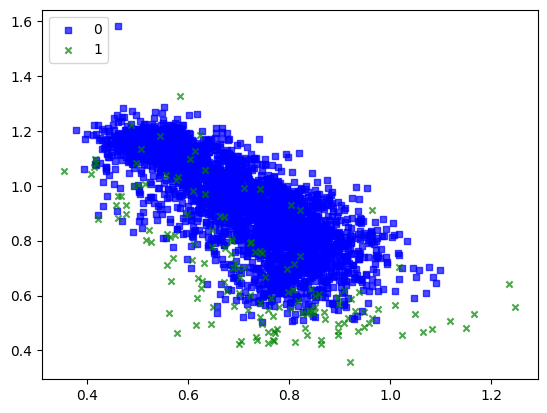

In [ ]:
from mlxtend.plotting import category_scatter

x_axis_label = 'LMacro_03|D4_ratio'
y_axis_label =  'LMacro_03|D2_ratio'

reduced_features_reset = reduced_features.reset_index()

fig = category_scatter(x=x_axis_label, y=y_axis_label, label_col='class',
                       data=reduced_features_reset, legend_loc='upper left')

feature_list = list(reduced_features.columns)

two_features_data = reduced_features.iloc[:,[feature_list.index(x_axis_label),feature_list.index(y_axis_label)]]


Tree


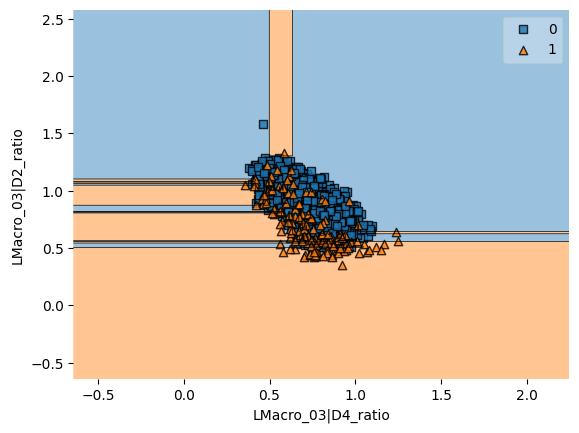

Forest


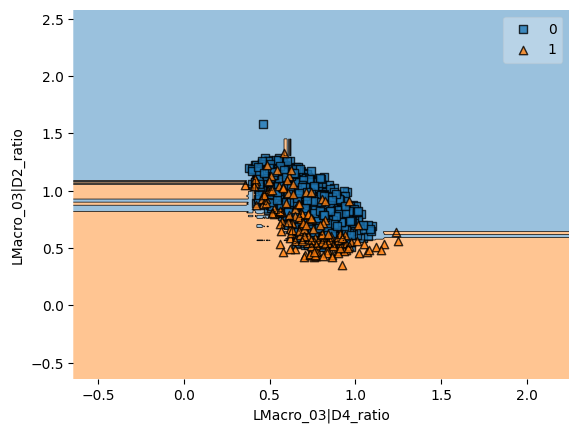

In [ ]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

tree = DecisionTreeClassifier(criterion='gini',
                              class_weight = 'balanced',
                              random_state=RANDOM_STATE)

tree_dict = {'Tree':tree, 'Forest':forest}

for classifier_name in tree_dict:

  tree_dict[classifier_name].fit(two_features_data.values, reduced_features_reset['class'].values)

  plot_decision_regions(two_features_data.values,
                        reduced_features_reset['class'].values,
                        clf = tree_dict[classifier_name])

  plt.xlabel(x_axis_label)
  plt.ylabel(y_axis_label)

  print(color.BOLD+color.UNDERLINE+classifier_name+color.END)
  plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

# create a forest classifier
ETSC = ExtraTreesClassifier(criterion='gini',
                            n_estimators=1000,
                            max_features = 'sqrt',
                            class_weight = 'balanced',
                            random_state=RANDOM_STATE,
                            n_jobs=-1)

ETSC.fit(X_train, y_train)

y_pred = ETSC.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred, output_dict = True)))

0          1  accuracy   macro avg  weighted avg
precision    0.996296   0.923077  0.992933    0.959687      0.992933
recall       0.996296   0.923077  0.992933    0.959687      0.992933
f1-score     0.996296   0.923077  0.992933    0.959687      0.992933
support    270.000000  13.000000  0.992933  283.000000    283.000000

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

bal_forest = BalancedRandomForestClassifier(criterion='gini',
                                            n_estimators=1000,
                                            max_features = 'sqrt',
                                            random_state=RANDOM_STATE,
                                            n_jobs=-1
                                            )
bal_forest.fit(X_train, y_train)

y_pred = bal_forest.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict = True)))

/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:577: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:589: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(
/usr/local/lib/python3.10/dist-packages/imblearn/ensemble/_forest.py:601: FutureWarning: The default of `bootstrap` will change from `True` to `False` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `False` to silence this warning and adopt the future behaviour.
  warn(


0          1  accuracy   macro avg  weighted avg
precision    1.000000   0.520000  0.957597    0.760000      0.977951
recall       0.955556   1.000000  0.957597    0.977778      0.957597
f1-score     0.977273   0.684211  0.957597    0.830742      0.963811
support    270.000000  13.000000  0.957597  283.000000    283.000000

# Majority Voting

In [ ]:
%%time
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NeighbourhoodCleaningRule
from sklearn.decomposition import PCA
import timeit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, make_scorer

clf1 = Pipeline([('scl', StandardScaler()),
                 ('clf', SVC(kernel='rbf',
                             gamma='auto',
                             random_state=RANDOM_STATE,
                             probability = True))])

clf2 = Pipeline([('scl', StandardScaler()),
                 ('clf', LogisticRegression(solver='liblinear',
                                            random_state=RANDOM_STATE))
])

clf3 = DecisionTreeClassifier(random_state=RANDOM_STATE)

clf_labels = ['SVM', # Support Vector Machine
              'LR', # LogisticRegression
              'DT'] # Decision Tree

# Majority Rule Voting
hard_mv_clf = VotingClassifier(estimators=[(clf_labels[0],clf1),
                                           (clf_labels[1],clf2),
                                           (clf_labels[2],clf3)],
                               voting='hard')

soft_mv_clf = VotingClassifier(estimators=[(clf_labels[0],clf1),
                                           (clf_labels[1],clf2),
                                           (clf_labels[2],clf3)],
                               voting='soft')

clf_labels += ['Hard Majority Voting', 'Soft Majority Voting']
all_clf = [clf1, clf2, clf3, hard_mv_clf, soft_mv_clf]

print(color.BOLD+color.UNDERLINE+'Validation Scores\n'+color.END)
for clf, label in zip(all_clf, clf_labels):
    start = timeit.default_timer() # TIME STUFF

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_val)
    scores = f1_score(y_val, y_pred)
    print(color.BOLD+label+color.END)
    print("Score: %0.3f"
          % scores)
    # TIME STUFF
    stop = timeit.default_timer()
    print("Run time:", np.round((stop-start)/60,2),"minutes")
    print()

Validation Scores

SVM
Score: 0.889
Run time: 0.07 minutes

LR
Score: 0.897
Run time: 0.03 minutes

DT
Score: 0.727
Run time: 0.08 minutes

Hard Majority Voting
Score: 0.857
Run time: 0.18 minutes

Soft Majority Voting
Score: 0.897
Run time: 0.14 minutes

CPU times: user 26.7 s, sys: 326 ms, total: 27 s
Wall time: 30.4 s


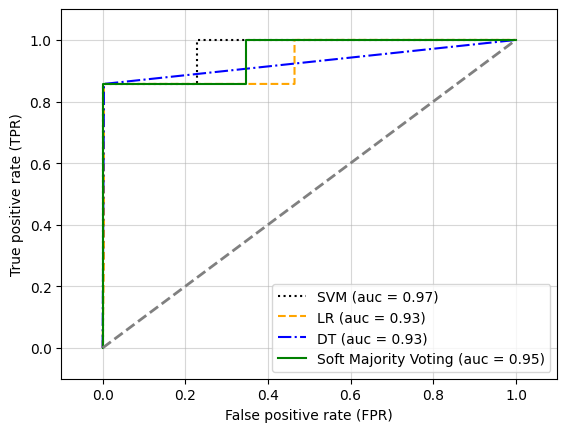

CPU times: user 18.6 s, sys: 285 ms, total: 18.9 s
Wall time: 25.6 s


In [ ]:
%%time
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# remove the hard voting because doesnt have predict proba
del clf_labels[3], all_clf[3]

colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls \
        in zip(all_clf,
               clf_labels, colors, linestyles):

    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train,
                          y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr,
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

#plt.savefig(os.path.join(IMAGE_DIR, 'Pipeline_Rocs.png'), dpi=300)
plt.show()

## **Boosting Methods**

# AdaBoost

In [ ]:
%%time
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='gini',
                              max_depth=1,
                              random_state=RANDOM_STATE)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=100,
                         learning_rate=0.1,
                         random_state=RANDOM_STATE)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict = True)))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0          1  accuracy   macro avg  weighted avg
precision    1.000000   0.928571  0.996466    0.964286      0.996719
recall       0.996296   1.000000  0.996466    0.998148      0.996466
f1-score     0.998145   0.962963  0.996466    0.980554      0.996529
support    270.000000  13.000000  0.996466  283.000000    283.000000

CPU times: user 49.1 s, sys: 79.8 ms, total: 49.2 s
Wall time: 52.9 s


Gradient Boosting

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree_reg1 = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE)
tree_reg1.fit(X_train, y_train)

y_train2 = y_train - tree_reg1.predict(X_train)
tree_reg2 = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE)
tree_reg2.fit(X_train, y_train2)

y_train3 = y_train2 - tree_reg2.predict(X_train)
tree_reg3 = DecisionTreeClassifier(max_depth=2, random_state=RANDOM_STATE)
tree_reg3.fit(X_train, y_train3)

y_pred = sum(tree.predict(X_val) for tree in (tree_reg1, tree_reg2, tree_reg3))

pd.DataFrame(classification_report(y_val, y_pred , output_dict =True))

0          1  accuracy   macro avg  weighted avg
precision    0.996269   0.800000  0.985866    0.898134      0.987253
recall       0.988889   0.923077  0.985866    0.955983      0.985866
f1-score     0.992565   0.857143  0.985866    0.924854      0.986344
support    270.000000  13.000000  0.985866  283.000000    283.000000

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GBC = GradientBoostingClassifier(max_depth = 2, n_estimators=3,
                                 learning_rate=1.0, random_state=RANDOM_STATE)
GBC.fit(X_train, y_train)
y_pred = GBC.predict(X_val)
pd.DataFrame(classification_report(y_val, y_pred , output_dict = True))

0          1  accuracy   macro avg  weighted avg
precision    0.996269   0.800000  0.985866    0.898134      0.987253
recall       0.988889   0.923077  0.985866    0.955983      0.985866
f1-score     0.992565   0.857143  0.985866    0.924854      0.986344
support    270.000000  13.000000  0.985866  283.000000    283.000000

In [ ]:
from sklearn.metrics import accuracy_score

GBC = GradientBoostingClassifier(max_depth = 2, n_estimators =30)
GBC.fit(X_train, y_train)

scores = [accuracy_score(y_val, y_pred)
          for y_pred in GBC.staged_predict(X_val)]
bst_n_estimators = np.argmax(scores)

GBC_best = GradientBoostingClassifier(max_depth = 2,
                                      n_estimators = bst_n_estimators,
                                      random_state = RANDOM_STATE)
GBC_best.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=9, random_state=0)

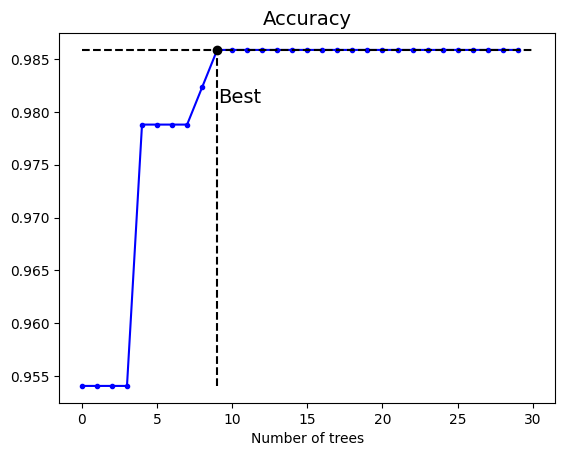

In [ ]:
worst_score = np.min(scores)
best_score = np.max(scores)

plt.plot(scores, "b.-")
plt.plot([0, 30], [best_score, best_score], "k--")
plt.plot(bst_n_estimators, best_score, "ko")
plt.plot([bst_n_estimators, bst_n_estimators], [worst_score, best_score], "k--")
plt.text(bst_n_estimators+1.5, best_score-0.005, "Best", ha="center", fontsize=14)
plt.xlabel("Number of trees")
plt.title("Accuracy", fontsize=14)

plt.show()

In [ ]:
gbrt = GradientBoostingClassifier(max_depth=2, warm_start=True, subsample = 0.5, random_state=RANDOM_STATE)

max_val_score = float(0)
score_not_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_score = accuracy_score(y_val, y_pred)
    if val_score > max_val_score:
        max_val_score = val_score
        score_not_going_up = 0
    else:
        score_not_going_up += 1
        if score_not_going_up == 5:
            break  # early stopping

print("Number of estimators:", gbrt.n_estimators)
print("Maximum Accuracy:", max_val_score)

Number of estimators: 10
Maximum Accuracy: 0.9858657243816255


XgBoost

In [ ]:
from xgboost import XGBClassifier

%timeit XGBClassifier(n_estimators =10, random_state=RANDOM_STATE).fit(X_train, y_train)

2.67 s ± 452 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit AdaBoostClassifier(n_estimators =10, random_state=RANDOM_STATE).fit(X_train, y_train)

5.87 s ± 1.2 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit GradientBoostingClassifier(n_estimators =10, random_state=RANDOM_STATE).fit(X_train, y_train)

11.4 s ± 535 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
XGmodel = XGBClassifier(max_depth = 3,
                        learning_rate = 0.1,
                        n_estimators=500,
                        booster = 'gbtree',
                        n_jobs =-1,
                        random_state=RANDOM_STATE)

XGmodel.fit(X_train, y_train)

y_pred = XGmodel.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict = True)))

0          1  accuracy   macro avg  weighted avg
precision    1.000000   0.928571  0.996466    0.964286      0.996719
recall       0.996296   1.000000  0.996466    0.998148      0.996466
f1-score     0.998145   0.962963  0.996466    0.980554      0.996529
support    270.000000  13.000000  0.996466  283.000000    283.000000

LightGBM

In [ ]:
from lightgbm import LGBMClassifier

%timeit LGBMClassifier(n_estimators =10, random_state=RANDOM_STATE).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 131, number of negative: 2412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 216240
[LightGBM] [Info] Number of data points in the train set: 2543, number of used features: 848
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.051514 -> initscore=-2.913014
[LightGBM] [Info] Start training from score -2.913014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 131, number of nega

In [ ]:
LGBM_model = LGBMClassifier(boosting_type='gbdt',
                            max_depth=3,
                            n_estimators=500,
                            random_state=RANDOM_STATE,
                            neg_bagging_fraction = 0.5, # for subsampling interictal data
                            n_jobs =-1,
                            bagging_seed = RANDOM_STATE)

LGBM_model.fit(X_train, y_train)

y_pred = LGBM_model.predict(X_val)

display(pd.DataFrame(classification_report(y_val, y_pred , output_dict = True)))

[LightGBM] [Info] Number of positive: 131, number of negative: 2412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 216240
[LightGBM] [Info] Number of data points in the train set: 2543, number of used features: 848
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.051514 -> initscore=-2.913014
[LightGBM] [Info] Start training from score -2.913014
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

0          1  accuracy   macro avg  weighted avg
precision    1.000000   0.928571  0.996466    0.964286      0.996719
recall       0.996296   1.000000  0.996466    0.998148      0.996466
f1-score     0.998145   0.962963  0.996466    0.980554      0.996529
support    270.000000  13.000000  0.996466  283.000000    283.000000

In [ ]:
import pandas as pd

# Load the Patient1 dataset
patient1_df = pd.read_csv('/content/Patient1.csv')

# Add new columns
# Assume class labels: 0 for baseline, 1 for seizure (e.g., based on some criteria or segmentation)
# Here, we'll randomly assign class labels, but replace this logic with your criteria for seizure/baseline data.
import numpy as np
np.random.seed(42)  # for reproducibility

# Creating the 'class' column
patient1_df['class'] = np.random.choice(['baseline', 'seizure'], size=len(patient1_df))

# Creating the 'location' column (Placeholder; replace with actual location if available)
patient1_df['location'] = 'unknown'

# Creating the 'file_id' column (Assigning unique IDs to each row)
patient1_df['file_id'] = ['Patient1_' + str(i) for i in range(len(patient1_df))]

# Save the updated DataFrame to a new CSV file
patient1_df.to_csv('/content/Patient1_with_new_columns.csv', index=False)

# Reorder the columns to add the new columns on the left side
columns = ['class', 'location', 'file_id'] + list(patient1_df.columns[:-3])
patient1_df = patient1_df[columns]

# Display the updated DataFrame
print("Updated Patient1 Dataset:")
display(patient1_df.head())

Updated Patient1 Dataset:


class location     file_id     LFG1    LFG10    LFG11    LFG12  LFG13  \
0  baseline  unknown  Patient1_0  1794.04  776.236  486.496  889.622 -32.98   
1   seizure  unknown  Patient1_1  1786.04  749.236  481.496  877.622 -34.98   
2  baseline  unknown  Patient1_2  1762.04  715.236  482.496  856.622 -46.98   
3  baseline  unknown  Patient1_3  1797.04  728.236  507.496  865.622 -38.98   
4  baseline  unknown  Patient1_4  1765.04  696.236  499.496  866.622 -64.98   

   LFG14    LFG15  ...    LFG62    LFG63    LFG64    LFG7     LFG8   LFG9  \
0 -488.3  137.936  ...  371.226  620.016  606.714  92.028  -96.936 -35.31   
1 -499.3  143.936  ...  328.226  597.016  616.714  71.028 -113.936 -29.31   
2 -509.3  106.936  ...  297.226  568.016  651.714  37.028 -127.936 -19.31   
3 -474.3  107.936  ...  264.226  517.016  585.714  22.028 -116.936  38.69   
4 -489.3   70.936  ...  354.226  590.016  672.714   4.028 -101.936  18.69   

      LFS1     LFS2    LFS3    LFS4  
0  406.144  293.726  737.77  23.816  
1  377.144  264.726  716.77  30.816  
2  341.144  241.726  703.77  41.816  
3  305.144  218.726  699.77  27.816  
4  309.144  215.726  730.77  27.816  

[5 rows x 71 columns]